In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random  
import numpy as np
import seaborn as sns
from scipy import stats
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')
from scipy import stats  
from sklearn.preprocessing import MinMaxScaler
  
def jude_KS(data):  
    u =data.mean()  # 计算均值  
    std=data.std() ##计算标准差  
    p=stats.kstest(data, 'norm', (u, std))  
    return p

plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
def remove_outliers_3sigma(data):
    """
    使用 3σ 准则清理数据中的异常值
    """
    data_mean = np.mean(data)
    data_std = np.std(data)
    low_bound = data_mean - 3 * data_std
    high_bound = data_mean + 3 * data_std
    cleaned = [x for x in data if (x > low_bound) and (x < high_bound)]
    return cleaned

{'whiskers': [<matplotlib.lines.Line2D at 0x191dd0701c0>,
 'caps': [<matplotlib.lines.Line2D at 0x191dd070880>,
 'boxes': [<matplotlib.lines.Line2D at 0x191dd056e20>],
 'medians': [<matplotlib.lines.Line2D at 0x191dd070f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x191dd07a280>],
 'means': []}

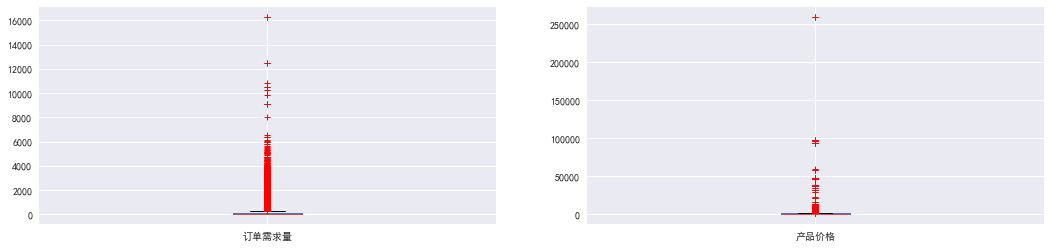

In [3]:
data = pd.read_csv('./数据预处理后的文件.csv')
final_test_df = pd.read_csv('./predict_sku1.csv')
data = data.iloc[:,1:]
fig,ax = plt.subplots(1,2,figsize=(18,4))
data['订单需求量'].plot.box(sym='r+',return_type='dict',ax=ax[0])
data['产品价格'].plot.box(sym='r+',return_type='dict',ax=ax[1])
# data['销售渠道名称']=data['销售渠道名称'].apply(lambda x:
#                                    2 if x==1
#                                    else 1)


In [4]:
# df=data.copy(deep=True)

# cols = ['产品价格', '订单需求量']
# mean = df[cols].mean(axis=0)
# std = df[cols].std(axis=0)
# low_bound = mean - 3 * std
# high_bound = mean + 3 * std

# idx = (df[cols[0]] >= low_bound[0]) & (df[cols[0]] <= high_bound[0]) & (df[cols[1]] >= low_bound[1]) & (df[cols[1]] <= high_bound[1])
# df = df[idx]

# data=df.copy(deep=True)

In [5]:
data

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,季节,月时间段,促销期,是否为节假日,year,month,day,订单需求量
0,2015-09-01,104,22069,307,403,0,1114.0,3,1,0,0,2015,9,1,19
1,2015-09-01,104,20028,301,405,0,1012.0,3,1,0,0,2015,9,1,12
2,2015-09-02,104,21183,307,403,1,428.0,3,1,0,0,2015,9,2,109
3,2015-09-02,104,20448,308,404,1,962.0,3,1,0,0,2015,9,2,3
4,2015-09-02,104,21565,307,403,0,1400.0,3,1,0,0,2015,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,0,843.0,4,2,0,0,2018,12,20,59
597690,2018-12-20,102,21875,302,408,0,762.0,4,2,0,0,2018,12,20,502
597691,2018-12-20,102,20215,302,408,0,2013.0,4,2,0,0,2018,12,20,106
597692,2018-12-20,102,20195,302,408,0,2120.0,4,2,0,0,2018,12,20,187


In [6]:
data

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,季节,月时间段,促销期,是否为节假日,year,month,day,订单需求量
0,2015-09-01,104,22069,307,403,0,1114.0,3,1,0,0,2015,9,1,19
1,2015-09-01,104,20028,301,405,0,1012.0,3,1,0,0,2015,9,1,12
2,2015-09-02,104,21183,307,403,1,428.0,3,1,0,0,2015,9,2,109
3,2015-09-02,104,20448,308,404,1,962.0,3,1,0,0,2015,9,2,3
4,2015-09-02,104,21565,307,403,0,1400.0,3,1,0,0,2015,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,0,843.0,4,2,0,0,2018,12,20,59
597690,2018-12-20,102,21875,302,408,0,762.0,4,2,0,0,2018,12,20,502
597691,2018-12-20,102,20215,302,408,0,2013.0,4,2,0,0,2018,12,20,106
597692,2018-12-20,102,20195,302,408,0,2120.0,4,2,0,0,2018,12,20,187


In [7]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# create time series period features
def time_period_features(df, time_col):
    # month level
    df['month'] = df['订单日期'].dt.month
    # quarter level
    df['quarter'] = df['订单日期'].dt.quarter
    # year level
    df['year'] = df['订单日期'].dt.year
    return df

data['订单日期'] = pd.to_datetime(data['订单日期'])
all_info_df = time_period_features(data, 'date')
print(all_info_df.info())
all_info_df
# cols = all_info_df.columns.tolist()
# cols.append(cols.pop(cols.index('产品价格')))
# all_info_df = all_info_df.reindex(columns=cols)
# all_info_df=all_info_df.rename(columns={'产品价格':'e'})
all_info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   订单日期     597694 non-null  datetime64[ns]
 1   销售区域编码   597694 non-null  int64         
 2   产品编码     597694 non-null  int64         
 3   产品大类编码   597694 non-null  int64         
 4   产品细类编码   597694 non-null  int64         
 5   销售渠道名称   597694 non-null  int64         
 6   产品价格     597694 non-null  float64       
 7   季节       597694 non-null  int64         
 8   月时间段     597694 non-null  int64         
 9   促销期      597694 non-null  int64         
 10  是否为节假日   597694 non-null  int64         
 11  year     597694 non-null  int64         
 12  month    597694 non-null  int64         
 13  day      597694 non-null  int64         
 14  订单需求量    597694 non-null  int64         
 15  quarter  597694 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(14)
memory usage

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,季节,月时间段,促销期,是否为节假日,year,month,day,订单需求量,quarter
0,2015-09-01,104,22069,307,403,0,1114.0,3,1,0,0,2015,9,1,19,3
1,2015-09-01,104,20028,301,405,0,1012.0,3,1,0,0,2015,9,1,12,3
2,2015-09-02,104,21183,307,403,1,428.0,3,1,0,0,2015,9,2,109,3
3,2015-09-02,104,20448,308,404,1,962.0,3,1,0,0,2015,9,2,3,3
4,2015-09-02,104,21565,307,403,0,1400.0,3,1,0,0,2015,9,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,0,843.0,4,2,0,0,2018,12,20,59,4
597690,2018-12-20,102,21875,302,408,0,762.0,4,2,0,0,2018,12,20,502,4
597691,2018-12-20,102,20215,302,408,0,2013.0,4,2,0,0,2018,12,20,106,4
597692,2018-12-20,102,20195,302,408,0,2120.0,4,2,0,0,2018,12,20,187,4


In [9]:
sales_per_month = pd.pivot_table(
    data=all_info_df, values=[
       u'订单需求量', u'产品价格',u'销售渠道名称'], index=[
            '销售区域编码', '产品编码', '产品大类编码','产品细类编码'], columns=[
                'year', 'month','day'], aggfunc={
                    '订单需求量': 'sum', '产品价格': 'mean'})
# sales_per_month.fillna(value=0,inplace=True)
# print(sales_per_month.info())
col_order=[('订单需求量', 2015, 9, 1),
('订单需求量', 2015, 9, 2),
('订单需求量', 2015, 9, 3),
('订单需求量', 2015, 9, 4),
('订单需求量', 2015, 9, 5),
('订单需求量', 2015, 9, 6),
('订单需求量', 2015, 9, 7),
('订单需求量', 2015, 9, 8),
('订单需求量', 2015, 9, 9),
('订单需求量', 2015, 9, 10),
('订单需求量', 2015, 9, 11),
('订单需求量', 2015, 9, 12),
('订单需求量', 2015, 9, 13),
('订单需求量', 2015, 9, 14),
('订单需求量', 2015, 9, 15),
('订单需求量', 2015, 9, 16),
('订单需求量', 2015, 9, 17),
('订单需求量', 2015, 9, 18),
('订单需求量', 2015, 9, 19),
('订单需求量', 2015, 9, 20),
('订单需求量', 2015, 9, 21),
('订单需求量', 2015, 9, 22),
('订单需求量', 2015, 9, 23),
('订单需求量', 2015, 9, 24),
('订单需求量', 2015, 9, 25),
('订单需求量', 2015, 9, 26),
('订单需求量', 2015, 9, 27),
('订单需求量', 2015, 9, 28),
('订单需求量', 2015, 9, 29),
('订单需求量', 2015, 9, 30),
('订单需求量', 2015, 10, 4),
('订单需求量', 2015, 10, 5),
('订单需求量', 2015, 10, 6),
('订单需求量', 2015, 10, 7),
('订单需求量', 2015, 10, 8),
('订单需求量', 2015, 10, 9),
('订单需求量', 2015, 10, 10),
('订单需求量', 2015, 10, 11),
('订单需求量', 2015, 10, 12),
('订单需求量', 2015, 10, 13),
('订单需求量', 2015, 10, 14),
('订单需求量', 2015, 10, 15),
('订单需求量', 2015, 10, 16),
('订单需求量', 2015, 10, 17),
('订单需求量', 2015, 10, 18),
('订单需求量', 2015, 10, 19),
('订单需求量', 2015, 10, 20),
('订单需求量', 2015, 10, 21),
('订单需求量', 2015, 10, 22),
('订单需求量', 2015, 10, 23),
('订单需求量', 2015, 10, 24),
('订单需求量', 2015, 10, 25),
('订单需求量', 2015, 10, 26),
('订单需求量', 2015, 10, 27),
('订单需求量', 2015, 10, 28),
('订单需求量', 2015, 10, 29),
('订单需求量', 2015, 10, 30),
('订单需求量', 2015, 10, 31),
('订单需求量', 2015, 11, 1),
('订单需求量', 2015, 11, 2),
('订单需求量', 2015, 11, 3),
('订单需求量', 2015, 11, 4),
('订单需求量', 2015, 11, 5),
('订单需求量', 2015, 11, 6),
('订单需求量', 2015, 11, 7),
('订单需求量', 2015, 11, 8),
('订单需求量', 2015, 11, 9),
('订单需求量', 2015, 11, 10),
('订单需求量', 2015, 11, 11),
('订单需求量', 2015, 11, 12),
('订单需求量', 2015, 11, 13),
('订单需求量', 2015, 11, 14),
('订单需求量', 2015, 11, 15),
('订单需求量', 2015, 11, 16),
('订单需求量', 2015, 11, 17),
('订单需求量', 2015, 11, 18),
('订单需求量', 2015, 11, 19),
('订单需求量', 2015, 11, 20),
('订单需求量', 2015, 11, 21),
('订单需求量', 2015, 11, 22),
('订单需求量', 2015, 11, 23),
('订单需求量', 2015, 11, 24),
('订单需求量', 2015, 11, 25),
('订单需求量', 2015, 11, 26),
('订单需求量', 2015, 11, 27),
('订单需求量', 2015, 11, 28),
('订单需求量', 2015, 11, 29),
('订单需求量', 2015, 11, 30),
('订单需求量', 2015, 12, 1),
('订单需求量', 2015, 12, 2),
('订单需求量', 2015, 12, 3),
('订单需求量', 2015, 12, 4),
('订单需求量', 2015, 12, 5),
('订单需求量', 2015, 12, 6),
('订单需求量', 2015, 12, 7),
('订单需求量', 2015, 12, 8),
('订单需求量', 2015, 12, 9),
('订单需求量', 2015, 12, 10),
('订单需求量', 2015, 12, 11),
('订单需求量', 2015, 12, 12),
('订单需求量', 2015, 12, 13),
('订单需求量', 2015, 12, 14),
('订单需求量', 2015, 12, 15),
('订单需求量', 2015, 12, 16),
('订单需求量', 2015, 12, 17),
('订单需求量', 2015, 12, 18),
('订单需求量', 2015, 12, 19),
('订单需求量', 2015, 12, 20),
('订单需求量', 2015, 12, 21),
('订单需求量', 2015, 12, 22),
('订单需求量', 2015, 12, 23),
('订单需求量', 2015, 12, 24),
('订单需求量', 2015, 12, 25),
('订单需求量', 2015, 12, 26),
('订单需求量', 2015, 12, 27),
('订单需求量', 2015, 12, 28),
('订单需求量', 2015, 12, 29),
('订单需求量', 2015, 12, 30),
('订单需求量', 2015, 12, 31),
('订单需求量', 2016, 1, 2),
('订单需求量', 2016, 1, 3),
('订单需求量', 2016, 1, 4),
('订单需求量', 2016, 1, 5),
('订单需求量', 2016, 1, 6),
('订单需求量', 2016, 1, 7),
('订单需求量', 2016, 1, 8),
('订单需求量', 2016, 1, 9),
('订单需求量', 2016, 1, 10),
('订单需求量', 2016, 1, 11),
('订单需求量', 2016, 1, 12),
('订单需求量', 2016, 1, 13),
('订单需求量', 2016, 1, 14),
('订单需求量', 2016, 1, 15),
('订单需求量', 2016, 1, 16),
('订单需求量', 2016, 1, 17),
('订单需求量', 2016, 1, 18),
('订单需求量', 2016, 1, 19),
('订单需求量', 2016, 1, 20),
('订单需求量', 2016, 1, 21),
('订单需求量', 2016, 1, 22),
('订单需求量', 2016, 1, 23),
('订单需求量', 2016, 1, 24),
('订单需求量', 2016, 1, 25),
('订单需求量', 2016, 1, 26),
('订单需求量', 2016, 1, 27),
('订单需求量', 2016, 1, 28),
('订单需求量', 2016, 1, 29),
('订单需求量', 2016, 1, 30),
('订单需求量', 2016, 1, 31),
('订单需求量', 2016, 2, 1),
('订单需求量', 2016, 2, 2),
('订单需求量', 2016, 2, 3),
('订单需求量', 2016, 2, 15),
('订单需求量', 2016, 2, 16),
('订单需求量', 2016, 2, 17),
('订单需求量', 2016, 2, 18),
('订单需求量', 2016, 2, 19),
('订单需求量', 2016, 2, 20),
('订单需求量', 2016, 2, 21),
('订单需求量', 2016, 2, 22),
('订单需求量', 2016, 2, 23),
('订单需求量', 2016, 2, 24),
('订单需求量', 2016, 2, 25),
('订单需求量', 2016, 2, 26),
('订单需求量', 2016, 2, 27),
('订单需求量', 2016, 2, 28),
('订单需求量', 2016, 2, 29),
('订单需求量', 2016, 3, 1),
('订单需求量', 2016, 3, 2),
('订单需求量', 2016, 3, 3),
('订单需求量', 2016, 3, 4),
('订单需求量', 2016, 3, 5),
('订单需求量', 2016, 3, 6),
('订单需求量', 2016, 3, 7),
('订单需求量', 2016, 3, 8),
('订单需求量', 2016, 3, 9),
('订单需求量', 2016, 3, 10),
('订单需求量', 2016, 3, 11),
('订单需求量', 2016, 3, 12),
('订单需求量', 2016, 3, 13),
('订单需求量', 2016, 3, 14),
('订单需求量', 2016, 3, 15),
('订单需求量', 2016, 3, 16),
('订单需求量', 2016, 3, 17),
('订单需求量', 2016, 3, 18),
('订单需求量', 2016, 3, 19),
('订单需求量', 2016, 3, 20),
('订单需求量', 2016, 3, 21),
('订单需求量', 2016, 3, 22),
('订单需求量', 2016, 3, 23),
('订单需求量', 2016, 3, 24),
('订单需求量', 2016, 3, 25),
('订单需求量', 2016, 3, 26),
('订单需求量', 2016, 3, 27),
('订单需求量', 2016, 3, 28),
('订单需求量', 2016, 3, 29),
('订单需求量', 2016, 3, 30),
('订单需求量', 2016, 3, 31),
('订单需求量', 2016, 4, 1),
('订单需求量', 2016, 4, 2),
('订单需求量', 2016, 4, 3),
('订单需求量', 2016, 4, 4),
('订单需求量', 2016, 4, 5),
('订单需求量', 2016, 4, 6),
('订单需求量', 2016, 4, 7),
('订单需求量', 2016, 4, 8),
('订单需求量', 2016, 4, 9),
('订单需求量', 2016, 4, 10),
('订单需求量', 2016, 4, 11),
('订单需求量', 2016, 4, 12),
('订单需求量', 2016, 4, 13),
('订单需求量', 2016, 4, 14),
('订单需求量', 2016, 4, 15),
('订单需求量', 2016, 4, 16),
('订单需求量', 2016, 4, 17),
('订单需求量', 2016, 4, 18),
('订单需求量', 2016, 4, 19),
('订单需求量', 2016, 4, 20),
('订单需求量', 2016, 4, 21),
('订单需求量', 2016, 4, 22),
('订单需求量', 2016, 4, 23),
('订单需求量', 2016, 4, 24),
('订单需求量', 2016, 4, 25),
('订单需求量', 2016, 4, 26),
('订单需求量', 2016, 4, 27),
('订单需求量', 2016, 4, 28),
('订单需求量', 2016, 4, 29),
('订单需求量', 2016, 4, 30),
('订单需求量', 2016, 5, 1),
('订单需求量', 2016, 5, 2),
('订单需求量', 2016, 5, 3),
('订单需求量', 2016, 5, 4),
('订单需求量', 2016, 5, 5),
('订单需求量', 2016, 5, 6),
('订单需求量', 2016, 5, 7),
('订单需求量', 2016, 5, 8),
('订单需求量', 2016, 5, 9),
('订单需求量', 2016, 5, 10),
('订单需求量', 2016, 5, 11),
('订单需求量', 2016, 5, 12),
('订单需求量', 2016, 5, 13),
('订单需求量', 2016, 5, 14),
('订单需求量', 2016, 5, 15),
('订单需求量', 2016, 5, 16),
('订单需求量', 2016, 5, 17),
('订单需求量', 2016, 5, 18),
('订单需求量', 2016, 5, 19),
('订单需求量', 2016, 5, 20),
('订单需求量', 2016, 5, 21),
('订单需求量', 2016, 5, 22),
('订单需求量', 2016, 5, 23),
('订单需求量', 2016, 5, 24),
('订单需求量', 2016, 5, 25),
('订单需求量', 2016, 5, 26),
('订单需求量', 2016, 5, 27),
('订单需求量', 2016, 5, 28),
('订单需求量', 2016, 5, 29),
('订单需求量', 2016, 5, 30),
('订单需求量', 2016, 5, 31),
('订单需求量', 2016, 6, 1),
('订单需求量', 2016, 6, 2),
('订单需求量', 2016, 6, 3),
('订单需求量', 2016, 6, 4),
('订单需求量', 2016, 6, 5),
('订单需求量', 2016, 6, 6),
('订单需求量', 2016, 6, 7),
('订单需求量', 2016, 6, 8),
('订单需求量', 2016, 6, 9),
('订单需求量', 2016, 6, 10),
('订单需求量', 2016, 6, 11),
('订单需求量', 2016, 6, 12),
('订单需求量', 2016, 6, 13),
('订单需求量', 2016, 6, 14),
('订单需求量', 2016, 6, 15),
('订单需求量', 2016, 6, 16),
('订单需求量', 2016, 6, 17),
('订单需求量', 2016, 6, 18),
('订单需求量', 2016, 6, 19),
('订单需求量', 2016, 6, 20),
('订单需求量', 2016, 6, 21),
('订单需求量', 2016, 6, 22),
('订单需求量', 2016, 6, 23),
('订单需求量', 2016, 6, 24),
('订单需求量', 2016, 6, 25),
('订单需求量', 2016, 6, 26),
('订单需求量', 2016, 6, 27),
('订单需求量', 2016, 6, 28),
('订单需求量', 2016, 6, 29),
('订单需求量', 2016, 6, 30),
('订单需求量', 2016, 7, 1),
('订单需求量', 2016, 7, 2),
('订单需求量', 2016, 7, 3),
('订单需求量', 2016, 7, 4),
('订单需求量', 2016, 7, 5),
('订单需求量', 2016, 7, 6),
('订单需求量', 2016, 7, 7),
('订单需求量', 2016, 7, 8),
('订单需求量', 2016, 7, 9),
('订单需求量', 2016, 7, 10),
('订单需求量', 2016, 7, 11),
('订单需求量', 2016, 7, 12),
('订单需求量', 2016, 7, 13),
('订单需求量', 2016, 7, 14),
('订单需求量', 2016, 7, 15),
('订单需求量', 2016, 7, 16),
('订单需求量', 2016, 7, 17),
('订单需求量', 2016, 7, 18),
('订单需求量', 2016, 7, 19),
('订单需求量', 2016, 7, 20),
('订单需求量', 2016, 7, 21),
('订单需求量', 2016, 7, 22),
('订单需求量', 2016, 7, 23),
('订单需求量', 2016, 7, 24),
('订单需求量', 2016, 7, 25),
('订单需求量', 2016, 7, 26),
('订单需求量', 2016, 7, 27),
('订单需求量', 2016, 7, 28),
('订单需求量', 2016, 7, 29),
('订单需求量', 2016, 7, 30),
('订单需求量', 2016, 7, 31),
('订单需求量', 2016, 8, 1),
('订单需求量', 2016, 8, 2),
('订单需求量', 2016, 8, 3),
('订单需求量', 2016, 8, 4),
('订单需求量', 2016, 8, 5),
('订单需求量', 2016, 8, 6),
('订单需求量', 2016, 8, 7),
('订单需求量', 2016, 8, 8),
('订单需求量', 2016, 8, 9),
('订单需求量', 2016, 8, 10),
('订单需求量', 2016, 8, 11),
('订单需求量', 2016, 8, 12),
('订单需求量', 2016, 8, 13),
('订单需求量', 2016, 8, 14),
('订单需求量', 2016, 8, 15),
('订单需求量', 2016, 8, 16),
('订单需求量', 2016, 8, 17),
('订单需求量', 2016, 8, 18),
('订单需求量', 2016, 8, 19),
('订单需求量', 2016, 8, 20),
('订单需求量', 2016, 8, 21),
('订单需求量', 2016, 8, 22),
('订单需求量', 2016, 8, 23),
('订单需求量', 2016, 8, 24),
('订单需求量', 2016, 8, 25),
('订单需求量', 2016, 8, 26),
('订单需求量', 2016, 8, 27),
('订单需求量', 2016, 8, 28),
('订单需求量', 2016, 8, 29),
('订单需求量', 2016, 8, 30),
('订单需求量', 2016, 8, 31),
('订单需求量', 2016, 9, 1),
('订单需求量', 2016, 9, 2),
('订单需求量', 2016, 9, 3),
('订单需求量', 2016, 9, 4),
('订单需求量', 2016, 9, 5),
('订单需求量', 2016, 9, 6),
('订单需求量', 2016, 9, 7),
('订单需求量', 2016, 9, 8),
('订单需求量', 2016, 9, 9),
('订单需求量', 2016, 9, 10),
('订单需求量', 2016, 9, 11),
('订单需求量', 2016, 9, 12),
('订单需求量', 2016, 9, 13),
('订单需求量', 2016, 9, 14),
('订单需求量', 2016, 9, 15),
('订单需求量', 2016, 9, 16),
('订单需求量', 2016, 9, 17),
('订单需求量', 2016, 9, 18),
('订单需求量', 2016, 9, 19),
('订单需求量', 2016, 9, 20),
('订单需求量', 2016, 9, 21),
('订单需求量', 2016, 9, 22),
('订单需求量', 2016, 9, 23),
('订单需求量', 2016, 9, 24),
('订单需求量', 2016, 9, 25),
('订单需求量', 2016, 9, 26),
('订单需求量', 2016, 9, 27),
('订单需求量', 2016, 9, 28),
('订单需求量', 2016, 9, 29),
('订单需求量', 2016, 9, 30),
('订单需求量', 2016, 10, 1),
('订单需求量', 2016, 10, 2),
('订单需求量', 2016, 10, 3),
('订单需求量', 2016, 10, 4),
('订单需求量', 2016, 10, 5),
('订单需求量', 2016, 10, 6),
('订单需求量', 2016, 10, 7),
('订单需求量', 2016, 10, 8),
('订单需求量', 2016, 10, 9),
('订单需求量', 2016, 10, 10),
('订单需求量', 2016, 10, 11),
('订单需求量', 2016, 10, 12),
('订单需求量', 2016, 10, 13),
('订单需求量', 2016, 10, 14),
('订单需求量', 2016, 10, 15),
('订单需求量', 2016, 10, 16),
('订单需求量', 2016, 10, 17),
('订单需求量', 2016, 10, 18),
('订单需求量', 2016, 10, 19),
('订单需求量', 2016, 10, 20),
('订单需求量', 2016, 10, 21),
('订单需求量', 2016, 10, 22),
('订单需求量', 2016, 10, 23),
('订单需求量', 2016, 10, 24),
('订单需求量', 2016, 10, 25),
('订单需求量', 2016, 10, 26),
('订单需求量', 2016, 10, 27),
('订单需求量', 2016, 10, 28),
('订单需求量', 2016, 10, 29),
('订单需求量', 2016, 10, 30),
('订单需求量', 2016, 10, 31),
('订单需求量', 2016, 11, 1),
('订单需求量', 2016, 11, 2),
('订单需求量', 2016, 11, 3),
('订单需求量', 2016, 11, 4),
('订单需求量', 2016, 11, 5),
('订单需求量', 2016, 11, 6),
('订单需求量', 2016, 11, 7),
('订单需求量', 2016, 11, 8),
('订单需求量', 2016, 11, 9),
('订单需求量', 2016, 11, 10),
('订单需求量', 2016, 11, 11),
('订单需求量', 2016, 11, 12),
('订单需求量', 2016, 11, 13),
('订单需求量', 2016, 11, 14),
('订单需求量', 2016, 11, 15),
('订单需求量', 2016, 11, 16),
('订单需求量', 2016, 11, 17),
('订单需求量', 2016, 11, 18),
('订单需求量', 2016, 11, 19),
('订单需求量', 2016, 11, 20),
('订单需求量', 2016, 11, 21),
('订单需求量', 2016, 11, 22),
('订单需求量', 2016, 11, 23),
('订单需求量', 2016, 11, 24),
('订单需求量', 2016, 11, 25),
('订单需求量', 2016, 11, 26),
('订单需求量', 2016, 11, 27),
('订单需求量', 2016, 11, 28),
('订单需求量', 2016, 11, 29),
('订单需求量', 2016, 11, 30),
('订单需求量', 2016, 12, 1),
('订单需求量', 2016, 12, 2),
('订单需求量', 2016, 12, 3),
('订单需求量', 2016, 12, 4),
('订单需求量', 2016, 12, 5),
('订单需求量', 2016, 12, 6),
('订单需求量', 2016, 12, 7),
('订单需求量', 2016, 12, 8),
('订单需求量', 2016, 12, 9),
('订单需求量', 2016, 12, 10),
('订单需求量', 2016, 12, 11),
('订单需求量', 2016, 12, 12),
('订单需求量', 2016, 12, 13),
('订单需求量', 2016, 12, 14),
('订单需求量', 2016, 12, 15),
('订单需求量', 2016, 12, 16),
('订单需求量', 2016, 12, 17),
('订单需求量', 2016, 12, 18),
('订单需求量', 2016, 12, 19),
('订单需求量', 2016, 12, 20),
('订单需求量', 2016, 12, 21),
('订单需求量', 2016, 12, 22),
('订单需求量', 2016, 12, 23),
('订单需求量', 2016, 12, 24),
('订单需求量', 2016, 12, 25),
('订单需求量', 2016, 12, 26),
('订单需求量', 2016, 12, 27),
('订单需求量', 2016, 12, 28),
('订单需求量', 2016, 12, 29),
('订单需求量', 2016, 12, 30),
('订单需求量', 2016, 12, 31),
('订单需求量', 2017, 1, 1),
('订单需求量', 2017, 1, 2),
('订单需求量', 2017, 1, 3),
('订单需求量', 2017, 1, 4),
('订单需求量', 2017, 1, 5),
('订单需求量', 2017, 1, 6),
('订单需求量', 2017, 1, 7),
('订单需求量', 2017, 1, 8),
('订单需求量', 2017, 1, 9),
('订单需求量', 2017, 1, 10),
('订单需求量', 2017, 1, 11),
('订单需求量', 2017, 1, 12),
('订单需求量', 2017, 1, 13),
('订单需求量', 2017, 1, 14),
('订单需求量', 2017, 1, 15),
('订单需求量', 2017, 1, 16),
('订单需求量', 2017, 1, 17),
('订单需求量', 2017, 1, 18),
('订单需求量', 2017, 1, 19),
('订单需求量', 2017, 1, 20),
('订单需求量', 2017, 1, 21),
('订单需求量', 2017, 1, 22),
('订单需求量', 2017, 1, 23),
('订单需求量', 2017, 2, 3),
('订单需求量', 2017, 2, 4),
('订单需求量', 2017, 2, 5),
('订单需求量', 2017, 2, 6),
('订单需求量', 2017, 2, 7),
('订单需求量', 2017, 2, 8),
('订单需求量', 2017, 2, 9),
('订单需求量', 2017, 2, 10),
('订单需求量', 2017, 2, 11),
('订单需求量', 2017, 2, 12),
('订单需求量', 2017, 2, 13),
('订单需求量', 2017, 2, 14),
('订单需求量', 2017, 2, 15),
('订单需求量', 2017, 2, 16),
('订单需求量', 2017, 2, 17),
('订单需求量', 2017, 2, 18),
('订单需求量', 2017, 2, 19),
('订单需求量', 2017, 2, 20),
('订单需求量', 2017, 2, 21),
('订单需求量', 2017, 2, 22),
('订单需求量', 2017, 2, 23),
('订单需求量', 2017, 2, 24),
('订单需求量', 2017, 2, 25),
('订单需求量', 2017, 2, 26),
('订单需求量', 2017, 2, 27),
('订单需求量', 2017, 2, 28),
('订单需求量', 2017, 3, 1),
('订单需求量', 2017, 3, 2),
('订单需求量', 2017, 3, 3),
('订单需求量', 2017, 3, 4),
('订单需求量', 2017, 3, 5),
('订单需求量', 2017, 3, 6),
('订单需求量', 2017, 3, 7),
('订单需求量', 2017, 3, 8),
('订单需求量', 2017, 3, 9),
('订单需求量', 2017, 3, 10),
('订单需求量', 2017, 3, 11),
('订单需求量', 2017, 3, 12),
('订单需求量', 2017, 3, 13),
('订单需求量', 2017, 3, 14),
('订单需求量', 2017, 3, 15),
('订单需求量', 2017, 3, 16),
('订单需求量', 2017, 3, 17),
('订单需求量', 2017, 3, 18),
('订单需求量', 2017, 3, 19),
('订单需求量', 2017, 3, 20),
('订单需求量', 2017, 3, 21),
('订单需求量', 2017, 3, 22),
('订单需求量', 2017, 3, 23),
('订单需求量', 2017, 3, 24),
('订单需求量', 2017, 3, 25),
('订单需求量', 2017, 3, 26),
('订单需求量', 2017, 3, 27),
('订单需求量', 2017, 3, 28),
('订单需求量', 2017, 3, 29),
('订单需求量', 2017, 3, 30),
('订单需求量', 2017, 3, 31),
('订单需求量', 2017, 4, 1),
('订单需求量', 2017, 4, 2),
('订单需求量', 2017, 4, 3),
('订单需求量', 2017, 4, 4),
('订单需求量', 2017, 4, 5),
('订单需求量', 2017, 4, 6),
('订单需求量', 2017, 4, 7),
('订单需求量', 2017, 4, 8),
('订单需求量', 2017, 4, 9),
('订单需求量', 2017, 4, 10),
('订单需求量', 2017, 4, 11),
('订单需求量', 2017, 4, 12),
('订单需求量', 2017, 4, 13),
('订单需求量', 2017, 4, 14),
('订单需求量', 2017, 4, 15),
('订单需求量', 2017, 4, 16),
('订单需求量', 2017, 4, 17),
('订单需求量', 2017, 4, 18),
('订单需求量', 2017, 4, 19),
('订单需求量', 2017, 4, 20),
('订单需求量', 2017, 4, 21),
('订单需求量', 2017, 4, 22),
('订单需求量', 2017, 4, 23),
('订单需求量', 2017, 4, 24),
('订单需求量', 2017, 4, 25),
('订单需求量', 2017, 4, 26),
('订单需求量', 2017, 4, 27),
('订单需求量', 2017, 4, 28),
('订单需求量', 2017, 4, 29),
('订单需求量', 2017, 4, 30),
('订单需求量', 2017, 5, 1),
('订单需求量', 2017, 5, 2),
('订单需求量', 2017, 5, 3),
('订单需求量', 2017, 5, 4),
('订单需求量', 2017, 5, 5),
('订单需求量', 2017, 5, 6),
('订单需求量', 2017, 5, 7),
('订单需求量', 2017, 5, 8),
('订单需求量', 2017, 5, 9),
('订单需求量', 2017, 5, 10),
('订单需求量', 2017, 5, 11),
('订单需求量', 2017, 5, 12),
('订单需求量', 2017, 5, 13),
('订单需求量', 2017, 5, 14),
('订单需求量', 2017, 5, 15),
('订单需求量', 2017, 5, 16),
('订单需求量', 2017, 5, 17),
('订单需求量', 2017, 5, 18),
('订单需求量', 2017, 5, 19),
('订单需求量', 2017, 5, 20),
('订单需求量', 2017, 5, 21),
('订单需求量', 2017, 5, 22),
('订单需求量', 2017, 5, 23),
('订单需求量', 2017, 5, 24),
('订单需求量', 2017, 5, 25),
('订单需求量', 2017, 5, 26),
('订单需求量', 2017, 5, 27),
('订单需求量', 2017, 5, 28),
('订单需求量', 2017, 5, 29),
('订单需求量', 2017, 5, 30),
('订单需求量', 2017, 5, 31),
('订单需求量', 2017, 6, 1),
('订单需求量', 2017, 6, 2),
('订单需求量', 2017, 6, 3),
('订单需求量', 2017, 6, 4),
('订单需求量', 2017, 6, 5),
('订单需求量', 2017, 6, 6),
('订单需求量', 2017, 6, 7),
('订单需求量', 2017, 6, 8),
('订单需求量', 2017, 6, 9),
('订单需求量', 2017, 6, 10),
('订单需求量', 2017, 6, 11),
('订单需求量', 2017, 6, 12),
('订单需求量', 2017, 6, 13),
('订单需求量', 2017, 6, 14),
('订单需求量', 2017, 6, 15),
('订单需求量', 2017, 6, 16),
('订单需求量', 2017, 6, 17),
('订单需求量', 2017, 6, 18),
('订单需求量', 2017, 6, 19),
('订单需求量', 2017, 6, 20),
('订单需求量', 2017, 6, 21),
('订单需求量', 2017, 6, 22),
('订单需求量', 2017, 6, 23),
('订单需求量', 2017, 6, 24),
('订单需求量', 2017, 6, 25),
('订单需求量', 2017, 6, 26),
('订单需求量', 2017, 6, 27),
('订单需求量', 2017, 6, 28),
('订单需求量', 2017, 6, 29),
('订单需求量', 2017, 6, 30),
('订单需求量', 2017, 7, 1),
('订单需求量', 2017, 7, 2),
('订单需求量', 2017, 7, 3),
('订单需求量', 2017, 7, 4),
('订单需求量', 2017, 7, 5),
('订单需求量', 2017, 7, 6),
('订单需求量', 2017, 7, 7),
('订单需求量', 2017, 7, 8),
('订单需求量', 2017, 7, 9),
('订单需求量', 2017, 7, 10),
('订单需求量', 2017, 7, 11),
('订单需求量', 2017, 7, 12),
('订单需求量', 2017, 7, 13),
('订单需求量', 2017, 7, 14),
('订单需求量', 2017, 7, 15),
('订单需求量', 2017, 7, 16),
('订单需求量', 2017, 7, 17),
('订单需求量', 2017, 7, 18),
('订单需求量', 2017, 7, 19),
('订单需求量', 2017, 7, 20),
('订单需求量', 2017, 7, 21),
('订单需求量', 2017, 7, 22),
('订单需求量', 2017, 7, 23),
('订单需求量', 2017, 7, 24),
('订单需求量', 2017, 7, 25),
('订单需求量', 2017, 7, 26),
('订单需求量', 2017, 7, 27),
('订单需求量', 2017, 7, 28),
('订单需求量', 2017, 7, 29),
('订单需求量', 2017, 7, 30),
('订单需求量', 2017, 7, 31),
('订单需求量', 2017, 8, 1),
('订单需求量', 2017, 8, 2),
('订单需求量', 2017, 8, 3),
('订单需求量', 2017, 8, 4),
('订单需求量', 2017, 8, 5),
('订单需求量', 2017, 8, 6),
('订单需求量', 2017, 8, 7),
('订单需求量', 2017, 8, 8),
('订单需求量', 2017, 8, 9),
('订单需求量', 2017, 8, 10),
('订单需求量', 2017, 8, 11),
('订单需求量', 2017, 8, 12),
('订单需求量', 2017, 8, 13),
('订单需求量', 2017, 8, 14),
('订单需求量', 2017, 8, 15),
('订单需求量', 2017, 8, 16),
('订单需求量', 2017, 8, 17),
('订单需求量', 2017, 8, 18),
('订单需求量', 2017, 8, 19),
('订单需求量', 2017, 8, 20),
('订单需求量', 2017, 8, 21),
('订单需求量', 2017, 8, 22),
('订单需求量', 2017, 8, 23),
('订单需求量', 2017, 8, 24),
('订单需求量', 2017, 8, 25),
('订单需求量', 2017, 8, 26),
('订单需求量', 2017, 8, 27),
('订单需求量', 2017, 8, 28),
('订单需求量', 2017, 8, 29),
('订单需求量', 2017, 8, 30),
('订单需求量', 2017, 8, 31),
('订单需求量', 2017, 9, 1),
('订单需求量', 2017, 9, 2),
('订单需求量', 2017, 9, 3),
('订单需求量', 2017, 9, 4),
('订单需求量', 2017, 9, 5),
('订单需求量', 2017, 9, 6),
('订单需求量', 2017, 9, 7),
('订单需求量', 2017, 9, 8),
('订单需求量', 2017, 9, 9),
('订单需求量', 2017, 9, 10),
('订单需求量', 2017, 9, 11),
('订单需求量', 2017, 9, 12),
('订单需求量', 2017, 9, 13),
('订单需求量', 2017, 9, 14),
('订单需求量', 2017, 9, 15),
('订单需求量', 2017, 9, 16),
('订单需求量', 2017, 9, 17),
('订单需求量', 2017, 9, 18),
('订单需求量', 2017, 9, 19),
('订单需求量', 2017, 9, 20),
('订单需求量', 2017, 9, 21),
('订单需求量', 2017, 9, 22),
('订单需求量', 2017, 9, 23),
('订单需求量', 2017, 9, 24),
('订单需求量', 2017, 9, 25),
('订单需求量', 2017, 9, 26),
('订单需求量', 2017, 9, 27),
('订单需求量', 2017, 9, 28),
('订单需求量', 2017, 9, 29),
('订单需求量', 2017, 9, 30),
('订单需求量', 2017, 10, 1),
('订单需求量', 2017, 10, 2),
('订单需求量', 2017, 10, 3),
('订单需求量', 2017, 10, 4),
('订单需求量', 2017, 10, 5),
('订单需求量', 2017, 10, 6),
('订单需求量', 2017, 10, 7),
('订单需求量', 2017, 10, 8),
('订单需求量', 2017, 10, 9),
('订单需求量', 2017, 10, 10),
('订单需求量', 2017, 10, 11),
('订单需求量', 2017, 10, 12),
('订单需求量', 2017, 10, 13),
('订单需求量', 2017, 10, 14),
('订单需求量', 2017, 10, 15),
('订单需求量', 2017, 10, 16),
('订单需求量', 2017, 10, 17),
('订单需求量', 2017, 10, 18),
('订单需求量', 2017, 10, 19),
('订单需求量', 2017, 10, 20),
('订单需求量', 2017, 10, 21),
('订单需求量', 2017, 10, 22),
('订单需求量', 2017, 10, 23),
('订单需求量', 2017, 10, 24),
('订单需求量', 2017, 10, 25),
('订单需求量', 2017, 10, 26),
('订单需求量', 2017, 10, 27),
('订单需求量', 2017, 10, 28),
('订单需求量', 2017, 10, 29),
('订单需求量', 2017, 10, 30),
('订单需求量', 2017, 10, 31),
('订单需求量', 2017, 11, 1),
('订单需求量', 2017, 11, 2),
('订单需求量', 2017, 11, 3),
('订单需求量', 2017, 11, 4),
('订单需求量', 2017, 11, 5),
('订单需求量', 2017, 11, 6),
('订单需求量', 2017, 11, 7),
('订单需求量', 2017, 11, 8),
('订单需求量', 2017, 11, 9),
('订单需求量', 2017, 11, 10),
('订单需求量', 2017, 11, 11),
('订单需求量', 2017, 11, 12),
('订单需求量', 2017, 11, 13),
('订单需求量', 2017, 11, 14),
('订单需求量', 2017, 11, 15),
('订单需求量', 2017, 11, 16),
('订单需求量', 2017, 11, 17),
('订单需求量', 2017, 11, 18),
('订单需求量', 2017, 11, 19),
('订单需求量', 2017, 11, 20),
('订单需求量', 2017, 11, 21),
('订单需求量', 2017, 11, 22),
('订单需求量', 2017, 11, 23),
('订单需求量', 2017, 11, 24),
('订单需求量', 2017, 11, 25),
('订单需求量', 2017, 11, 26),
('订单需求量', 2017, 11, 27),
('订单需求量', 2017, 11, 28),
('订单需求量', 2017, 11, 29),
('订单需求量', 2017, 11, 30),
('订单需求量', 2017, 12, 1),
('订单需求量', 2017, 12, 2),
('订单需求量', 2017, 12, 3),
('订单需求量', 2017, 12, 4),
('订单需求量', 2017, 12, 5),
('订单需求量', 2017, 12, 6),
('订单需求量', 2017, 12, 7),
('订单需求量', 2017, 12, 8),
('订单需求量', 2017, 12, 9),
('订单需求量', 2017, 12, 10),
('订单需求量', 2017, 12, 11),
('订单需求量', 2017, 12, 12),
('订单需求量', 2017, 12, 13),
('订单需求量', 2017, 12, 14),
('订单需求量', 2017, 12, 15),
('订单需求量', 2017, 12, 16),
('订单需求量', 2017, 12, 17),
('订单需求量', 2017, 12, 18),
('订单需求量', 2017, 12, 19),
('订单需求量', 2017, 12, 20),
('订单需求量', 2017, 12, 21),
('订单需求量', 2017, 12, 22),
('订单需求量', 2017, 12, 23),
('订单需求量', 2017, 12, 24),
('订单需求量', 2017, 12, 25),
('订单需求量', 2017, 12, 26),
('订单需求量', 2017, 12, 27),
('订单需求量', 2017, 12, 28),
('订单需求量', 2017, 12, 29),
('订单需求量', 2017, 12, 30),
('订单需求量', 2017, 12, 31),
('订单需求量', 2018, 1, 1),
('订单需求量', 2018, 1, 2),
('订单需求量', 2018, 1, 3),
('订单需求量', 2018, 1, 4),
('订单需求量', 2018, 1, 5),
('订单需求量', 2018, 1, 6),
('订单需求量', 2018, 1, 7),
('订单需求量', 2018, 1, 8),
('订单需求量', 2018, 1, 9),
('订单需求量', 2018, 1, 10),
('订单需求量', 2018, 1, 11),
('订单需求量', 2018, 1, 12),
('订单需求量', 2018, 1, 13),
('订单需求量', 2018, 1, 14),
('订单需求量', 2018, 1, 15),
('订单需求量', 2018, 1, 16),
('订单需求量', 2018, 1, 17),
('订单需求量', 2018, 1, 18),
('订单需求量', 2018, 1, 19),
('订单需求量', 2018, 1, 20),
('订单需求量', 2018, 1, 21),
('订单需求量', 2018, 1, 22),
('订单需求量', 2018, 1, 23),
('订单需求量', 2018, 1, 24),
('订单需求量', 2018, 1, 25),
('订单需求量', 2018, 1, 26),
('订单需求量', 2018, 1, 27),
('订单需求量', 2018, 1, 28),
('订单需求量', 2018, 1, 29),
('订单需求量', 2018, 1, 30),
('订单需求量', 2018, 1, 31),
('订单需求量', 2018, 2, 1),
('订单需求量', 2018, 2, 2),
('订单需求量', 2018, 2, 3),
('订单需求量', 2018, 2, 4),
('订单需求量', 2018, 2, 5),
('订单需求量', 2018, 2, 6),
('订单需求量', 2018, 2, 7),
('订单需求量', 2018, 2, 8),
('订单需求量', 2018, 2, 9),
('订单需求量', 2018, 2, 10),
('订单需求量', 2018, 2, 11),
('订单需求量', 2018, 2, 22),
('订单需求量', 2018, 2, 23),
('订单需求量', 2018, 2, 24),
('订单需求量', 2018, 2, 25),
('订单需求量', 2018, 2, 26),
('订单需求量', 2018, 2, 27),
('订单需求量', 2018, 2, 28),
('订单需求量', 2018, 3, 1),
('订单需求量', 2018, 3, 2),
('订单需求量', 2018, 3, 3),
('订单需求量', 2018, 3, 4),
('订单需求量', 2018, 3, 5),
('订单需求量', 2018, 3, 6),
('订单需求量', 2018, 3, 7),
('订单需求量', 2018, 3, 8),
('订单需求量', 2018, 3, 9),
('订单需求量', 2018, 3, 10),
('订单需求量', 2018, 3, 11),
('订单需求量', 2018, 3, 12),
('订单需求量', 2018, 3, 13),
('订单需求量', 2018, 3, 14),
('订单需求量', 2018, 3, 15),
('订单需求量', 2018, 3, 16),
('订单需求量', 2018, 3, 17),
('订单需求量', 2018, 3, 18),
('订单需求量', 2018, 3, 19),
('订单需求量', 2018, 3, 20),
('订单需求量', 2018, 3, 21),
('订单需求量', 2018, 3, 22),
('订单需求量', 2018, 3, 23),
('订单需求量', 2018, 3, 24),
('订单需求量', 2018, 3, 25),
('订单需求量', 2018, 3, 26),
('订单需求量', 2018, 3, 27),
('订单需求量', 2018, 3, 28),
('订单需求量', 2018, 3, 29),
('订单需求量', 2018, 3, 30),
('订单需求量', 2018, 3, 31),
('订单需求量', 2018, 4, 1),
('订单需求量', 2018, 4, 2),
('订单需求量', 2018, 4, 3),
('订单需求量', 2018, 4, 4),
('订单需求量', 2018, 4, 5),
('订单需求量', 2018, 4, 6),
('订单需求量', 2018, 4, 7),
('订单需求量', 2018, 4, 8),
('订单需求量', 2018, 4, 9),
('订单需求量', 2018, 4, 10),
('订单需求量', 2018, 4, 11),
('订单需求量', 2018, 4, 12),
('订单需求量', 2018, 4, 13),
('订单需求量', 2018, 4, 14),
('订单需求量', 2018, 4, 15),
('订单需求量', 2018, 4, 16),
('订单需求量', 2018, 4, 17),
('订单需求量', 2018, 4, 18),
('订单需求量', 2018, 4, 19),
('订单需求量', 2018, 4, 20),
('订单需求量', 2018, 4, 21),
('订单需求量', 2018, 4, 22),
('订单需求量', 2018, 4, 23),
('订单需求量', 2018, 4, 24),
('订单需求量', 2018, 4, 25),
('订单需求量', 2018, 4, 26),
('订单需求量', 2018, 4, 27),
('订单需求量', 2018, 4, 28),
('订单需求量', 2018, 4, 29),
('订单需求量', 2018, 4, 30),
('订单需求量', 2018, 5, 1),
('订单需求量', 2018, 5, 2),
('订单需求量', 2018, 5, 3),
('订单需求量', 2018, 5, 4),
('订单需求量', 2018, 5, 5),
('订单需求量', 2018, 5, 6),
('订单需求量', 2018, 5, 7),
('订单需求量', 2018, 5, 8),
('订单需求量', 2018, 5, 9),
('订单需求量', 2018, 5, 10),
('订单需求量', 2018, 5, 11),
('订单需求量', 2018, 5, 12),
('订单需求量', 2018, 5, 13),
('订单需求量', 2018, 5, 14),
('订单需求量', 2018, 5, 15),
('订单需求量', 2018, 5, 16),
('订单需求量', 2018, 5, 17),
('订单需求量', 2018, 5, 18),
('订单需求量', 2018, 5, 19),
('订单需求量', 2018, 5, 20),
('订单需求量', 2018, 5, 21),
('订单需求量', 2018, 5, 22),
('订单需求量', 2018, 5, 23),
('订单需求量', 2018, 5, 24),
('订单需求量', 2018, 5, 25),
('订单需求量', 2018, 5, 26),
('订单需求量', 2018, 5, 27),
('订单需求量', 2018, 5, 28),
('订单需求量', 2018, 5, 29),
('订单需求量', 2018, 5, 30),
('订单需求量', 2018, 5, 31),
('订单需求量', 2018, 6, 1),
('订单需求量', 2018, 6, 2),
('订单需求量', 2018, 6, 3),
('订单需求量', 2018, 6, 4),
('订单需求量', 2018, 6, 5),
('订单需求量', 2018, 6, 6),
('订单需求量', 2018, 6, 7),
('订单需求量', 2018, 6, 8),
('订单需求量', 2018, 6, 9),
('订单需求量', 2018, 6, 10),
('订单需求量', 2018, 6, 11),
('订单需求量', 2018, 6, 12),
('订单需求量', 2018, 6, 13),
('订单需求量', 2018, 6, 14),
('订单需求量', 2018, 6, 15),
('订单需求量', 2018, 6, 16),
('订单需求量', 2018, 6, 17),
('订单需求量', 2018, 6, 18),
('订单需求量', 2018, 6, 19),
('订单需求量', 2018, 6, 20),
('订单需求量', 2018, 6, 21),
('订单需求量', 2018, 6, 22),
('订单需求量', 2018, 6, 23),
('订单需求量', 2018, 6, 24),
('订单需求量', 2018, 6, 25),
('订单需求量', 2018, 6, 26),
('订单需求量', 2018, 6, 27),
('订单需求量', 2018, 6, 28),
('订单需求量', 2018, 6, 29),
('订单需求量', 2018, 6, 30),
('订单需求量', 2018, 7, 1),
('订单需求量', 2018, 7, 2),
('订单需求量', 2018, 7, 3),
('订单需求量', 2018, 7, 4),
('订单需求量', 2018, 7, 5),
('订单需求量', 2018, 7, 6),
('订单需求量', 2018, 7, 7),
('订单需求量', 2018, 7, 8),
('订单需求量', 2018, 7, 9),
('订单需求量', 2018, 7, 10),
('订单需求量', 2018, 7, 11),
('订单需求量', 2018, 7, 12),
('订单需求量', 2018, 7, 13),
('订单需求量', 2018, 7, 14),
('订单需求量', 2018, 7, 15),
('订单需求量', 2018, 7, 16),
('订单需求量', 2018, 7, 17),
('订单需求量', 2018, 7, 18),
('订单需求量', 2018, 7, 19),
('订单需求量', 2018, 7, 20),
('订单需求量', 2018, 7, 21),
('订单需求量', 2018, 7, 22),
('订单需求量', 2018, 7, 23),
('订单需求量', 2018, 7, 24),
('订单需求量', 2018, 7, 25),
('订单需求量', 2018, 7, 26),
('订单需求量', 2018, 7, 27),
('订单需求量', 2018, 7, 28),
('订单需求量', 2018, 7, 29),
('订单需求量', 2018, 7, 30),
('订单需求量', 2018, 7, 31),
('订单需求量', 2018, 8, 1),
('订单需求量', 2018, 8, 2),
('订单需求量', 2018, 8, 3),
('订单需求量', 2018, 8, 4),
('订单需求量', 2018, 8, 5),
('订单需求量', 2018, 8, 6),
('订单需求量', 2018, 8, 7),
('订单需求量', 2018, 8, 8),
('订单需求量', 2018, 8, 9),
('订单需求量', 2018, 8, 10),
('订单需求量', 2018, 8, 11),
('订单需求量', 2018, 8, 12),
('订单需求量', 2018, 8, 13),
('订单需求量', 2018, 8, 14),
('订单需求量', 2018, 8, 15),
('订单需求量', 2018, 8, 16),
('订单需求量', 2018, 8, 17),
('订单需求量', 2018, 8, 18),
('订单需求量', 2018, 8, 19),
('订单需求量', 2018, 8, 20),
('订单需求量', 2018, 8, 21),
('订单需求量', 2018, 8, 22),
('订单需求量', 2018, 8, 23),
('订单需求量', 2018, 8, 24),
('订单需求量', 2018, 8, 25),
('订单需求量', 2018, 8, 26),
('订单需求量', 2018, 8, 27),
('订单需求量', 2018, 8, 28),
('订单需求量', 2018, 8, 29),
('订单需求量', 2018, 8, 30),
('订单需求量', 2018, 8, 31),
('订单需求量', 2018, 9, 1),
('订单需求量', 2018, 9, 2),
('订单需求量', 2018, 9, 3),
('订单需求量', 2018, 9, 4),
('订单需求量', 2018, 9, 5),
('订单需求量', 2018, 9, 6),
('订单需求量', 2018, 9, 7),
('订单需求量', 2018, 9, 8),
('订单需求量', 2018, 9, 9),
('订单需求量', 2018, 9, 10),
('订单需求量', 2018, 9, 11),
('订单需求量', 2018, 9, 12),
('订单需求量', 2018, 9, 13),
('订单需求量', 2018, 9, 14),
('订单需求量', 2018, 9, 15),
('订单需求量', 2018, 9, 16),
('订单需求量', 2018, 9, 17),
('订单需求量', 2018, 9, 18),
('订单需求量', 2018, 9, 19),
('订单需求量', 2018, 9, 20),
('订单需求量', 2018, 9, 21),
('订单需求量', 2018, 9, 22),
('订单需求量', 2018, 9, 23),
('订单需求量', 2018, 9, 24),
('订单需求量', 2018, 9, 25),
('订单需求量', 2018, 9, 26),
('订单需求量', 2018, 9, 27),
('订单需求量', 2018, 9, 28),
('订单需求量', 2018, 9, 29),
('订单需求量', 2018, 9, 30),
('订单需求量', 2018, 10, 1),
('订单需求量', 2018, 10, 2),
('订单需求量', 2018, 10, 3),
('订单需求量', 2018, 10, 4),
('订单需求量', 2018, 10, 5),
('订单需求量', 2018, 10, 6),
('订单需求量', 2018, 10, 7),
('订单需求量', 2018, 10, 8),
('订单需求量', 2018, 10, 9),
('订单需求量', 2018, 10, 10),
('订单需求量', 2018, 10, 11),
('订单需求量', 2018, 10, 12),
('订单需求量', 2018, 10, 13),
('订单需求量', 2018, 10, 14),
('订单需求量', 2018, 10, 15),
('订单需求量', 2018, 10, 16),
('订单需求量', 2018, 10, 17),
('订单需求量', 2018, 10, 18),
('订单需求量', 2018, 10, 19),
('订单需求量', 2018, 10, 20),
('订单需求量', 2018, 10, 21),
('订单需求量', 2018, 10, 22),
('订单需求量', 2018, 10, 23),
('订单需求量', 2018, 10, 24),
('订单需求量', 2018, 10, 25),
('订单需求量', 2018, 10, 26),
('订单需求量', 2018, 10, 27),
('订单需求量', 2018, 10, 28),
('订单需求量', 2018, 10, 29),
('订单需求量', 2018, 10, 30),
('订单需求量', 2018, 10, 31),
('订单需求量', 2018, 11, 1),
('订单需求量', 2018, 11, 2),
('订单需求量', 2018, 11, 3),
('订单需求量', 2018, 11, 4),
('订单需求量', 2018, 11, 5),
('订单需求量', 2018, 11, 6),
('订单需求量', 2018, 11, 7),
('订单需求量', 2018, 11, 8),
('订单需求量', 2018, 11, 9),
('订单需求量', 2018, 11, 10),
('订单需求量', 2018, 11, 11),
('订单需求量', 2018, 11, 12),
('订单需求量', 2018, 11, 13),
('订单需求量', 2018, 11, 14),
('订单需求量', 2018, 11, 15),
('订单需求量', 2018, 11, 16),
('订单需求量', 2018, 11, 17),
('订单需求量', 2018, 11, 18),
('订单需求量', 2018, 11, 19),
('订单需求量', 2018, 11, 20),
('订单需求量', 2018, 11, 21),
('订单需求量', 2018, 11, 22),
('订单需求量', 2018, 11, 23),
('订单需求量', 2018, 11, 24),
('订单需求量', 2018, 11, 25),
('订单需求量', 2018, 11, 26),
('订单需求量', 2018, 11, 27),
('订单需求量', 2018, 11, 28),
('订单需求量', 2018, 11, 29),
('订单需求量', 2018, 11, 30),
('订单需求量', 2018, 12, 1),
('订单需求量', 2018, 12, 2),
('订单需求量', 2018, 12, 3),
('订单需求量', 2018, 12, 4),
('订单需求量', 2018, 12, 5),
('订单需求量', 2018, 12, 6),
('订单需求量', 2018, 12, 7),
('订单需求量', 2018, 12, 8),
('订单需求量', 2018, 12, 9),
('订单需求量', 2018, 12, 10),
('订单需求量', 2018, 12, 11),
('订单需求量', 2018, 12, 12),
('订单需求量', 2018, 12, 13),
('订单需求量', 2018, 12, 14),
('订单需求量', 2018, 12, 15),
('订单需求量', 2018, 12, 16),
('订单需求量', 2018, 12, 17),
('订单需求量', 2018, 12, 18),
('订单需求量', 2018, 12, 19),
('订单需求量', 2018, 12, 20),
('产品价格', 2015, 9, 1),
('产品价格', 2015, 9, 2),
('产品价格', 2015, 9, 3),
('产品价格', 2015, 9, 4),
('产品价格', 2015, 9, 5),
('产品价格', 2015, 9, 6),
('产品价格', 2015, 9, 7),
('产品价格', 2015, 9, 8),
('产品价格', 2015, 9, 9),
('产品价格', 2015, 9, 10),
('产品价格', 2015, 9, 11),
('产品价格', 2015, 9, 12),
('产品价格', 2015, 9, 13),
('产品价格', 2015, 9, 14),
('产品价格', 2015, 9, 15),
('产品价格', 2015, 9, 16),
('产品价格', 2015, 9, 17),
('产品价格', 2015, 9, 18),
('产品价格', 2015, 9, 19),
('产品价格', 2015, 9, 20),
('产品价格', 2015, 9, 21),
('产品价格', 2015, 9, 22),
('产品价格', 2015, 9, 23),
('产品价格', 2015, 9, 24),
('产品价格', 2015, 9, 25),
('产品价格', 2015, 9, 26),
('产品价格', 2015, 9, 27),
('产品价格', 2015, 9, 28),
('产品价格', 2015, 9, 29),
('产品价格', 2015, 9, 30),
('产品价格', 2015, 10, 4),
('产品价格', 2015, 10, 5),
('产品价格', 2015, 10, 6),
('产品价格', 2015, 10, 7),
('产品价格', 2015, 10, 8),
('产品价格', 2015, 10, 9),
('产品价格', 2015, 10, 10),
('产品价格', 2015, 10, 11),
('产品价格', 2015, 10, 12),
('产品价格', 2015, 10, 13),
('产品价格', 2015, 10, 14),
('产品价格', 2015, 10, 15),
('产品价格', 2015, 10, 16),
('产品价格', 2015, 10, 17),
('产品价格', 2015, 10, 18),
('产品价格', 2015, 10, 19),
('产品价格', 2015, 10, 20),
('产品价格', 2015, 10, 21),
('产品价格', 2015, 10, 22),
('产品价格', 2015, 10, 23),
('产品价格', 2015, 10, 24),
('产品价格', 2015, 10, 25),
('产品价格', 2015, 10, 26),
('产品价格', 2015, 10, 27),
('产品价格', 2015, 10, 28),
('产品价格', 2015, 10, 29),
('产品价格', 2015, 10, 30),
('产品价格', 2015, 10, 31),
('产品价格', 2015, 11, 1),
('产品价格', 2015, 11, 2),
('产品价格', 2015, 11, 3),
('产品价格', 2015, 11, 4),
('产品价格', 2015, 11, 5),
('产品价格', 2015, 11, 6),
('产品价格', 2015, 11, 7),
('产品价格', 2015, 11, 8),
('产品价格', 2015, 11, 9),
('产品价格', 2015, 11, 10),
('产品价格', 2015, 11, 11),
('产品价格', 2015, 11, 12),
('产品价格', 2015, 11, 13),
('产品价格', 2015, 11, 14),
('产品价格', 2015, 11, 15),
('产品价格', 2015, 11, 16),
('产品价格', 2015, 11, 17),
('产品价格', 2015, 11, 18),
('产品价格', 2015, 11, 19),
('产品价格', 2015, 11, 20),
('产品价格', 2015, 11, 21),
('产品价格', 2015, 11, 22),
('产品价格', 2015, 11, 23),
('产品价格', 2015, 11, 24),
('产品价格', 2015, 11, 25),
('产品价格', 2015, 11, 26),
('产品价格', 2015, 11, 27),
('产品价格', 2015, 11, 28),
('产品价格', 2015, 11, 29),
('产品价格', 2015, 11, 30),
('产品价格', 2015, 12, 1),
('产品价格', 2015, 12, 2),
('产品价格', 2015, 12, 3),
('产品价格', 2015, 12, 4),
('产品价格', 2015, 12, 5),
('产品价格', 2015, 12, 6),
('产品价格', 2015, 12, 7),
('产品价格', 2015, 12, 8),
('产品价格', 2015, 12, 9),
('产品价格', 2015, 12, 10),
('产品价格', 2015, 12, 11),
('产品价格', 2015, 12, 12),
('产品价格', 2015, 12, 13),
('产品价格', 2015, 12, 14),
('产品价格', 2015, 12, 15),
('产品价格', 2015, 12, 16),
('产品价格', 2015, 12, 17),
('产品价格', 2015, 12, 18),
('产品价格', 2015, 12, 19),
('产品价格', 2015, 12, 20),
('产品价格', 2015, 12, 21),
('产品价格', 2015, 12, 22),
('产品价格', 2015, 12, 23),
('产品价格', 2015, 12, 24),
('产品价格', 2015, 12, 25),
('产品价格', 2015, 12, 26),
('产品价格', 2015, 12, 27),
('产品价格', 2015, 12, 28),
('产品价格', 2015, 12, 29),
('产品价格', 2015, 12, 30),
('产品价格', 2015, 12, 31),
('产品价格', 2016, 1, 2),
('产品价格', 2016, 1, 3),
('产品价格', 2016, 1, 4),
('产品价格', 2016, 1, 5),
('产品价格', 2016, 1, 6),
('产品价格', 2016, 1, 7),
('产品价格', 2016, 1, 8),
('产品价格', 2016, 1, 9),
('产品价格', 2016, 1, 10),
('产品价格', 2016, 1, 11),
('产品价格', 2016, 1, 12),
('产品价格', 2016, 1, 13),
('产品价格', 2016, 1, 14),
('产品价格', 2016, 1, 15),
('产品价格', 2016, 1, 16),
('产品价格', 2016, 1, 17),
('产品价格', 2016, 1, 18),
('产品价格', 2016, 1, 19),
('产品价格', 2016, 1, 20),
('产品价格', 2016, 1, 21),
('产品价格', 2016, 1, 22),
('产品价格', 2016, 1, 23),
('产品价格', 2016, 1, 24),
('产品价格', 2016, 1, 25),
('产品价格', 2016, 1, 26),
('产品价格', 2016, 1, 27),
('产品价格', 2016, 1, 28),
('产品价格', 2016, 1, 29),
('产品价格', 2016, 1, 30),
('产品价格', 2016, 1, 31),
('产品价格', 2016, 2, 1),
('产品价格', 2016, 2, 2),
('产品价格', 2016, 2, 3),
('产品价格', 2016, 2, 15),
('产品价格', 2016, 2, 16),
('产品价格', 2016, 2, 17),
('产品价格', 2016, 2, 18),
('产品价格', 2016, 2, 19),
('产品价格', 2016, 2, 20),
('产品价格', 2016, 2, 21),
('产品价格', 2016, 2, 22),
('产品价格', 2016, 2, 23),
('产品价格', 2016, 2, 24),
('产品价格', 2016, 2, 25),
('产品价格', 2016, 2, 26),
('产品价格', 2016, 2, 27),
('产品价格', 2016, 2, 28),
('产品价格', 2016, 2, 29),
('产品价格', 2016, 3, 1),
('产品价格', 2016, 3, 2),
('产品价格', 2016, 3, 3),
('产品价格', 2016, 3, 4),
('产品价格', 2016, 3, 5),
('产品价格', 2016, 3, 6),
('产品价格', 2016, 3, 7),
('产品价格', 2016, 3, 8),
('产品价格', 2016, 3, 9),
('产品价格', 2016, 3, 10),
('产品价格', 2016, 3, 11),
('产品价格', 2016, 3, 12),
('产品价格', 2016, 3, 13),
('产品价格', 2016, 3, 14),
('产品价格', 2016, 3, 15),
('产品价格', 2016, 3, 16),
('产品价格', 2016, 3, 17),
('产品价格', 2016, 3, 18),
('产品价格', 2016, 3, 19),
('产品价格', 2016, 3, 20),
('产品价格', 2016, 3, 21),
('产品价格', 2016, 3, 22),
('产品价格', 2016, 3, 23),
('产品价格', 2016, 3, 24),
('产品价格', 2016, 3, 25),
('产品价格', 2016, 3, 26),
('产品价格', 2016, 3, 27),
('产品价格', 2016, 3, 28),
('产品价格', 2016, 3, 29),
('产品价格', 2016, 3, 30),
('产品价格', 2016, 3, 31),
('产品价格', 2016, 4, 1),
('产品价格', 2016, 4, 2),
('产品价格', 2016, 4, 3),
('产品价格', 2016, 4, 4),
('产品价格', 2016, 4, 5),
('产品价格', 2016, 4, 6),
('产品价格', 2016, 4, 7),
('产品价格', 2016, 4, 8),
('产品价格', 2016, 4, 9),
('产品价格', 2016, 4, 10),
('产品价格', 2016, 4, 11),
('产品价格', 2016, 4, 12),
('产品价格', 2016, 4, 13),
('产品价格', 2016, 4, 14),
('产品价格', 2016, 4, 15),
('产品价格', 2016, 4, 16),
('产品价格', 2016, 4, 17),
('产品价格', 2016, 4, 18),
('产品价格', 2016, 4, 19),
('产品价格', 2016, 4, 20),
('产品价格', 2016, 4, 21),
('产品价格', 2016, 4, 22),
('产品价格', 2016, 4, 23),
('产品价格', 2016, 4, 24),
('产品价格', 2016, 4, 25),
('产品价格', 2016, 4, 26),
('产品价格', 2016, 4, 27),
('产品价格', 2016, 4, 28),
('产品价格', 2016, 4, 29),
('产品价格', 2016, 4, 30),
('产品价格', 2016, 5, 1),
('产品价格', 2016, 5, 2),
('产品价格', 2016, 5, 3),
('产品价格', 2016, 5, 4),
('产品价格', 2016, 5, 5),
('产品价格', 2016, 5, 6),
('产品价格', 2016, 5, 7),
('产品价格', 2016, 5, 8),
('产品价格', 2016, 5, 9),
('产品价格', 2016, 5, 10),
('产品价格', 2016, 5, 11),
('产品价格', 2016, 5, 12),
('产品价格', 2016, 5, 13),
('产品价格', 2016, 5, 14),
('产品价格', 2016, 5, 15),
('产品价格', 2016, 5, 16),
('产品价格', 2016, 5, 17),
('产品价格', 2016, 5, 18),
('产品价格', 2016, 5, 19),
('产品价格', 2016, 5, 20),
('产品价格', 2016, 5, 21),
('产品价格', 2016, 5, 22),
('产品价格', 2016, 5, 23),
('产品价格', 2016, 5, 24),
('产品价格', 2016, 5, 25),
('产品价格', 2016, 5, 26),
('产品价格', 2016, 5, 27),
('产品价格', 2016, 5, 28),
('产品价格', 2016, 5, 29),
('产品价格', 2016, 5, 30),
('产品价格', 2016, 5, 31),
('产品价格', 2016, 6, 1),
('产品价格', 2016, 6, 2),
('产品价格', 2016, 6, 3),
('产品价格', 2016, 6, 4),
('产品价格', 2016, 6, 5),
('产品价格', 2016, 6, 6),
('产品价格', 2016, 6, 7),
('产品价格', 2016, 6, 8),
('产品价格', 2016, 6, 9),
('产品价格', 2016, 6, 10),
('产品价格', 2016, 6, 11),
('产品价格', 2016, 6, 12),
('产品价格', 2016, 6, 13),
('产品价格', 2016, 6, 14),
('产品价格', 2016, 6, 15),
('产品价格', 2016, 6, 16),
('产品价格', 2016, 6, 17),
('产品价格', 2016, 6, 18),
('产品价格', 2016, 6, 19),
('产品价格', 2016, 6, 20),
('产品价格', 2016, 6, 21),
('产品价格', 2016, 6, 22),
('产品价格', 2016, 6, 23),
('产品价格', 2016, 6, 24),
('产品价格', 2016, 6, 25),
('产品价格', 2016, 6, 26),
('产品价格', 2016, 6, 27),
('产品价格', 2016, 6, 28),
('产品价格', 2016, 6, 29),
('产品价格', 2016, 6, 30),
('产品价格', 2016, 7, 1),
('产品价格', 2016, 7, 2),
('产品价格', 2016, 7, 3),
('产品价格', 2016, 7, 4),
('产品价格', 2016, 7, 5),
('产品价格', 2016, 7, 6),
('产品价格', 2016, 7, 7),
('产品价格', 2016, 7, 8),
('产品价格', 2016, 7, 9),
('产品价格', 2016, 7, 10),
('产品价格', 2016, 7, 11),
('产品价格', 2016, 7, 12),
('产品价格', 2016, 7, 13),
('产品价格', 2016, 7, 14),
('产品价格', 2016, 7, 15),
('产品价格', 2016, 7, 16),
('产品价格', 2016, 7, 17),
('产品价格', 2016, 7, 18),
('产品价格', 2016, 7, 19),
('产品价格', 2016, 7, 20),
('产品价格', 2016, 7, 21),
('产品价格', 2016, 7, 22),
('产品价格', 2016, 7, 23),
('产品价格', 2016, 7, 24),
('产品价格', 2016, 7, 25),
('产品价格', 2016, 7, 26),
('产品价格', 2016, 7, 27),
('产品价格', 2016, 7, 28),
('产品价格', 2016, 7, 29),
('产品价格', 2016, 7, 30),
('产品价格', 2016, 7, 31),
('产品价格', 2016, 8, 1),
('产品价格', 2016, 8, 2),
('产品价格', 2016, 8, 3),
('产品价格', 2016, 8, 4),
('产品价格', 2016, 8, 5),
('产品价格', 2016, 8, 6),
('产品价格', 2016, 8, 7),
('产品价格', 2016, 8, 8),
('产品价格', 2016, 8, 9),
('产品价格', 2016, 8, 10),
('产品价格', 2016, 8, 11),
('产品价格', 2016, 8, 12),
('产品价格', 2016, 8, 13),
('产品价格', 2016, 8, 14),
('产品价格', 2016, 8, 15),
('产品价格', 2016, 8, 16),
('产品价格', 2016, 8, 17),
('产品价格', 2016, 8, 18),
('产品价格', 2016, 8, 19),
('产品价格', 2016, 8, 20),
('产品价格', 2016, 8, 21),
('产品价格', 2016, 8, 22),
('产品价格', 2016, 8, 23),
('产品价格', 2016, 8, 24),
('产品价格', 2016, 8, 25),
('产品价格', 2016, 8, 26),
('产品价格', 2016, 8, 27),
('产品价格', 2016, 8, 28),
('产品价格', 2016, 8, 29),
('产品价格', 2016, 8, 30),
('产品价格', 2016, 8, 31),
('产品价格', 2016, 9, 1),
('产品价格', 2016, 9, 2),
('产品价格', 2016, 9, 3),
('产品价格', 2016, 9, 4),
('产品价格', 2016, 9, 5),
('产品价格', 2016, 9, 6),
('产品价格', 2016, 9, 7),
('产品价格', 2016, 9, 8),
('产品价格', 2016, 9, 9),
('产品价格', 2016, 9, 10),
('产品价格', 2016, 9, 11),
('产品价格', 2016, 9, 12),
('产品价格', 2016, 9, 13),
('产品价格', 2016, 9, 14),
('产品价格', 2016, 9, 15),
('产品价格', 2016, 9, 16),
('产品价格', 2016, 9, 17),
('产品价格', 2016, 9, 18),
('产品价格', 2016, 9, 19),
('产品价格', 2016, 9, 20),
('产品价格', 2016, 9, 21),
('产品价格', 2016, 9, 22),
('产品价格', 2016, 9, 23),
('产品价格', 2016, 9, 24),
('产品价格', 2016, 9, 25),
('产品价格', 2016, 9, 26),
('产品价格', 2016, 9, 27),
('产品价格', 2016, 9, 28),
('产品价格', 2016, 9, 29),
('产品价格', 2016, 9, 30),
('产品价格', 2016, 10, 1),
('产品价格', 2016, 10, 2),
('产品价格', 2016, 10, 3),
('产品价格', 2016, 10, 4),
('产品价格', 2016, 10, 5),
('产品价格', 2016, 10, 6),
('产品价格', 2016, 10, 7),
('产品价格', 2016, 10, 8),
('产品价格', 2016, 10, 9),
('产品价格', 2016, 10, 10),
('产品价格', 2016, 10, 11),
('产品价格', 2016, 10, 12),
('产品价格', 2016, 10, 13),
('产品价格', 2016, 10, 14),
('产品价格', 2016, 10, 15),
('产品价格', 2016, 10, 16),
('产品价格', 2016, 10, 17),
('产品价格', 2016, 10, 18),
('产品价格', 2016, 10, 19),
('产品价格', 2016, 10, 20),
('产品价格', 2016, 10, 21),
('产品价格', 2016, 10, 22),
('产品价格', 2016, 10, 23),
('产品价格', 2016, 10, 24),
('产品价格', 2016, 10, 25),
('产品价格', 2016, 10, 26),
('产品价格', 2016, 10, 27),
('产品价格', 2016, 10, 28),
('产品价格', 2016, 10, 29),
('产品价格', 2016, 10, 30),
('产品价格', 2016, 10, 31),
('产品价格', 2016, 11, 1),
('产品价格', 2016, 11, 2),
('产品价格', 2016, 11, 3),
('产品价格', 2016, 11, 4),
('产品价格', 2016, 11, 5),
('产品价格', 2016, 11, 6),
('产品价格', 2016, 11, 7),
('产品价格', 2016, 11, 8),
('产品价格', 2016, 11, 9),
('产品价格', 2016, 11, 10),
('产品价格', 2016, 11, 11),
('产品价格', 2016, 11, 12),
('产品价格', 2016, 11, 13),
('产品价格', 2016, 11, 14),
('产品价格', 2016, 11, 15),
('产品价格', 2016, 11, 16),
('产品价格', 2016, 11, 17),
('产品价格', 2016, 11, 18),
('产品价格', 2016, 11, 19),
('产品价格', 2016, 11, 20),
('产品价格', 2016, 11, 21),
('产品价格', 2016, 11, 22),
('产品价格', 2016, 11, 23),
('产品价格', 2016, 11, 24),
('产品价格', 2016, 11, 25),
('产品价格', 2016, 11, 26),
('产品价格', 2016, 11, 27),
('产品价格', 2016, 11, 28),
('产品价格', 2016, 11, 29),
('产品价格', 2016, 11, 30),
('产品价格', 2016, 12, 1),
('产品价格', 2016, 12, 2),
('产品价格', 2016, 12, 3),
('产品价格', 2016, 12, 4),
('产品价格', 2016, 12, 5),
('产品价格', 2016, 12, 6),
('产品价格', 2016, 12, 7),
('产品价格', 2016, 12, 8),
('产品价格', 2016, 12, 9),
('产品价格', 2016, 12, 10),
('产品价格', 2016, 12, 11),
('产品价格', 2016, 12, 12),
('产品价格', 2016, 12, 13),
('产品价格', 2016, 12, 14),
('产品价格', 2016, 12, 15),
('产品价格', 2016, 12, 16),
('产品价格', 2016, 12, 17),
('产品价格', 2016, 12, 18),
('产品价格', 2016, 12, 19),
('产品价格', 2016, 12, 20),
('产品价格', 2016, 12, 21),
('产品价格', 2016, 12, 22),
('产品价格', 2016, 12, 23),
('产品价格', 2016, 12, 24),
('产品价格', 2016, 12, 25),
('产品价格', 2016, 12, 26),
('产品价格', 2016, 12, 27),
('产品价格', 2016, 12, 28),
('产品价格', 2016, 12, 29),
('产品价格', 2016, 12, 30),
('产品价格', 2016, 12, 31),
('产品价格', 2017, 1, 1),
('产品价格', 2017, 1, 2),
('产品价格', 2017, 1, 3),
('产品价格', 2017, 1, 4),
('产品价格', 2017, 1, 5),
('产品价格', 2017, 1, 6),
('产品价格', 2017, 1, 7),
('产品价格', 2017, 1, 8),
('产品价格', 2017, 1, 9),
('产品价格', 2017, 1, 10),
('产品价格', 2017, 1, 11),
('产品价格', 2017, 1, 12),
('产品价格', 2017, 1, 13),
('产品价格', 2017, 1, 14),
('产品价格', 2017, 1, 15),
('产品价格', 2017, 1, 16),
('产品价格', 2017, 1, 17),
('产品价格', 2017, 1, 18),
('产品价格', 2017, 1, 19),
('产品价格', 2017, 1, 20),
('产品价格', 2017, 1, 21),
('产品价格', 2017, 1, 22),
('产品价格', 2017, 1, 23),
('产品价格', 2017, 2, 3),
('产品价格', 2017, 2, 4),
('产品价格', 2017, 2, 5),
('产品价格', 2017, 2, 6),
('产品价格', 2017, 2, 7),
('产品价格', 2017, 2, 8),
('产品价格', 2017, 2, 9),
('产品价格', 2017, 2, 10),
('产品价格', 2017, 2, 11),
('产品价格', 2017, 2, 12),
('产品价格', 2017, 2, 13),
('产品价格', 2017, 2, 14),
('产品价格', 2017, 2, 15),
('产品价格', 2017, 2, 16),
('产品价格', 2017, 2, 17),
('产品价格', 2017, 2, 18),
('产品价格', 2017, 2, 19),
('产品价格', 2017, 2, 20),
('产品价格', 2017, 2, 21),
('产品价格', 2017, 2, 22),
('产品价格', 2017, 2, 23),
('产品价格', 2017, 2, 24),
('产品价格', 2017, 2, 25),
('产品价格', 2017, 2, 26),
('产品价格', 2017, 2, 27),
('产品价格', 2017, 2, 28),
('产品价格', 2017, 3, 1),
('产品价格', 2017, 3, 2),
('产品价格', 2017, 3, 3),
('产品价格', 2017, 3, 4),
('产品价格', 2017, 3, 5),
('产品价格', 2017, 3, 6),
('产品价格', 2017, 3, 7),
('产品价格', 2017, 3, 8),
('产品价格', 2017, 3, 9),
('产品价格', 2017, 3, 10),
('产品价格', 2017, 3, 11),
('产品价格', 2017, 3, 12),
('产品价格', 2017, 3, 13),
('产品价格', 2017, 3, 14),
('产品价格', 2017, 3, 15),
('产品价格', 2017, 3, 16),
('产品价格', 2017, 3, 17),
('产品价格', 2017, 3, 18),
('产品价格', 2017, 3, 19),
('产品价格', 2017, 3, 20),
('产品价格', 2017, 3, 21),
('产品价格', 2017, 3, 22),
('产品价格', 2017, 3, 23),
('产品价格', 2017, 3, 24),
('产品价格', 2017, 3, 25),
('产品价格', 2017, 3, 26),
('产品价格', 2017, 3, 27),
('产品价格', 2017, 3, 28),
('产品价格', 2017, 3, 29),
('产品价格', 2017, 3, 30),
('产品价格', 2017, 3, 31),
('产品价格', 2017, 4, 1),
('产品价格', 2017, 4, 2),
('产品价格', 2017, 4, 3),
('产品价格', 2017, 4, 4),
('产品价格', 2017, 4, 5),
('产品价格', 2017, 4, 6),
('产品价格', 2017, 4, 7),
('产品价格', 2017, 4, 8),
('产品价格', 2017, 4, 9),
('产品价格', 2017, 4, 10),
('产品价格', 2017, 4, 11),
('产品价格', 2017, 4, 12),
('产品价格', 2017, 4, 13),
('产品价格', 2017, 4, 14),
('产品价格', 2017, 4, 15),
('产品价格', 2017, 4, 16),
('产品价格', 2017, 4, 17),
('产品价格', 2017, 4, 18),
('产品价格', 2017, 4, 19),
('产品价格', 2017, 4, 20),
('产品价格', 2017, 4, 21),
('产品价格', 2017, 4, 22),
('产品价格', 2017, 4, 23),
('产品价格', 2017, 4, 24),
('产品价格', 2017, 4, 25),
('产品价格', 2017, 4, 26),
('产品价格', 2017, 4, 27),
('产品价格', 2017, 4, 28),
('产品价格', 2017, 4, 29),
('产品价格', 2017, 4, 30),
('产品价格', 2017, 5, 1),
('产品价格', 2017, 5, 2),
('产品价格', 2017, 5, 3),
('产品价格', 2017, 5, 4),
('产品价格', 2017, 5, 5),
('产品价格', 2017, 5, 6),
('产品价格', 2017, 5, 7),
('产品价格', 2017, 5, 8),
('产品价格', 2017, 5, 9),
('产品价格', 2017, 5, 10),
('产品价格', 2017, 5, 11),
('产品价格', 2017, 5, 12),
('产品价格', 2017, 5, 13),
('产品价格', 2017, 5, 14),
('产品价格', 2017, 5, 15),
('产品价格', 2017, 5, 16),
('产品价格', 2017, 5, 17),
('产品价格', 2017, 5, 18),
('产品价格', 2017, 5, 19),
('产品价格', 2017, 5, 20),
('产品价格', 2017, 5, 21),
('产品价格', 2017, 5, 22),
('产品价格', 2017, 5, 23),
('产品价格', 2017, 5, 24),
('产品价格', 2017, 5, 25),
('产品价格', 2017, 5, 26),
('产品价格', 2017, 5, 27),
('产品价格', 2017, 5, 28),
('产品价格', 2017, 5, 29),
('产品价格', 2017, 5, 30),
('产品价格', 2017, 5, 31),
('产品价格', 2017, 6, 1),
('产品价格', 2017, 6, 2),
('产品价格', 2017, 6, 3),
('产品价格', 2017, 6, 4),
('产品价格', 2017, 6, 5),
('产品价格', 2017, 6, 6),
('产品价格', 2017, 6, 7),
('产品价格', 2017, 6, 8),
('产品价格', 2017, 6, 9),
('产品价格', 2017, 6, 10),
('产品价格', 2017, 6, 11),
('产品价格', 2017, 6, 12),
('产品价格', 2017, 6, 13),
('产品价格', 2017, 6, 14),
('产品价格', 2017, 6, 15),
('产品价格', 2017, 6, 16),
('产品价格', 2017, 6, 17),
('产品价格', 2017, 6, 18),
('产品价格', 2017, 6, 19),
('产品价格', 2017, 6, 20),
('产品价格', 2017, 6, 21),
('产品价格', 2017, 6, 22),
('产品价格', 2017, 6, 23),
('产品价格', 2017, 6, 24),
('产品价格', 2017, 6, 25),
('产品价格', 2017, 6, 26),
('产品价格', 2017, 6, 27),
('产品价格', 2017, 6, 28),
('产品价格', 2017, 6, 29),
('产品价格', 2017, 6, 30),
('产品价格', 2017, 7, 1),
('产品价格', 2017, 7, 2),
('产品价格', 2017, 7, 3),
('产品价格', 2017, 7, 4),
('产品价格', 2017, 7, 5),
('产品价格', 2017, 7, 6),
('产品价格', 2017, 7, 7),
('产品价格', 2017, 7, 8),
('产品价格', 2017, 7, 9),
('产品价格', 2017, 7, 10),
('产品价格', 2017, 7, 11),
('产品价格', 2017, 7, 12),
('产品价格', 2017, 7, 13),
('产品价格', 2017, 7, 14),
('产品价格', 2017, 7, 15),
('产品价格', 2017, 7, 16),
('产品价格', 2017, 7, 17),
('产品价格', 2017, 7, 18),
('产品价格', 2017, 7, 19),
('产品价格', 2017, 7, 20),
('产品价格', 2017, 7, 21),
('产品价格', 2017, 7, 22),
('产品价格', 2017, 7, 23),
('产品价格', 2017, 7, 24),
('产品价格', 2017, 7, 25),
('产品价格', 2017, 7, 26),
('产品价格', 2017, 7, 27),
('产品价格', 2017, 7, 28),
('产品价格', 2017, 7, 29),
('产品价格', 2017, 7, 30),
('产品价格', 2017, 7, 31),
('产品价格', 2017, 8, 1),
('产品价格', 2017, 8, 2),
('产品价格', 2017, 8, 3),
('产品价格', 2017, 8, 4),
('产品价格', 2017, 8, 5),
('产品价格', 2017, 8, 6),
('产品价格', 2017, 8, 7),
('产品价格', 2017, 8, 8),
('产品价格', 2017, 8, 9),
('产品价格', 2017, 8, 10),
('产品价格', 2017, 8, 11),
('产品价格', 2017, 8, 12),
('产品价格', 2017, 8, 13),
('产品价格', 2017, 8, 14),
('产品价格', 2017, 8, 15),
('产品价格', 2017, 8, 16),
('产品价格', 2017, 8, 17),
('产品价格', 2017, 8, 18),
('产品价格', 2017, 8, 19),
('产品价格', 2017, 8, 20),
('产品价格', 2017, 8, 21),
('产品价格', 2017, 8, 22),
('产品价格', 2017, 8, 23),
('产品价格', 2017, 8, 24),
('产品价格', 2017, 8, 25),
('产品价格', 2017, 8, 26),
('产品价格', 2017, 8, 27),
('产品价格', 2017, 8, 28),
('产品价格', 2017, 8, 29),
('产品价格', 2017, 8, 30),
('产品价格', 2017, 8, 31),
('产品价格', 2017, 9, 1),
('产品价格', 2017, 9, 2),
('产品价格', 2017, 9, 3),
('产品价格', 2017, 9, 4),
('产品价格', 2017, 9, 5),
('产品价格', 2017, 9, 6),
('产品价格', 2017, 9, 7),
('产品价格', 2017, 9, 8),
('产品价格', 2017, 9, 9),
('产品价格', 2017, 9, 10),
('产品价格', 2017, 9, 11),
('产品价格', 2017, 9, 12),
('产品价格', 2017, 9, 13),
('产品价格', 2017, 9, 14),
('产品价格', 2017, 9, 15),
('产品价格', 2017, 9, 16),
('产品价格', 2017, 9, 17),
('产品价格', 2017, 9, 18),
('产品价格', 2017, 9, 19),
('产品价格', 2017, 9, 20),
('产品价格', 2017, 9, 21),
('产品价格', 2017, 9, 22),
('产品价格', 2017, 9, 23),
('产品价格', 2017, 9, 24),
('产品价格', 2017, 9, 25),
('产品价格', 2017, 9, 26),
('产品价格', 2017, 9, 27),
('产品价格', 2017, 9, 28),
('产品价格', 2017, 9, 29),
('产品价格', 2017, 9, 30),
('产品价格', 2017, 10, 1),
('产品价格', 2017, 10, 2),
('产品价格', 2017, 10, 3),
('产品价格', 2017, 10, 4),
('产品价格', 2017, 10, 5),
('产品价格', 2017, 10, 6),
('产品价格', 2017, 10, 7),
('产品价格', 2017, 10, 8),
('产品价格', 2017, 10, 9),
('产品价格', 2017, 10, 10),
('产品价格', 2017, 10, 11),
('产品价格', 2017, 10, 12),
('产品价格', 2017, 10, 13),
('产品价格', 2017, 10, 14),
('产品价格', 2017, 10, 15),
('产品价格', 2017, 10, 16),
('产品价格', 2017, 10, 17),
('产品价格', 2017, 10, 18),
('产品价格', 2017, 10, 19),
('产品价格', 2017, 10, 20),
('产品价格', 2017, 10, 21),
('产品价格', 2017, 10, 22),
('产品价格', 2017, 10, 23),
('产品价格', 2017, 10, 24),
('产品价格', 2017, 10, 25),
('产品价格', 2017, 10, 26),
('产品价格', 2017, 10, 27),
('产品价格', 2017, 10, 28),
('产品价格', 2017, 10, 29),
('产品价格', 2017, 10, 30),
('产品价格', 2017, 10, 31),
('产品价格', 2017, 11, 1),
('产品价格', 2017, 11, 2),
('产品价格', 2017, 11, 3),
('产品价格', 2017, 11, 4),
('产品价格', 2017, 11, 5),
('产品价格', 2017, 11, 6),
('产品价格', 2017, 11, 7),
('产品价格', 2017, 11, 8),
('产品价格', 2017, 11, 9),
('产品价格', 2017, 11, 10),
('产品价格', 2017, 11, 11),
('产品价格', 2017, 11, 12),
('产品价格', 2017, 11, 13),
('产品价格', 2017, 11, 14),
('产品价格', 2017, 11, 15),
('产品价格', 2017, 11, 16),
('产品价格', 2017, 11, 17),
('产品价格', 2017, 11, 18),
('产品价格', 2017, 11, 19),
('产品价格', 2017, 11, 20),
('产品价格', 2017, 11, 21),
('产品价格', 2017, 11, 22),
('产品价格', 2017, 11, 23),
('产品价格', 2017, 11, 24),
('产品价格', 2017, 11, 25),
('产品价格', 2017, 11, 26),
('产品价格', 2017, 11, 27),
('产品价格', 2017, 11, 28),
('产品价格', 2017, 11, 29),
('产品价格', 2017, 11, 30),
('产品价格', 2017, 12, 1),
('产品价格', 2017, 12, 2),
('产品价格', 2017, 12, 3),
('产品价格', 2017, 12, 4),
('产品价格', 2017, 12, 5),
('产品价格', 2017, 12, 6),
('产品价格', 2017, 12, 7),
('产品价格', 2017, 12, 8),
('产品价格', 2017, 12, 9),
('产品价格', 2017, 12, 10),
('产品价格', 2017, 12, 11),
('产品价格', 2017, 12, 12),
('产品价格', 2017, 12, 13),
('产品价格', 2017, 12, 14),
('产品价格', 2017, 12, 15),
('产品价格', 2017, 12, 16),
('产品价格', 2017, 12, 17),
('产品价格', 2017, 12, 18),
('产品价格', 2017, 12, 19),
('产品价格', 2017, 12, 20),
('产品价格', 2017, 12, 21),
('产品价格', 2017, 12, 22),
('产品价格', 2017, 12, 23),
('产品价格', 2017, 12, 24),
('产品价格', 2017, 12, 25),
('产品价格', 2017, 12, 26),
('产品价格', 2017, 12, 27),
('产品价格', 2017, 12, 28),
('产品价格', 2017, 12, 29),
('产品价格', 2017, 12, 30),
('产品价格', 2017, 12, 31),
('产品价格', 2018, 1, 1),
('产品价格', 2018, 1, 2),
('产品价格', 2018, 1, 3),
('产品价格', 2018, 1, 4),
('产品价格', 2018, 1, 5),
('产品价格', 2018, 1, 6),
('产品价格', 2018, 1, 7),
('产品价格', 2018, 1, 8),
('产品价格', 2018, 1, 9),
('产品价格', 2018, 1, 10),
('产品价格', 2018, 1, 11),
('产品价格', 2018, 1, 12),
('产品价格', 2018, 1, 13),
('产品价格', 2018, 1, 14),
('产品价格', 2018, 1, 15),
('产品价格', 2018, 1, 16),
('产品价格', 2018, 1, 17),
('产品价格', 2018, 1, 18),
('产品价格', 2018, 1, 19),
('产品价格', 2018, 1, 20),
('产品价格', 2018, 1, 21),
('产品价格', 2018, 1, 22),
('产品价格', 2018, 1, 23),
('产品价格', 2018, 1, 24),
('产品价格', 2018, 1, 25),
('产品价格', 2018, 1, 26),
('产品价格', 2018, 1, 27),
('产品价格', 2018, 1, 28),
('产品价格', 2018, 1, 29),
('产品价格', 2018, 1, 30),
('产品价格', 2018, 1, 31),
('产品价格', 2018, 2, 1),
('产品价格', 2018, 2, 2),
('产品价格', 2018, 2, 3),
('产品价格', 2018, 2, 4),
('产品价格', 2018, 2, 5),
('产品价格', 2018, 2, 6),
('产品价格', 2018, 2, 7),
('产品价格', 2018, 2, 8),
('产品价格', 2018, 2, 9),
('产品价格', 2018, 2, 10),
('产品价格', 2018, 2, 11),
('产品价格', 2018, 2, 22),
('产品价格', 2018, 2, 23),
('产品价格', 2018, 2, 24),
('产品价格', 2018, 2, 25),
('产品价格', 2018, 2, 26),
('产品价格', 2018, 2, 27),
('产品价格', 2018, 2, 28),
('产品价格', 2018, 3, 1),
('产品价格', 2018, 3, 2),
('产品价格', 2018, 3, 3),
('产品价格', 2018, 3, 4),
('产品价格', 2018, 3, 5),
('产品价格', 2018, 3, 6),
('产品价格', 2018, 3, 7),
('产品价格', 2018, 3, 8),
('产品价格', 2018, 3, 9),
('产品价格', 2018, 3, 10),
('产品价格', 2018, 3, 11),
('产品价格', 2018, 3, 12),
('产品价格', 2018, 3, 13),
('产品价格', 2018, 3, 14),
('产品价格', 2018, 3, 15),
('产品价格', 2018, 3, 16),
('产品价格', 2018, 3, 17),
('产品价格', 2018, 3, 18),
('产品价格', 2018, 3, 19),
('产品价格', 2018, 3, 20),
('产品价格', 2018, 3, 21),
('产品价格', 2018, 3, 22),
('产品价格', 2018, 3, 23),
('产品价格', 2018, 3, 24),
('产品价格', 2018, 3, 25),
('产品价格', 2018, 3, 26),
('产品价格', 2018, 3, 27),
('产品价格', 2018, 3, 28),
('产品价格', 2018, 3, 29),
('产品价格', 2018, 3, 30),
('产品价格', 2018, 3, 31),
('产品价格', 2018, 4, 1),
('产品价格', 2018, 4, 2),
('产品价格', 2018, 4, 3),
('产品价格', 2018, 4, 4),
('产品价格', 2018, 4, 5),
('产品价格', 2018, 4, 6),
('产品价格', 2018, 4, 7),
('产品价格', 2018, 4, 8),
('产品价格', 2018, 4, 9),
('产品价格', 2018, 4, 10),
('产品价格', 2018, 4, 11),
('产品价格', 2018, 4, 12),
('产品价格', 2018, 4, 13),
('产品价格', 2018, 4, 14),
('产品价格', 2018, 4, 15),
('产品价格', 2018, 4, 16),
('产品价格', 2018, 4, 17),
('产品价格', 2018, 4, 18),
('产品价格', 2018, 4, 19),
('产品价格', 2018, 4, 20),
('产品价格', 2018, 4, 21),
('产品价格', 2018, 4, 22),
('产品价格', 2018, 4, 23),
('产品价格', 2018, 4, 24),
('产品价格', 2018, 4, 25),
('产品价格', 2018, 4, 26),
('产品价格', 2018, 4, 27),
('产品价格', 2018, 4, 28),
('产品价格', 2018, 4, 29),
('产品价格', 2018, 4, 30),
('产品价格', 2018, 5, 1),
('产品价格', 2018, 5, 2),
('产品价格', 2018, 5, 3),
('产品价格', 2018, 5, 4),
('产品价格', 2018, 5, 5),
('产品价格', 2018, 5, 6),
('产品价格', 2018, 5, 7),
('产品价格', 2018, 5, 8),
('产品价格', 2018, 5, 9),
('产品价格', 2018, 5, 10),
('产品价格', 2018, 5, 11),
('产品价格', 2018, 5, 12),
('产品价格', 2018, 5, 13),
('产品价格', 2018, 5, 14),
('产品价格', 2018, 5, 15),
('产品价格', 2018, 5, 16),
('产品价格', 2018, 5, 17),
('产品价格', 2018, 5, 18),
('产品价格', 2018, 5, 19),
('产品价格', 2018, 5, 20),
('产品价格', 2018, 5, 21),
('产品价格', 2018, 5, 22),
('产品价格', 2018, 5, 23),
('产品价格', 2018, 5, 24),
('产品价格', 2018, 5, 25),
('产品价格', 2018, 5, 26),
('产品价格', 2018, 5, 27),
('产品价格', 2018, 5, 28),
('产品价格', 2018, 5, 29),
('产品价格', 2018, 5, 30),
('产品价格', 2018, 5, 31),
('产品价格', 2018, 6, 1),
('产品价格', 2018, 6, 2),
('产品价格', 2018, 6, 3),
('产品价格', 2018, 6, 4),
('产品价格', 2018, 6, 5),
('产品价格', 2018, 6, 6),
('产品价格', 2018, 6, 7),
('产品价格', 2018, 6, 8),
('产品价格', 2018, 6, 9),
('产品价格', 2018, 6, 10),
('产品价格', 2018, 6, 11),
('产品价格', 2018, 6, 12),
('产品价格', 2018, 6, 13),
('产品价格', 2018, 6, 14),
('产品价格', 2018, 6, 15),
('产品价格', 2018, 6, 16),
('产品价格', 2018, 6, 17),
('产品价格', 2018, 6, 18),
('产品价格', 2018, 6, 19),
('产品价格', 2018, 6, 20),
('产品价格', 2018, 6, 21),
('产品价格', 2018, 6, 22),
('产品价格', 2018, 6, 23),
('产品价格', 2018, 6, 24),
('产品价格', 2018, 6, 25),
('产品价格', 2018, 6, 26),
('产品价格', 2018, 6, 27),
('产品价格', 2018, 6, 28),
('产品价格', 2018, 6, 29),
('产品价格', 2018, 6, 30),
('产品价格', 2018, 7, 1),
('产品价格', 2018, 7, 2),
('产品价格', 2018, 7, 3),
('产品价格', 2018, 7, 4),
('产品价格', 2018, 7, 5),
('产品价格', 2018, 7, 6),
('产品价格', 2018, 7, 7),
('产品价格', 2018, 7, 8),
('产品价格', 2018, 7, 9),
('产品价格', 2018, 7, 10),
('产品价格', 2018, 7, 11),
('产品价格', 2018, 7, 12),
('产品价格', 2018, 7, 13),
('产品价格', 2018, 7, 14),
('产品价格', 2018, 7, 15),
('产品价格', 2018, 7, 16),
('产品价格', 2018, 7, 17),
('产品价格', 2018, 7, 18),
('产品价格', 2018, 7, 19),
('产品价格', 2018, 7, 20),
('产品价格', 2018, 7, 21),
('产品价格', 2018, 7, 22),
('产品价格', 2018, 7, 23),
('产品价格', 2018, 7, 24),
('产品价格', 2018, 7, 25),
('产品价格', 2018, 7, 26),
('产品价格', 2018, 7, 27),
('产品价格', 2018, 7, 28),
('产品价格', 2018, 7, 29),
('产品价格', 2018, 7, 30),
('产品价格', 2018, 7, 31),
('产品价格', 2018, 8, 1),
('产品价格', 2018, 8, 2),
('产品价格', 2018, 8, 3),
('产品价格', 2018, 8, 4),
('产品价格', 2018, 8, 5),
('产品价格', 2018, 8, 6),
('产品价格', 2018, 8, 7),
('产品价格', 2018, 8, 8),
('产品价格', 2018, 8, 9),
('产品价格', 2018, 8, 10),
('产品价格', 2018, 8, 11),
('产品价格', 2018, 8, 12),
('产品价格', 2018, 8, 13),
('产品价格', 2018, 8, 14),
('产品价格', 2018, 8, 15),
('产品价格', 2018, 8, 16),
('产品价格', 2018, 8, 17),
('产品价格', 2018, 8, 18),
('产品价格', 2018, 8, 19),
('产品价格', 2018, 8, 20),
('产品价格', 2018, 8, 21),
('产品价格', 2018, 8, 22),
('产品价格', 2018, 8, 23),
('产品价格', 2018, 8, 24),
('产品价格', 2018, 8, 25),
('产品价格', 2018, 8, 26),
('产品价格', 2018, 8, 27),
('产品价格', 2018, 8, 28),
('产品价格', 2018, 8, 29),
('产品价格', 2018, 8, 30),
('产品价格', 2018, 8, 31),
('产品价格', 2018, 9, 1),
('产品价格', 2018, 9, 2),
('产品价格', 2018, 9, 3),
('产品价格', 2018, 9, 4),
('产品价格', 2018, 9, 5),
('产品价格', 2018, 9, 6),
('产品价格', 2018, 9, 7),
('产品价格', 2018, 9, 8),
('产品价格', 2018, 9, 9),
('产品价格', 2018, 9, 10),
('产品价格', 2018, 9, 11),
('产品价格', 2018, 9, 12),
('产品价格', 2018, 9, 13),
('产品价格', 2018, 9, 14),
('产品价格', 2018, 9, 15),
('产品价格', 2018, 9, 16),
('产品价格', 2018, 9, 17),
('产品价格', 2018, 9, 18),
('产品价格', 2018, 9, 19),
('产品价格', 2018, 9, 20),
('产品价格', 2018, 9, 21),
('产品价格', 2018, 9, 22),
('产品价格', 2018, 9, 23),
('产品价格', 2018, 9, 24),
('产品价格', 2018, 9, 25),
('产品价格', 2018, 9, 26),
('产品价格', 2018, 9, 27),
('产品价格', 2018, 9, 28),
('产品价格', 2018, 9, 29),
('产品价格', 2018, 9, 30),
('产品价格', 2018, 10, 1),
('产品价格', 2018, 10, 2),
('产品价格', 2018, 10, 3),
('产品价格', 2018, 10, 4),
('产品价格', 2018, 10, 5),
('产品价格', 2018, 10, 6),
('产品价格', 2018, 10, 7),
('产品价格', 2018, 10, 8),
('产品价格', 2018, 10, 9),
('产品价格', 2018, 10, 10),
('产品价格', 2018, 10, 11),
('产品价格', 2018, 10, 12),
('产品价格', 2018, 10, 13),
('产品价格', 2018, 10, 14),
('产品价格', 2018, 10, 15),
('产品价格', 2018, 10, 16),
('产品价格', 2018, 10, 17),
('产品价格', 2018, 10, 18),
('产品价格', 2018, 10, 19),
('产品价格', 2018, 10, 20),
('产品价格', 2018, 10, 21),
('产品价格', 2018, 10, 22),
('产品价格', 2018, 10, 23),
('产品价格', 2018, 10, 24),
('产品价格', 2018, 10, 25),
('产品价格', 2018, 10, 26),
('产品价格', 2018, 10, 27),
('产品价格', 2018, 10, 28),
('产品价格', 2018, 10, 29),
('产品价格', 2018, 10, 30),
('产品价格', 2018, 10, 31),
('产品价格', 2018, 11, 1),
('产品价格', 2018, 11, 2),
('产品价格', 2018, 11, 3),
('产品价格', 2018, 11, 4),
('产品价格', 2018, 11, 5),
('产品价格', 2018, 11, 6),
('产品价格', 2018, 11, 7),
('产品价格', 2018, 11, 8),
('产品价格', 2018, 11, 9),
('产品价格', 2018, 11, 10),
('产品价格', 2018, 11, 11),
('产品价格', 2018, 11, 12),
('产品价格', 2018, 11, 13),
('产品价格', 2018, 11, 14),
('产品价格', 2018, 11, 15),
('产品价格', 2018, 11, 16),
('产品价格', 2018, 11, 17),
('产品价格', 2018, 11, 18),
('产品价格', 2018, 11, 19),
('产品价格', 2018, 11, 20),
('产品价格', 2018, 11, 21),
('产品价格', 2018, 11, 22),
('产品价格', 2018, 11, 23),
('产品价格', 2018, 11, 24),
('产品价格', 2018, 11, 25),
('产品价格', 2018, 11, 26),
('产品价格', 2018, 11, 27),
('产品价格', 2018, 11, 28),
('产品价格', 2018, 11, 29),
('产品价格', 2018, 11, 30),
('产品价格', 2018, 12, 1),
('产品价格', 2018, 12, 2),
('产品价格', 2018, 12, 3),
('产品价格', 2018, 12, 4),
('产品价格', 2018, 12, 5),
('产品价格', 2018, 12, 6),
('产品价格', 2018, 12, 7),
('产品价格', 2018, 12, 8),
('产品价格', 2018, 12, 9),
('产品价格', 2018, 12, 10),
('产品价格', 2018, 12, 11),
('产品价格', 2018, 12, 12),
('产品价格', 2018, 12, 13),
('产品价格', 2018, 12, 14),
('产品价格', 2018, 12, 15),
('产品价格', 2018, 12, 16),
('产品价格', 2018, 12, 17),
('产品价格', 2018, 12, 18),
('产品价格', 2018, 12, 19),
('产品价格', 2018, 12, 20),
('销售渠道名称', 2015, 9, 1),
('销售渠道名称', 2015, 9, 2),
('销售渠道名称', 2015, 9, 3),
('销售渠道名称', 2015, 9, 4),
('销售渠道名称', 2015, 9, 5),
('销售渠道名称', 2015, 9, 6),
('销售渠道名称', 2015, 9, 7),
('销售渠道名称', 2015, 9, 8),
('销售渠道名称', 2015, 9, 9),
('销售渠道名称', 2015, 9, 10),
('销售渠道名称', 2015, 9, 11),
('销售渠道名称', 2015, 9, 12),
('销售渠道名称', 2015, 9, 13),
('销售渠道名称', 2015, 9, 14),
('销售渠道名称', 2015, 9, 15),
('销售渠道名称', 2015, 9, 16),
('销售渠道名称', 2015, 9, 17),
('销售渠道名称', 2015, 9, 18),
('销售渠道名称', 2015, 9, 19),
('销售渠道名称', 2015, 9, 20),
('销售渠道名称', 2015, 9, 21),
('销售渠道名称', 2015, 9, 22),
('销售渠道名称', 2015, 9, 23),
('销售渠道名称', 2015, 9, 24),
('销售渠道名称', 2015, 9, 25),
('销售渠道名称', 2015, 9, 26),
('销售渠道名称', 2015, 9, 27),
('销售渠道名称', 2015, 9, 28),
('销售渠道名称', 2015, 9, 29),
('销售渠道名称', 2015, 9, 30),
('销售渠道名称', 2015, 10, 4),
('销售渠道名称', 2015, 10, 5),
('销售渠道名称', 2015, 10, 6),
('销售渠道名称', 2015, 10, 7),
('销售渠道名称', 2015, 10, 8),
('销售渠道名称', 2015, 10, 9),
('销售渠道名称', 2015, 10, 10),
('销售渠道名称', 2015, 10, 11),
('销售渠道名称', 2015, 10, 12),
('销售渠道名称', 2015, 10, 13),
('销售渠道名称', 2015, 10, 14),
('销售渠道名称', 2015, 10, 15),
('销售渠道名称', 2015, 10, 16),
('销售渠道名称', 2015, 10, 17),
('销售渠道名称', 2015, 10, 18),
('销售渠道名称', 2015, 10, 19),
('销售渠道名称', 2015, 10, 20),
('销售渠道名称', 2015, 10, 21),
('销售渠道名称', 2015, 10, 22),
('销售渠道名称', 2015, 10, 23),
('销售渠道名称', 2015, 10, 24),
('销售渠道名称', 2015, 10, 25),
('销售渠道名称', 2015, 10, 26),
('销售渠道名称', 2015, 10, 27),
('销售渠道名称', 2015, 10, 28),
('销售渠道名称', 2015, 10, 29),
('销售渠道名称', 2015, 10, 30),
('销售渠道名称', 2015, 10, 31),
('销售渠道名称', 2015, 11, 1),
('销售渠道名称', 2015, 11, 2),
('销售渠道名称', 2015, 11, 3),
('销售渠道名称', 2015, 11, 4),
('销售渠道名称', 2015, 11, 5),
('销售渠道名称', 2015, 11, 6),
('销售渠道名称', 2015, 11, 7),
('销售渠道名称', 2015, 11, 8),
('销售渠道名称', 2015, 11, 9),
('销售渠道名称', 2015, 11, 10),
('销售渠道名称', 2015, 11, 11),
('销售渠道名称', 2015, 11, 12),
('销售渠道名称', 2015, 11, 13),
('销售渠道名称', 2015, 11, 14),
('销售渠道名称', 2015, 11, 15),
('销售渠道名称', 2015, 11, 16),
('销售渠道名称', 2015, 11, 17),
('销售渠道名称', 2015, 11, 18),
('销售渠道名称', 2015, 11, 19),
('销售渠道名称', 2015, 11, 20),
('销售渠道名称', 2015, 11, 21),
('销售渠道名称', 2015, 11, 22),
('销售渠道名称', 2015, 11, 23),
('销售渠道名称', 2015, 11, 24),
('销售渠道名称', 2015, 11, 25),
('销售渠道名称', 2015, 11, 26),
('销售渠道名称', 2015, 11, 27),
('销售渠道名称', 2015, 11, 28),
('销售渠道名称', 2015, 11, 29),
('销售渠道名称', 2015, 11, 30),
('销售渠道名称', 2015, 12, 1),
('销售渠道名称', 2015, 12, 2),
('销售渠道名称', 2015, 12, 3),
('销售渠道名称', 2015, 12, 4),
('销售渠道名称', 2015, 12, 5),
('销售渠道名称', 2015, 12, 6),
('销售渠道名称', 2015, 12, 7),
('销售渠道名称', 2015, 12, 8),
('销售渠道名称', 2015, 12, 9),
('销售渠道名称', 2015, 12, 10),
('销售渠道名称', 2015, 12, 11),
('销售渠道名称', 2015, 12, 12),
('销售渠道名称', 2015, 12, 13),
('销售渠道名称', 2015, 12, 14),
('销售渠道名称', 2015, 12, 15),
('销售渠道名称', 2015, 12, 16),
('销售渠道名称', 2015, 12, 17),
('销售渠道名称', 2015, 12, 18),
('销售渠道名称', 2015, 12, 19),
('销售渠道名称', 2015, 12, 20),
('销售渠道名称', 2015, 12, 21),
('销售渠道名称', 2015, 12, 22),
('销售渠道名称', 2015, 12, 23),
('销售渠道名称', 2015, 12, 24),
('销售渠道名称', 2015, 12, 25),
('销售渠道名称', 2015, 12, 26),
('销售渠道名称', 2015, 12, 27),
('销售渠道名称', 2015, 12, 28),
('销售渠道名称', 2015, 12, 29),
('销售渠道名称', 2015, 12, 30),
('销售渠道名称', 2015, 12, 31),
('销售渠道名称', 2016, 1, 2),
('销售渠道名称', 2016, 1, 3),
('销售渠道名称', 2016, 1, 4),
('销售渠道名称', 2016, 1, 5),
('销售渠道名称', 2016, 1, 6),
('销售渠道名称', 2016, 1, 7),
('销售渠道名称', 2016, 1, 8),
('销售渠道名称', 2016, 1, 9),
('销售渠道名称', 2016, 1, 10),
('销售渠道名称', 2016, 1, 11),
('销售渠道名称', 2016, 1, 12),
('销售渠道名称', 2016, 1, 13),
('销售渠道名称', 2016, 1, 14),
('销售渠道名称', 2016, 1, 15),
('销售渠道名称', 2016, 1, 16),
('销售渠道名称', 2016, 1, 17),
('销售渠道名称', 2016, 1, 18),
('销售渠道名称', 2016, 1, 19),
('销售渠道名称', 2016, 1, 20),
('销售渠道名称', 2016, 1, 21),
('销售渠道名称', 2016, 1, 22),
('销售渠道名称', 2016, 1, 23),
('销售渠道名称', 2016, 1, 24),
('销售渠道名称', 2016, 1, 25),
('销售渠道名称', 2016, 1, 26),
('销售渠道名称', 2016, 1, 27),
('销售渠道名称', 2016, 1, 28),
('销售渠道名称', 2016, 1, 29),
('销售渠道名称', 2016, 1, 30),
('销售渠道名称', 2016, 1, 31),
('销售渠道名称', 2016, 2, 1),
('销售渠道名称', 2016, 2, 2),
('销售渠道名称', 2016, 2, 3),
('销售渠道名称', 2016, 2, 15),
('销售渠道名称', 2016, 2, 16),
('销售渠道名称', 2016, 2, 17),
('销售渠道名称', 2016, 2, 18),
('销售渠道名称', 2016, 2, 19),
('销售渠道名称', 2016, 2, 20),
('销售渠道名称', 2016, 2, 21),
('销售渠道名称', 2016, 2, 22),
('销售渠道名称', 2016, 2, 23),
('销售渠道名称', 2016, 2, 24),
('销售渠道名称', 2016, 2, 25),
('销售渠道名称', 2016, 2, 26),
('销售渠道名称', 2016, 2, 27),
('销售渠道名称', 2016, 2, 28),
('销售渠道名称', 2016, 2, 29),
('销售渠道名称', 2016, 3, 1),
('销售渠道名称', 2016, 3, 2),
('销售渠道名称', 2016, 3, 3),
('销售渠道名称', 2016, 3, 4),
('销售渠道名称', 2016, 3, 5),
('销售渠道名称', 2016, 3, 6),
('销售渠道名称', 2016, 3, 7),
('销售渠道名称', 2016, 3, 8),
('销售渠道名称', 2016, 3, 9),
('销售渠道名称', 2016, 3, 10),
('销售渠道名称', 2016, 3, 11),
('销售渠道名称', 2016, 3, 12),
('销售渠道名称', 2016, 3, 13),
('销售渠道名称', 2016, 3, 14),
('销售渠道名称', 2016, 3, 15),
('销售渠道名称', 2016, 3, 16),
('销售渠道名称', 2016, 3, 17),
('销售渠道名称', 2016, 3, 18),
('销售渠道名称', 2016, 3, 19),
('销售渠道名称', 2016, 3, 20),
('销售渠道名称', 2016, 3, 21),
('销售渠道名称', 2016, 3, 22),
('销售渠道名称', 2016, 3, 23),
('销售渠道名称', 2016, 3, 24),
('销售渠道名称', 2016, 3, 25),
('销售渠道名称', 2016, 3, 26),
('销售渠道名称', 2016, 3, 27),
('销售渠道名称', 2016, 3, 28),
('销售渠道名称', 2016, 3, 29),
('销售渠道名称', 2016, 3, 30),
('销售渠道名称', 2016, 3, 31),
('销售渠道名称', 2016, 4, 1),
('销售渠道名称', 2016, 4, 2),
('销售渠道名称', 2016, 4, 3),
('销售渠道名称', 2016, 4, 4),
('销售渠道名称', 2016, 4, 5),
('销售渠道名称', 2016, 4, 6),
('销售渠道名称', 2016, 4, 7),
('销售渠道名称', 2016, 4, 8),
('销售渠道名称', 2016, 4, 9),
('销售渠道名称', 2016, 4, 10),
('销售渠道名称', 2016, 4, 11),
('销售渠道名称', 2016, 4, 12),
('销售渠道名称', 2016, 4, 13),
('销售渠道名称', 2016, 4, 14),
('销售渠道名称', 2016, 4, 15),
('销售渠道名称', 2016, 4, 16),
('销售渠道名称', 2016, 4, 17),
('销售渠道名称', 2016, 4, 18),
('销售渠道名称', 2016, 4, 19),
('销售渠道名称', 2016, 4, 20),
('销售渠道名称', 2016, 4, 21),
('销售渠道名称', 2016, 4, 22),
('销售渠道名称', 2016, 4, 23),
('销售渠道名称', 2016, 4, 24),
('销售渠道名称', 2016, 4, 25),
('销售渠道名称', 2016, 4, 26),
('销售渠道名称', 2016, 4, 27),
('销售渠道名称', 2016, 4, 28),
('销售渠道名称', 2016, 4, 29),
('销售渠道名称', 2016, 4, 30),
('销售渠道名称', 2016, 5, 1),
('销售渠道名称', 2016, 5, 2),
('销售渠道名称', 2016, 5, 3),
('销售渠道名称', 2016, 5, 4),
('销售渠道名称', 2016, 5, 5),
('销售渠道名称', 2016, 5, 6),
('销售渠道名称', 2016, 5, 7),
('销售渠道名称', 2016, 5, 8),
('销售渠道名称', 2016, 5, 9),
('销售渠道名称', 2016, 5, 10),
('销售渠道名称', 2016, 5, 11),
('销售渠道名称', 2016, 5, 12),
('销售渠道名称', 2016, 5, 13),
('销售渠道名称', 2016, 5, 14),
('销售渠道名称', 2016, 5, 15),
('销售渠道名称', 2016, 5, 16),
('销售渠道名称', 2016, 5, 17),
('销售渠道名称', 2016, 5, 18),
('销售渠道名称', 2016, 5, 19),
('销售渠道名称', 2016, 5, 20),
('销售渠道名称', 2016, 5, 21),
('销售渠道名称', 2016, 5, 22),
('销售渠道名称', 2016, 5, 23),
('销售渠道名称', 2016, 5, 24),
('销售渠道名称', 2016, 5, 25),
('销售渠道名称', 2016, 5, 26),
('销售渠道名称', 2016, 5, 27),
('销售渠道名称', 2016, 5, 28),
('销售渠道名称', 2016, 5, 29),
('销售渠道名称', 2016, 5, 30),
('销售渠道名称', 2016, 5, 31),
('销售渠道名称', 2016, 6, 1),
('销售渠道名称', 2016, 6, 2),
('销售渠道名称', 2016, 6, 3),
('销售渠道名称', 2016, 6, 4),
('销售渠道名称', 2016, 6, 5),
('销售渠道名称', 2016, 6, 6),
('销售渠道名称', 2016, 6, 7),
('销售渠道名称', 2016, 6, 8),
('销售渠道名称', 2016, 6, 9),
('销售渠道名称', 2016, 6, 10),
('销售渠道名称', 2016, 6, 11),
('销售渠道名称', 2016, 6, 12),
('销售渠道名称', 2016, 6, 13),
('销售渠道名称', 2016, 6, 14),
('销售渠道名称', 2016, 6, 15),
('销售渠道名称', 2016, 6, 16),
('销售渠道名称', 2016, 6, 17),
('销售渠道名称', 2016, 6, 18),
('销售渠道名称', 2016, 6, 19),
('销售渠道名称', 2016, 6, 20),
('销售渠道名称', 2016, 6, 21),
('销售渠道名称', 2016, 6, 22),
('销售渠道名称', 2016, 6, 23),
('销售渠道名称', 2016, 6, 24),
('销售渠道名称', 2016, 6, 25),
('销售渠道名称', 2016, 6, 26),
('销售渠道名称', 2016, 6, 27),
('销售渠道名称', 2016, 6, 28),
('销售渠道名称', 2016, 6, 29),
('销售渠道名称', 2016, 6, 30),
('销售渠道名称', 2016, 7, 1),
('销售渠道名称', 2016, 7, 2),
('销售渠道名称', 2016, 7, 3),
('销售渠道名称', 2016, 7, 4),
('销售渠道名称', 2016, 7, 5),
('销售渠道名称', 2016, 7, 6),
('销售渠道名称', 2016, 7, 7),
('销售渠道名称', 2016, 7, 8),
('销售渠道名称', 2016, 7, 9),
('销售渠道名称', 2016, 7, 10),
('销售渠道名称', 2016, 7, 11),
('销售渠道名称', 2016, 7, 12),
('销售渠道名称', 2016, 7, 13),
('销售渠道名称', 2016, 7, 14),
('销售渠道名称', 2016, 7, 15),
('销售渠道名称', 2016, 7, 16),
('销售渠道名称', 2016, 7, 17),
('销售渠道名称', 2016, 7, 18),
('销售渠道名称', 2016, 7, 19),
('销售渠道名称', 2016, 7, 20),
('销售渠道名称', 2016, 7, 21),
('销售渠道名称', 2016, 7, 22),
('销售渠道名称', 2016, 7, 23),
('销售渠道名称', 2016, 7, 24),
('销售渠道名称', 2016, 7, 25),
('销售渠道名称', 2016, 7, 26),
('销售渠道名称', 2016, 7, 27),
('销售渠道名称', 2016, 7, 28),
('销售渠道名称', 2016, 7, 29),
('销售渠道名称', 2016, 7, 30),
('销售渠道名称', 2016, 7, 31),
('销售渠道名称', 2016, 8, 1),
('销售渠道名称', 2016, 8, 2),
('销售渠道名称', 2016, 8, 3),
('销售渠道名称', 2016, 8, 4),
('销售渠道名称', 2016, 8, 5),
('销售渠道名称', 2016, 8, 6),
('销售渠道名称', 2016, 8, 7),
('销售渠道名称', 2016, 8, 8),
('销售渠道名称', 2016, 8, 9),
('销售渠道名称', 2016, 8, 10),
('销售渠道名称', 2016, 8, 11),
('销售渠道名称', 2016, 8, 12),
('销售渠道名称', 2016, 8, 13),
('销售渠道名称', 2016, 8, 14),
('销售渠道名称', 2016, 8, 15),
('销售渠道名称', 2016, 8, 16),
('销售渠道名称', 2016, 8, 17),
('销售渠道名称', 2016, 8, 18),
('销售渠道名称', 2016, 8, 19),
('销售渠道名称', 2016, 8, 20),
('销售渠道名称', 2016, 8, 21),
('销售渠道名称', 2016, 8, 22),
('销售渠道名称', 2016, 8, 23),
('销售渠道名称', 2016, 8, 24),
('销售渠道名称', 2016, 8, 25),
('销售渠道名称', 2016, 8, 26),
('销售渠道名称', 2016, 8, 27),
('销售渠道名称', 2016, 8, 28),
('销售渠道名称', 2016, 8, 29),
('销售渠道名称', 2016, 8, 30),
('销售渠道名称', 2016, 8, 31),
('销售渠道名称', 2016, 9, 1),
('销售渠道名称', 2016, 9, 2),
('销售渠道名称', 2016, 9, 3),
('销售渠道名称', 2016, 9, 4),
('销售渠道名称', 2016, 9, 5),
('销售渠道名称', 2016, 9, 6),
('销售渠道名称', 2016, 9, 7),
('销售渠道名称', 2016, 9, 8),
('销售渠道名称', 2016, 9, 9),
('销售渠道名称', 2016, 9, 10),
('销售渠道名称', 2016, 9, 11),
('销售渠道名称', 2016, 9, 12),
('销售渠道名称', 2016, 9, 13),
('销售渠道名称', 2016, 9, 14),
('销售渠道名称', 2016, 9, 15),
('销售渠道名称', 2016, 9, 16),
('销售渠道名称', 2016, 9, 17),
('销售渠道名称', 2016, 9, 18),
('销售渠道名称', 2016, 9, 19),
('销售渠道名称', 2016, 9, 20),
('销售渠道名称', 2016, 9, 21),
('销售渠道名称', 2016, 9, 22),
('销售渠道名称', 2016, 9, 23),
('销售渠道名称', 2016, 9, 24),
('销售渠道名称', 2016, 9, 25),
('销售渠道名称', 2016, 9, 26),
('销售渠道名称', 2016, 9, 27),
('销售渠道名称', 2016, 9, 28),
('销售渠道名称', 2016, 9, 29),
('销售渠道名称', 2016, 9, 30),
('销售渠道名称', 2016, 10, 1),
('销售渠道名称', 2016, 10, 2),
('销售渠道名称', 2016, 10, 3),
('销售渠道名称', 2016, 10, 4),
('销售渠道名称', 2016, 10, 5),
('销售渠道名称', 2016, 10, 6),
('销售渠道名称', 2016, 10, 7),
('销售渠道名称', 2016, 10, 8),
('销售渠道名称', 2016, 10, 9),
('销售渠道名称', 2016, 10, 10),
('销售渠道名称', 2016, 10, 11),
('销售渠道名称', 2016, 10, 12),
('销售渠道名称', 2016, 10, 13),
('销售渠道名称', 2016, 10, 14),
('销售渠道名称', 2016, 10, 15),
('销售渠道名称', 2016, 10, 16),
('销售渠道名称', 2016, 10, 17),
('销售渠道名称', 2016, 10, 18),
('销售渠道名称', 2016, 10, 19),
('销售渠道名称', 2016, 10, 20),
('销售渠道名称', 2016, 10, 21),
('销售渠道名称', 2016, 10, 22),
('销售渠道名称', 2016, 10, 23),
('销售渠道名称', 2016, 10, 24),
('销售渠道名称', 2016, 10, 25),
('销售渠道名称', 2016, 10, 26),
('销售渠道名称', 2016, 10, 27),
('销售渠道名称', 2016, 10, 28),
('销售渠道名称', 2016, 10, 29),
('销售渠道名称', 2016, 10, 30),
('销售渠道名称', 2016, 10, 31),
('销售渠道名称', 2016, 11, 1),
('销售渠道名称', 2016, 11, 2),
('销售渠道名称', 2016, 11, 3),
('销售渠道名称', 2016, 11, 4),
('销售渠道名称', 2016, 11, 5),
('销售渠道名称', 2016, 11, 6),
('销售渠道名称', 2016, 11, 7),
('销售渠道名称', 2016, 11, 8),
('销售渠道名称', 2016, 11, 9),
('销售渠道名称', 2016, 11, 10),
('销售渠道名称', 2016, 11, 11),
('销售渠道名称', 2016, 11, 12),
('销售渠道名称', 2016, 11, 13),
('销售渠道名称', 2016, 11, 14),
('销售渠道名称', 2016, 11, 15),
('销售渠道名称', 2016, 11, 16),
('销售渠道名称', 2016, 11, 17),
('销售渠道名称', 2016, 11, 18),
('销售渠道名称', 2016, 11, 19),
('销售渠道名称', 2016, 11, 20),
('销售渠道名称', 2016, 11, 21),
('销售渠道名称', 2016, 11, 22),
('销售渠道名称', 2016, 11, 23),
('销售渠道名称', 2016, 11, 24),
('销售渠道名称', 2016, 11, 25),
('销售渠道名称', 2016, 11, 26),
('销售渠道名称', 2016, 11, 27),
('销售渠道名称', 2016, 11, 28),
('销售渠道名称', 2016, 11, 29),
('销售渠道名称', 2016, 11, 30),
('销售渠道名称', 2016, 12, 1),
('销售渠道名称', 2016, 12, 2),
('销售渠道名称', 2016, 12, 3),
('销售渠道名称', 2016, 12, 4),
('销售渠道名称', 2016, 12, 5),
('销售渠道名称', 2016, 12, 6),
('销售渠道名称', 2016, 12, 7),
('销售渠道名称', 2016, 12, 8),
('销售渠道名称', 2016, 12, 9),
('销售渠道名称', 2016, 12, 10),
('销售渠道名称', 2016, 12, 11),
('销售渠道名称', 2016, 12, 12),
('销售渠道名称', 2016, 12, 13),
('销售渠道名称', 2016, 12, 14),
('销售渠道名称', 2016, 12, 15),
('销售渠道名称', 2016, 12, 16),
('销售渠道名称', 2016, 12, 17),
('销售渠道名称', 2016, 12, 18),
('销售渠道名称', 2016, 12, 19),
('销售渠道名称', 2016, 12, 20),
('销售渠道名称', 2016, 12, 21),
('销售渠道名称', 2016, 12, 22),
('销售渠道名称', 2016, 12, 23),
('销售渠道名称', 2016, 12, 24),
('销售渠道名称', 2016, 12, 25),
('销售渠道名称', 2016, 12, 26),
('销售渠道名称', 2016, 12, 27),
('销售渠道名称', 2016, 12, 28),
('销售渠道名称', 2016, 12, 29),
('销售渠道名称', 2016, 12, 30),
('销售渠道名称', 2016, 12, 31),
('销售渠道名称', 2017, 1, 1),
('销售渠道名称', 2017, 1, 2),
('销售渠道名称', 2017, 1, 3),
('销售渠道名称', 2017, 1, 4),
('销售渠道名称', 2017, 1, 5),
('销售渠道名称', 2017, 1, 6),
('销售渠道名称', 2017, 1, 7),
('销售渠道名称', 2017, 1, 8),
('销售渠道名称', 2017, 1, 9),
('销售渠道名称', 2017, 1, 10),
('销售渠道名称', 2017, 1, 11),
('销售渠道名称', 2017, 1, 12),
('销售渠道名称', 2017, 1, 13),
('销售渠道名称', 2017, 1, 14),
('销售渠道名称', 2017, 1, 15),
('销售渠道名称', 2017, 1, 16),
('销售渠道名称', 2017, 1, 17),
('销售渠道名称', 2017, 1, 18),
('销售渠道名称', 2017, 1, 19),
('销售渠道名称', 2017, 1, 20),
('销售渠道名称', 2017, 1, 21),
('销售渠道名称', 2017, 1, 22),
('销售渠道名称', 2017, 1, 23),
('销售渠道名称', 2017, 2, 3),
('销售渠道名称', 2017, 2, 4),
('销售渠道名称', 2017, 2, 5),
('销售渠道名称', 2017, 2, 6),
('销售渠道名称', 2017, 2, 7),
('销售渠道名称', 2017, 2, 8),
('销售渠道名称', 2017, 2, 9),
('销售渠道名称', 2017, 2, 10),
('销售渠道名称', 2017, 2, 11),
('销售渠道名称', 2017, 2, 12),
('销售渠道名称', 2017, 2, 13),
('销售渠道名称', 2017, 2, 14),
('销售渠道名称', 2017, 2, 15),
('销售渠道名称', 2017, 2, 16),
('销售渠道名称', 2017, 2, 17),
('销售渠道名称', 2017, 2, 18),
('销售渠道名称', 2017, 2, 19),
('销售渠道名称', 2017, 2, 20),
('销售渠道名称', 2017, 2, 21),
('销售渠道名称', 2017, 2, 22),
('销售渠道名称', 2017, 2, 23),
('销售渠道名称', 2017, 2, 24),
('销售渠道名称', 2017, 2, 25),
('销售渠道名称', 2017, 2, 26),
('销售渠道名称', 2017, 2, 27),
('销售渠道名称', 2017, 2, 28),
('销售渠道名称', 2017, 3, 1),
('销售渠道名称', 2017, 3, 2),
('销售渠道名称', 2017, 3, 3),
('销售渠道名称', 2017, 3, 4),
('销售渠道名称', 2017, 3, 5),
('销售渠道名称', 2017, 3, 6),
('销售渠道名称', 2017, 3, 7),
('销售渠道名称', 2017, 3, 8),
('销售渠道名称', 2017, 3, 9),
('销售渠道名称', 2017, 3, 10),
('销售渠道名称', 2017, 3, 11),
('销售渠道名称', 2017, 3, 12),
('销售渠道名称', 2017, 3, 13),
('销售渠道名称', 2017, 3, 14),
('销售渠道名称', 2017, 3, 15),
('销售渠道名称', 2017, 3, 16),
('销售渠道名称', 2017, 3, 17),
('销售渠道名称', 2017, 3, 18),
('销售渠道名称', 2017, 3, 19),
('销售渠道名称', 2017, 3, 20),
('销售渠道名称', 2017, 3, 21),
('销售渠道名称', 2017, 3, 22),
('销售渠道名称', 2017, 3, 23),
('销售渠道名称', 2017, 3, 24),
('销售渠道名称', 2017, 3, 25),
('销售渠道名称', 2017, 3, 26),
('销售渠道名称', 2017, 3, 27),
('销售渠道名称', 2017, 3, 28),
('销售渠道名称', 2017, 3, 29),
('销售渠道名称', 2017, 3, 30),
('销售渠道名称', 2017, 3, 31),
('销售渠道名称', 2017, 4, 1),
('销售渠道名称', 2017, 4, 2),
('销售渠道名称', 2017, 4, 3),
('销售渠道名称', 2017, 4, 4),
('销售渠道名称', 2017, 4, 5),
('销售渠道名称', 2017, 4, 6),
('销售渠道名称', 2017, 4, 7),
('销售渠道名称', 2017, 4, 8),
('销售渠道名称', 2017, 4, 9),
('销售渠道名称', 2017, 4, 10),
('销售渠道名称', 2017, 4, 11),
('销售渠道名称', 2017, 4, 12),
('销售渠道名称', 2017, 4, 13),
('销售渠道名称', 2017, 4, 14),
('销售渠道名称', 2017, 4, 15),
('销售渠道名称', 2017, 4, 16),
('销售渠道名称', 2017, 4, 17),
('销售渠道名称', 2017, 4, 18),
('销售渠道名称', 2017, 4, 19),
('销售渠道名称', 2017, 4, 20),
('销售渠道名称', 2017, 4, 21),
('销售渠道名称', 2017, 4, 22),
('销售渠道名称', 2017, 4, 23),
('销售渠道名称', 2017, 4, 24),
('销售渠道名称', 2017, 4, 25),
('销售渠道名称', 2017, 4, 26),
('销售渠道名称', 2017, 4, 27),
('销售渠道名称', 2017, 4, 28),
('销售渠道名称', 2017, 4, 29),
('销售渠道名称', 2017, 4, 30),
('销售渠道名称', 2017, 5, 1),
('销售渠道名称', 2017, 5, 2),
('销售渠道名称', 2017, 5, 3),
('销售渠道名称', 2017, 5, 4),
('销售渠道名称', 2017, 5, 5),
('销售渠道名称', 2017, 5, 6),
('销售渠道名称', 2017, 5, 7),
('销售渠道名称', 2017, 5, 8),
('销售渠道名称', 2017, 5, 9),
('销售渠道名称', 2017, 5, 10),
('销售渠道名称', 2017, 5, 11),
('销售渠道名称', 2017, 5, 12),
('销售渠道名称', 2017, 5, 13),
('销售渠道名称', 2017, 5, 14),
('销售渠道名称', 2017, 5, 15),
('销售渠道名称', 2017, 5, 16),
('销售渠道名称', 2017, 5, 17),
('销售渠道名称', 2017, 5, 18),
('销售渠道名称', 2017, 5, 19),
('销售渠道名称', 2017, 5, 20),
('销售渠道名称', 2017, 5, 21),
('销售渠道名称', 2017, 5, 22),
('销售渠道名称', 2017, 5, 23),
('销售渠道名称', 2017, 5, 24),
('销售渠道名称', 2017, 5, 25),
('销售渠道名称', 2017, 5, 26),
('销售渠道名称', 2017, 5, 27),
('销售渠道名称', 2017, 5, 28),
('销售渠道名称', 2017, 5, 29),
('销售渠道名称', 2017, 5, 30),
('销售渠道名称', 2017, 5, 31),
('销售渠道名称', 2017, 6, 1),
('销售渠道名称', 2017, 6, 2),
('销售渠道名称', 2017, 6, 3),
('销售渠道名称', 2017, 6, 4),
('销售渠道名称', 2017, 6, 5),
('销售渠道名称', 2017, 6, 6),
('销售渠道名称', 2017, 6, 7),
('销售渠道名称', 2017, 6, 8),
('销售渠道名称', 2017, 6, 9),
('销售渠道名称', 2017, 6, 10),
('销售渠道名称', 2017, 6, 11),
('销售渠道名称', 2017, 6, 12),
('销售渠道名称', 2017, 6, 13),
('销售渠道名称', 2017, 6, 14),
('销售渠道名称', 2017, 6, 15),
('销售渠道名称', 2017, 6, 16),
('销售渠道名称', 2017, 6, 17),
('销售渠道名称', 2017, 6, 18),
('销售渠道名称', 2017, 6, 19),
('销售渠道名称', 2017, 6, 20),
('销售渠道名称', 2017, 6, 21),
('销售渠道名称', 2017, 6, 22),
('销售渠道名称', 2017, 6, 23),
('销售渠道名称', 2017, 6, 24),
('销售渠道名称', 2017, 6, 25),
('销售渠道名称', 2017, 6, 26),
('销售渠道名称', 2017, 6, 27),
('销售渠道名称', 2017, 6, 28),
('销售渠道名称', 2017, 6, 29),
('销售渠道名称', 2017, 6, 30),
('销售渠道名称', 2017, 7, 1),
('销售渠道名称', 2017, 7, 2),
('销售渠道名称', 2017, 7, 3),
('销售渠道名称', 2017, 7, 4),
('销售渠道名称', 2017, 7, 5),
('销售渠道名称', 2017, 7, 6),
('销售渠道名称', 2017, 7, 7),
('销售渠道名称', 2017, 7, 8),
('销售渠道名称', 2017, 7, 9),
('销售渠道名称', 2017, 7, 10),
('销售渠道名称', 2017, 7, 11),
('销售渠道名称', 2017, 7, 12),
('销售渠道名称', 2017, 7, 13),
('销售渠道名称', 2017, 7, 14),
('销售渠道名称', 2017, 7, 15),
('销售渠道名称', 2017, 7, 16),
('销售渠道名称', 2017, 7, 17),
('销售渠道名称', 2017, 7, 18),
('销售渠道名称', 2017, 7, 19),
('销售渠道名称', 2017, 7, 20),
('销售渠道名称', 2017, 7, 21),
('销售渠道名称', 2017, 7, 22),
('销售渠道名称', 2017, 7, 23),
('销售渠道名称', 2017, 7, 24),
('销售渠道名称', 2017, 7, 25),
('销售渠道名称', 2017, 7, 26),
('销售渠道名称', 2017, 7, 27),
('销售渠道名称', 2017, 7, 28),
('销售渠道名称', 2017, 7, 29),
('销售渠道名称', 2017, 7, 30),
('销售渠道名称', 2017, 7, 31),
('销售渠道名称', 2017, 8, 1),
('销售渠道名称', 2017, 8, 2),
('销售渠道名称', 2017, 8, 3),
('销售渠道名称', 2017, 8, 4),
('销售渠道名称', 2017, 8, 5),
('销售渠道名称', 2017, 8, 6),
('销售渠道名称', 2017, 8, 7),
('销售渠道名称', 2017, 8, 8),
('销售渠道名称', 2017, 8, 9),
('销售渠道名称', 2017, 8, 10),
('销售渠道名称', 2017, 8, 11),
('销售渠道名称', 2017, 8, 12),
('销售渠道名称', 2017, 8, 13),
('销售渠道名称', 2017, 8, 14),
('销售渠道名称', 2017, 8, 15),
('销售渠道名称', 2017, 8, 16),
('销售渠道名称', 2017, 8, 17),
('销售渠道名称', 2017, 8, 18),
('销售渠道名称', 2017, 8, 19),
('销售渠道名称', 2017, 8, 20),
('销售渠道名称', 2017, 8, 21),
('销售渠道名称', 2017, 8, 22),
('销售渠道名称', 2017, 8, 23),
('销售渠道名称', 2017, 8, 24),
('销售渠道名称', 2017, 8, 25),
('销售渠道名称', 2017, 8, 26),
('销售渠道名称', 2017, 8, 27),
('销售渠道名称', 2017, 8, 28),
('销售渠道名称', 2017, 8, 29),
('销售渠道名称', 2017, 8, 30),
('销售渠道名称', 2017, 8, 31),
('销售渠道名称', 2017, 9, 1),
('销售渠道名称', 2017, 9, 2),
('销售渠道名称', 2017, 9, 3),
('销售渠道名称', 2017, 9, 4),
('销售渠道名称', 2017, 9, 5),
('销售渠道名称', 2017, 9, 6),
('销售渠道名称', 2017, 9, 7),
('销售渠道名称', 2017, 9, 8),
('销售渠道名称', 2017, 9, 9),
('销售渠道名称', 2017, 9, 10),
('销售渠道名称', 2017, 9, 11),
('销售渠道名称', 2017, 9, 12),
('销售渠道名称', 2017, 9, 13),
('销售渠道名称', 2017, 9, 14),
('销售渠道名称', 2017, 9, 15),
('销售渠道名称', 2017, 9, 16),
('销售渠道名称', 2017, 9, 17),
('销售渠道名称', 2017, 9, 18),
('销售渠道名称', 2017, 9, 19),
('销售渠道名称', 2017, 9, 20),
('销售渠道名称', 2017, 9, 21),
('销售渠道名称', 2017, 9, 22),
('销售渠道名称', 2017, 9, 23),
('销售渠道名称', 2017, 9, 24),
('销售渠道名称', 2017, 9, 25),
('销售渠道名称', 2017, 9, 26),
('销售渠道名称', 2017, 9, 27),
('销售渠道名称', 2017, 9, 28),
('销售渠道名称', 2017, 9, 29),
('销售渠道名称', 2017, 9, 30),
('销售渠道名称', 2017, 10, 1),
('销售渠道名称', 2017, 10, 2),
('销售渠道名称', 2017, 10, 3),
('销售渠道名称', 2017, 10, 4),
('销售渠道名称', 2017, 10, 5),
('销售渠道名称', 2017, 10, 6),
('销售渠道名称', 2017, 10, 7),
('销售渠道名称', 2017, 10, 8),
('销售渠道名称', 2017, 10, 9),
('销售渠道名称', 2017, 10, 10),
('销售渠道名称', 2017, 10, 11),
('销售渠道名称', 2017, 10, 12),
('销售渠道名称', 2017, 10, 13),
('销售渠道名称', 2017, 10, 14),
('销售渠道名称', 2017, 10, 15),
('销售渠道名称', 2017, 10, 16),
('销售渠道名称', 2017, 10, 17),
('销售渠道名称', 2017, 10, 18),
('销售渠道名称', 2017, 10, 19),
('销售渠道名称', 2017, 10, 20),
('销售渠道名称', 2017, 10, 21),
('销售渠道名称', 2017, 10, 22),
('销售渠道名称', 2017, 10, 23),
('销售渠道名称', 2017, 10, 24),
('销售渠道名称', 2017, 10, 25),
('销售渠道名称', 2017, 10, 26),
('销售渠道名称', 2017, 10, 27),
('销售渠道名称', 2017, 10, 28),
('销售渠道名称', 2017, 10, 29),
('销售渠道名称', 2017, 10, 30),
('销售渠道名称', 2017, 10, 31),
('销售渠道名称', 2017, 11, 1),
('销售渠道名称', 2017, 11, 2),
('销售渠道名称', 2017, 11, 3),
('销售渠道名称', 2017, 11, 4),
('销售渠道名称', 2017, 11, 5),
('销售渠道名称', 2017, 11, 6),
('销售渠道名称', 2017, 11, 7),
('销售渠道名称', 2017, 11, 8),
('销售渠道名称', 2017, 11, 9),
('销售渠道名称', 2017, 11, 10),
('销售渠道名称', 2017, 11, 11),
('销售渠道名称', 2017, 11, 12),
('销售渠道名称', 2017, 11, 13),
('销售渠道名称', 2017, 11, 14),
('销售渠道名称', 2017, 11, 15),
('销售渠道名称', 2017, 11, 16),
('销售渠道名称', 2017, 11, 17),
('销售渠道名称', 2017, 11, 18),
('销售渠道名称', 2017, 11, 19),
('销售渠道名称', 2017, 11, 20),
('销售渠道名称', 2017, 11, 21),
('销售渠道名称', 2017, 11, 22),
('销售渠道名称', 2017, 11, 23),
('销售渠道名称', 2017, 11, 24),
('销售渠道名称', 2017, 11, 25),
('销售渠道名称', 2017, 11, 26),
('销售渠道名称', 2017, 11, 27),
('销售渠道名称', 2017, 11, 28),
('销售渠道名称', 2017, 11, 29),
('销售渠道名称', 2017, 11, 30),
('销售渠道名称', 2017, 12, 1),
('销售渠道名称', 2017, 12, 2),
('销售渠道名称', 2017, 12, 3),
('销售渠道名称', 2017, 12, 4),
('销售渠道名称', 2017, 12, 5),
('销售渠道名称', 2017, 12, 6),
('销售渠道名称', 2017, 12, 7),
('销售渠道名称', 2017, 12, 8),
('销售渠道名称', 2017, 12, 9),
('销售渠道名称', 2017, 12, 10),
('销售渠道名称', 2017, 12, 11),
('销售渠道名称', 2017, 12, 12),
('销售渠道名称', 2017, 12, 13),
('销售渠道名称', 2017, 12, 14),
('销售渠道名称', 2017, 12, 15),
('销售渠道名称', 2017, 12, 16),
('销售渠道名称', 2017, 12, 17),
('销售渠道名称', 2017, 12, 18),
('销售渠道名称', 2017, 12, 19),
('销售渠道名称', 2017, 12, 20),
('销售渠道名称', 2017, 12, 21),
('销售渠道名称', 2017, 12, 22),
('销售渠道名称', 2017, 12, 23),
('销售渠道名称', 2017, 12, 24),
('销售渠道名称', 2017, 12, 25),
('销售渠道名称', 2017, 12, 26),
('销售渠道名称', 2017, 12, 27),
('销售渠道名称', 2017, 12, 28),
('销售渠道名称', 2017, 12, 29),
('销售渠道名称', 2017, 12, 30),
('销售渠道名称', 2017, 12, 31),
('销售渠道名称', 2018, 1, 1),
('销售渠道名称', 2018, 1, 2),
('销售渠道名称', 2018, 1, 3),
('销售渠道名称', 2018, 1, 4),
('销售渠道名称', 2018, 1, 5),
('销售渠道名称', 2018, 1, 6),
('销售渠道名称', 2018, 1, 7),
('销售渠道名称', 2018, 1, 8),
('销售渠道名称', 2018, 1, 9),
('销售渠道名称', 2018, 1, 10),
('销售渠道名称', 2018, 1, 11),
('销售渠道名称', 2018, 1, 12),
('销售渠道名称', 2018, 1, 13),
('销售渠道名称', 2018, 1, 14),
('销售渠道名称', 2018, 1, 15),
('销售渠道名称', 2018, 1, 16),
('销售渠道名称', 2018, 1, 17),
('销售渠道名称', 2018, 1, 18),
('销售渠道名称', 2018, 1, 19),
('销售渠道名称', 2018, 1, 20),
('销售渠道名称', 2018, 1, 21),
('销售渠道名称', 2018, 1, 22),
('销售渠道名称', 2018, 1, 23),
('销售渠道名称', 2018, 1, 24),
('销售渠道名称', 2018, 1, 25),
('销售渠道名称', 2018, 1, 26),
('销售渠道名称', 2018, 1, 27),
('销售渠道名称', 2018, 1, 28),
('销售渠道名称', 2018, 1, 29),
('销售渠道名称', 2018, 1, 30),
('销售渠道名称', 2018, 1, 31),
('销售渠道名称', 2018, 2, 1),
('销售渠道名称', 2018, 2, 2),
('销售渠道名称', 2018, 2, 3),
('销售渠道名称', 2018, 2, 4),
('销售渠道名称', 2018, 2, 5),
('销售渠道名称', 2018, 2, 6),
('销售渠道名称', 2018, 2, 7),
('销售渠道名称', 2018, 2, 8),
('销售渠道名称', 2018, 2, 9),
('销售渠道名称', 2018, 2, 10),
('销售渠道名称', 2018, 2, 11),
('销售渠道名称', 2018, 2, 22),
('销售渠道名称', 2018, 2, 23),
('销售渠道名称', 2018, 2, 24),
('销售渠道名称', 2018, 2, 25),
('销售渠道名称', 2018, 2, 26),
('销售渠道名称', 2018, 2, 27),
('销售渠道名称', 2018, 2, 28),
('销售渠道名称', 2018, 3, 1),
('销售渠道名称', 2018, 3, 2),
('销售渠道名称', 2018, 3, 3),
('销售渠道名称', 2018, 3, 4),
('销售渠道名称', 2018, 3, 5),
('销售渠道名称', 2018, 3, 6),
('销售渠道名称', 2018, 3, 7),
('销售渠道名称', 2018, 3, 8),
('销售渠道名称', 2018, 3, 9),
('销售渠道名称', 2018, 3, 10),
('销售渠道名称', 2018, 3, 11),
('销售渠道名称', 2018, 3, 12),
('销售渠道名称', 2018, 3, 13),
('销售渠道名称', 2018, 3, 14),
('销售渠道名称', 2018, 3, 15),
('销售渠道名称', 2018, 3, 16),
('销售渠道名称', 2018, 3, 17),
('销售渠道名称', 2018, 3, 18),
('销售渠道名称', 2018, 3, 19),
('销售渠道名称', 2018, 3, 20),
('销售渠道名称', 2018, 3, 21),
('销售渠道名称', 2018, 3, 22),
('销售渠道名称', 2018, 3, 23),
('销售渠道名称', 2018, 3, 24),
('销售渠道名称', 2018, 3, 25),
('销售渠道名称', 2018, 3, 26),
('销售渠道名称', 2018, 3, 27),
('销售渠道名称', 2018, 3, 28),
('销售渠道名称', 2018, 3, 29),
('销售渠道名称', 2018, 3, 30),
('销售渠道名称', 2018, 3, 31),
('销售渠道名称', 2018, 4, 1),
('销售渠道名称', 2018, 4, 2),
('销售渠道名称', 2018, 4, 3),
('销售渠道名称', 2018, 4, 4),
('销售渠道名称', 2018, 4, 5),
('销售渠道名称', 2018, 4, 6),
('销售渠道名称', 2018, 4, 7),
('销售渠道名称', 2018, 4, 8),
('销售渠道名称', 2018, 4, 9),
('销售渠道名称', 2018, 4, 10),
('销售渠道名称', 2018, 4, 11),
('销售渠道名称', 2018, 4, 12),
('销售渠道名称', 2018, 4, 13),
('销售渠道名称', 2018, 4, 14),
('销售渠道名称', 2018, 4, 15),
('销售渠道名称', 2018, 4, 16),
('销售渠道名称', 2018, 4, 17),
('销售渠道名称', 2018, 4, 18),
('销售渠道名称', 2018, 4, 19),
('销售渠道名称', 2018, 4, 20),
('销售渠道名称', 2018, 4, 21),
('销售渠道名称', 2018, 4, 22),
('销售渠道名称', 2018, 4, 23),
('销售渠道名称', 2018, 4, 24),
('销售渠道名称', 2018, 4, 25),
('销售渠道名称', 2018, 4, 26),
('销售渠道名称', 2018, 4, 27),
('销售渠道名称', 2018, 4, 28),
('销售渠道名称', 2018, 4, 29),
('销售渠道名称', 2018, 4, 30),
('销售渠道名称', 2018, 5, 1),
('销售渠道名称', 2018, 5, 2),
('销售渠道名称', 2018, 5, 3),
('销售渠道名称', 2018, 5, 4),
('销售渠道名称', 2018, 5, 5),
('销售渠道名称', 2018, 5, 6),
('销售渠道名称', 2018, 5, 7),
('销售渠道名称', 2018, 5, 8),
('销售渠道名称', 2018, 5, 9),
('销售渠道名称', 2018, 5, 10),
('销售渠道名称', 2018, 5, 11),
('销售渠道名称', 2018, 5, 12),
('销售渠道名称', 2018, 5, 13),
('销售渠道名称', 2018, 5, 14),
('销售渠道名称', 2018, 5, 15),
('销售渠道名称', 2018, 5, 16),
('销售渠道名称', 2018, 5, 17),
('销售渠道名称', 2018, 5, 18),
('销售渠道名称', 2018, 5, 19),
('销售渠道名称', 2018, 5, 20),
('销售渠道名称', 2018, 5, 21),
('销售渠道名称', 2018, 5, 22),
('销售渠道名称', 2018, 5, 23),
('销售渠道名称', 2018, 5, 24),
('销售渠道名称', 2018, 5, 25),
('销售渠道名称', 2018, 5, 26),
('销售渠道名称', 2018, 5, 27),
('销售渠道名称', 2018, 5, 28),
('销售渠道名称', 2018, 5, 29),
('销售渠道名称', 2018, 5, 30),
('销售渠道名称', 2018, 5, 31),
('销售渠道名称', 2018, 6, 1),
('销售渠道名称', 2018, 6, 2),
('销售渠道名称', 2018, 6, 3),
('销售渠道名称', 2018, 6, 4),
('销售渠道名称', 2018, 6, 5),
('销售渠道名称', 2018, 6, 6),
('销售渠道名称', 2018, 6, 7),
('销售渠道名称', 2018, 6, 8),
('销售渠道名称', 2018, 6, 9),
('销售渠道名称', 2018, 6, 10),
('销售渠道名称', 2018, 6, 11),
('销售渠道名称', 2018, 6, 12),
('销售渠道名称', 2018, 6, 13),
('销售渠道名称', 2018, 6, 14),
('销售渠道名称', 2018, 6, 15),
('销售渠道名称', 2018, 6, 16),
('销售渠道名称', 2018, 6, 17),
('销售渠道名称', 2018, 6, 18),
('销售渠道名称', 2018, 6, 19),
('销售渠道名称', 2018, 6, 20),
('销售渠道名称', 2018, 6, 21),
('销售渠道名称', 2018, 6, 22),
('销售渠道名称', 2018, 6, 23),
('销售渠道名称', 2018, 6, 24),
('销售渠道名称', 2018, 6, 25),
('销售渠道名称', 2018, 6, 26),
('销售渠道名称', 2018, 6, 27),
('销售渠道名称', 2018, 6, 28),
('销售渠道名称', 2018, 6, 29),
('销售渠道名称', 2018, 6, 30),
('销售渠道名称', 2018, 7, 1),
('销售渠道名称', 2018, 7, 2),
('销售渠道名称', 2018, 7, 3),
('销售渠道名称', 2018, 7, 4),
('销售渠道名称', 2018, 7, 5),
('销售渠道名称', 2018, 7, 6),
('销售渠道名称', 2018, 7, 7),
('销售渠道名称', 2018, 7, 8),
('销售渠道名称', 2018, 7, 9),
('销售渠道名称', 2018, 7, 10),
('销售渠道名称', 2018, 7, 11),
('销售渠道名称', 2018, 7, 12),
('销售渠道名称', 2018, 7, 13),
('销售渠道名称', 2018, 7, 14),
('销售渠道名称', 2018, 7, 15),
('销售渠道名称', 2018, 7, 16),
('销售渠道名称', 2018, 7, 17),
('销售渠道名称', 2018, 7, 18),
('销售渠道名称', 2018, 7, 19),
('销售渠道名称', 2018, 7, 20),
('销售渠道名称', 2018, 7, 21),
('销售渠道名称', 2018, 7, 22),
('销售渠道名称', 2018, 7, 23),
('销售渠道名称', 2018, 7, 24),
('销售渠道名称', 2018, 7, 25),
('销售渠道名称', 2018, 7, 26),
('销售渠道名称', 2018, 7, 27),
('销售渠道名称', 2018, 7, 28),
('销售渠道名称', 2018, 7, 29),
('销售渠道名称', 2018, 7, 30),
('销售渠道名称', 2018, 7, 31),
('销售渠道名称', 2018, 8, 1),
('销售渠道名称', 2018, 8, 2),
('销售渠道名称', 2018, 8, 3),
('销售渠道名称', 2018, 8, 4),
('销售渠道名称', 2018, 8, 5),
('销售渠道名称', 2018, 8, 6),
('销售渠道名称', 2018, 8, 7),
('销售渠道名称', 2018, 8, 8),
('销售渠道名称', 2018, 8, 9),
('销售渠道名称', 2018, 8, 10),
('销售渠道名称', 2018, 8, 11),
('销售渠道名称', 2018, 8, 12),
('销售渠道名称', 2018, 8, 13),
('销售渠道名称', 2018, 8, 14),
('销售渠道名称', 2018, 8, 15),
('销售渠道名称', 2018, 8, 16),
('销售渠道名称', 2018, 8, 17),
('销售渠道名称', 2018, 8, 18),
('销售渠道名称', 2018, 8, 19),
('销售渠道名称', 2018, 8, 20),
('销售渠道名称', 2018, 8, 21),
('销售渠道名称', 2018, 8, 22),
('销售渠道名称', 2018, 8, 23),
('销售渠道名称', 2018, 8, 24),
('销售渠道名称', 2018, 8, 25),
('销售渠道名称', 2018, 8, 26),
('销售渠道名称', 2018, 8, 27),
('销售渠道名称', 2018, 8, 28),
('销售渠道名称', 2018, 8, 29),
('销售渠道名称', 2018, 8, 30),
('销售渠道名称', 2018, 8, 31),
('销售渠道名称', 2018, 9, 1),
('销售渠道名称', 2018, 9, 2),
('销售渠道名称', 2018, 9, 3),
('销售渠道名称', 2018, 9, 4),
('销售渠道名称', 2018, 9, 5),
('销售渠道名称', 2018, 9, 6),
('销售渠道名称', 2018, 9, 7),
('销售渠道名称', 2018, 9, 8),
('销售渠道名称', 2018, 9, 9),
('销售渠道名称', 2018, 9, 10),
('销售渠道名称', 2018, 9, 11),
('销售渠道名称', 2018, 9, 12),
('销售渠道名称', 2018, 9, 13),
('销售渠道名称', 2018, 9, 14),
('销售渠道名称', 2018, 9, 15),
('销售渠道名称', 2018, 9, 16),
('销售渠道名称', 2018, 9, 17),
('销售渠道名称', 2018, 9, 18),
('销售渠道名称', 2018, 9, 19),
('销售渠道名称', 2018, 9, 20),
('销售渠道名称', 2018, 9, 21),
('销售渠道名称', 2018, 9, 22),
('销售渠道名称', 2018, 9, 23),
('销售渠道名称', 2018, 9, 24),
('销售渠道名称', 2018, 9, 25),
('销售渠道名称', 2018, 9, 26),
('销售渠道名称', 2018, 9, 27),
('销售渠道名称', 2018, 9, 28),
('销售渠道名称', 2018, 9, 29),
('销售渠道名称', 2018, 9, 30),
('销售渠道名称', 2018, 10, 1),
('销售渠道名称', 2018, 10, 2),
('销售渠道名称', 2018, 10, 3),
('销售渠道名称', 2018, 10, 4),
('销售渠道名称', 2018, 10, 5),
('销售渠道名称', 2018, 10, 6),
('销售渠道名称', 2018, 10, 7),
('销售渠道名称', 2018, 10, 8),
('销售渠道名称', 2018, 10, 9),
('销售渠道名称', 2018, 10, 10),
('销售渠道名称', 2018, 10, 11),
('销售渠道名称', 2018, 10, 12),
('销售渠道名称', 2018, 10, 13),
('销售渠道名称', 2018, 10, 14),
('销售渠道名称', 2018, 10, 15),
('销售渠道名称', 2018, 10, 16),
('销售渠道名称', 2018, 10, 17),
('销售渠道名称', 2018, 10, 18),
('销售渠道名称', 2018, 10, 19),
('销售渠道名称', 2018, 10, 20),
('销售渠道名称', 2018, 10, 21),
('销售渠道名称', 2018, 10, 22),
('销售渠道名称', 2018, 10, 23),
('销售渠道名称', 2018, 10, 24),
('销售渠道名称', 2018, 10, 25),
('销售渠道名称', 2018, 10, 26),
('销售渠道名称', 2018, 10, 27),
('销售渠道名称', 2018, 10, 28),
('销售渠道名称', 2018, 10, 29),
('销售渠道名称', 2018, 10, 30),
('销售渠道名称', 2018, 10, 31),
('销售渠道名称', 2018, 11, 1),
('销售渠道名称', 2018, 11, 2),
('销售渠道名称', 2018, 11, 3),
('销售渠道名称', 2018, 11, 4),
('销售渠道名称', 2018, 11, 5),
('销售渠道名称', 2018, 11, 6),
('销售渠道名称', 2018, 11, 7),
('销售渠道名称', 2018, 11, 8),
('销售渠道名称', 2018, 11, 9),
('销售渠道名称', 2018, 11, 10),
('销售渠道名称', 2018, 11, 11),
('销售渠道名称', 2018, 11, 12),
('销售渠道名称', 2018, 11, 13),
('销售渠道名称', 2018, 11, 14),
('销售渠道名称', 2018, 11, 15),
('销售渠道名称', 2018, 11, 16),
('销售渠道名称', 2018, 11, 17),
('销售渠道名称', 2018, 11, 18),
('销售渠道名称', 2018, 11, 19),
('销售渠道名称', 2018, 11, 20),
('销售渠道名称', 2018, 11, 21),
('销售渠道名称', 2018, 11, 22),
('销售渠道名称', 2018, 11, 23),
('销售渠道名称', 2018, 11, 24),
('销售渠道名称', 2018, 11, 25),
('销售渠道名称', 2018, 11, 26),
('销售渠道名称', 2018, 11, 27),
('销售渠道名称', 2018, 11, 28),
('销售渠道名称', 2018, 11, 29),
('销售渠道名称', 2018, 11, 30),
('销售渠道名称', 2018, 12, 1),
('销售渠道名称', 2018, 12, 2),
('销售渠道名称', 2018, 12, 3),
('销售渠道名称', 2018, 12, 4),
('销售渠道名称', 2018, 12, 5),
('销售渠道名称', 2018, 12, 6),
('销售渠道名称', 2018, 12, 7),
('销售渠道名称', 2018, 12, 8),
('销售渠道名称', 2018, 12, 9),
('销售渠道名称', 2018, 12, 10),
('销售渠道名称', 2018, 12, 11),
('销售渠道名称', 2018, 12, 12),
('销售渠道名称', 2018, 12, 13),
('销售渠道名称', 2018, 12, 14),
('销售渠道名称', 2018, 12, 15),
('销售渠道名称', 2018, 12, 16),
('销售渠道名称', 2018, 12, 17),
('销售渠道名称', 2018, 12, 18),
('销售渠道名称', 2018, 12, 19),
('销售渠道名称', 2018, 12, 20)]

sales_per_month=sales_per_month.reindex(col_order, axis=1)
sales_per_month

订单需求量                                               \
year                        2015                                                
month                         9                                                 
day                           1   2   3   4   5      6     7       8   9   10   
销售区域编码 产品编码  产品大类编码 产品细类编码                                                      
101    20001 302    408      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       20002 303    406      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       20003 301    405      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       20005 306    407      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       20006 307    403      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
...                          ...  ..  ..  ..  ..    ...   ...     ...  ..  ..   
105    22080 306    407      NaN NaN NaN NaN NaN  463.0  32.0  1973.0 NaN NaN   
       22081 303    401      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       22082 305    412      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       22083 303    401      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   
       22084 302    408      NaN NaN NaN NaN NaN    NaN   NaN     NaN NaN NaN   

                            ... 销售渠道名称                                      
year                        ...   2018                                      
month                       ...     12                                      
day                         ...     11  12  13  14  15  16  17  18  19  20  
销售区域编码 产品编码  产品大类编码 产品细类编码  ...                                             
101    20001 302    408     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       20002 303    406     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       20003 301    405     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       20005 306    407     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       20006 307    403     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...                         ...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
105    22080 306    407     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       22081 303    401     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       22082 305    412     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       22083 303    401     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       22084 302    408     ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5366 rows x 3516 columns]

In [10]:
len([('产品价格', 2015, 9, 1),
('产品价格', 2015, 9, 2),
('产品价格', 2015, 9, 3),
('产品价格', 2015, 9, 4),
('产品价格', 2015, 9, 5),
('产品价格', 2015, 9, 6),
('产品价格', 2015, 9, 7),
('产品价格', 2015, 9, 8),
('产品价格', 2015, 9, 9),
('产品价格', 2015, 9, 10),
('产品价格', 2015, 9, 11),
('产品价格', 2015, 9, 12),
('产品价格', 2015, 9, 13),
('产品价格', 2015, 9, 14),
('产品价格', 2015, 9, 15),
('产品价格', 2015, 9, 16),
('产品价格', 2015, 9, 17),
('产品价格', 2015, 9, 18),
('产品价格', 2015, 9, 19),
('产品价格', 2015, 9, 20),
('产品价格', 2015, 9, 21),
('产品价格', 2015, 9, 22),
('产品价格', 2015, 9, 23),
('产品价格', 2015, 9, 24),
('产品价格', 2015, 9, 25),
('产品价格', 2015, 9, 26),
('产品价格', 2015, 9, 27),
('产品价格', 2015, 9, 28),
('产品价格', 2015, 9, 29),
('产品价格', 2015, 9, 30),
('产品价格', 2015, 10, 4),
('产品价格', 2015, 10, 5),
('产品价格', 2015, 10, 6),
('产品价格', 2015, 10, 7),
('产品价格', 2015, 10, 8),
('产品价格', 2015, 10, 9),
('产品价格', 2015, 10, 10),
('产品价格', 2015, 10, 11),
('产品价格', 2015, 10, 12),
('产品价格', 2015, 10, 13),
('产品价格', 2015, 10, 14),
('产品价格', 2015, 10, 15),
('产品价格', 2015, 10, 16),
('产品价格', 2015, 10, 17),
('产品价格', 2015, 10, 18),
('产品价格', 2015, 10, 19),
('产品价格', 2015, 10, 20),
('产品价格', 2015, 10, 21),
('产品价格', 2015, 10, 22),
('产品价格', 2015, 10, 23),
('产品价格', 2015, 10, 24),
('产品价格', 2015, 10, 25),
('产品价格', 2015, 10, 26),
('产品价格', 2015, 10, 27),
('产品价格', 2015, 10, 28),
('产品价格', 2015, 10, 29),
('产品价格', 2015, 10, 30),
('产品价格', 2015, 10, 31),
('产品价格', 2015, 11, 1),
('产品价格', 2015, 11, 2),
('产品价格', 2015, 11, 3),
('产品价格', 2015, 11, 4),
('产品价格', 2015, 11, 5),
('产品价格', 2015, 11, 6),
('产品价格', 2015, 11, 7),
('产品价格', 2015, 11, 8),
('产品价格', 2015, 11, 9),
('产品价格', 2015, 11, 10),
('产品价格', 2015, 11, 11),
('产品价格', 2015, 11, 12),
('产品价格', 2015, 11, 13),
('产品价格', 2015, 11, 14),
('产品价格', 2015, 11, 15),
('产品价格', 2015, 11, 16),
('产品价格', 2015, 11, 17),
('产品价格', 2015, 11, 18),
('产品价格', 2015, 11, 19),
('产品价格', 2015, 11, 20),
('产品价格', 2015, 11, 21),
('产品价格', 2015, 11, 22),
('产品价格', 2015, 11, 23),
('产品价格', 2015, 11, 24),
('产品价格', 2015, 11, 25),
('产品价格', 2015, 11, 26),
('产品价格', 2015, 11, 27),
('产品价格', 2015, 11, 28),
('产品价格', 2015, 11, 29),
('产品价格', 2015, 11, 30),
('产品价格', 2015, 12, 1),
('产品价格', 2015, 12, 2),
('产品价格', 2015, 12, 3),
('产品价格', 2015, 12, 4),
('产品价格', 2015, 12, 5),
('产品价格', 2015, 12, 6),
('产品价格', 2015, 12, 7),
('产品价格', 2015, 12, 8),
('产品价格', 2015, 12, 9),
('产品价格', 2015, 12, 10),
('产品价格', 2015, 12, 11),
('产品价格', 2015, 12, 12),
('产品价格', 2015, 12, 13),
('产品价格', 2015, 12, 14),
('产品价格', 2015, 12, 15),
('产品价格', 2015, 12, 16),
('产品价格', 2015, 12, 17),
('产品价格', 2015, 12, 18),
('产品价格', 2015, 12, 19),
('产品价格', 2015, 12, 20),
('产品价格', 2015, 12, 21),
('产品价格', 2015, 12, 22),
('产品价格', 2015, 12, 23),
('产品价格', 2015, 12, 24),
('产品价格', 2015, 12, 25),
('产品价格', 2015, 12, 26),
('产品价格', 2015, 12, 27),
('产品价格', 2015, 12, 28),
('产品价格', 2015, 12, 29),
('产品价格', 2015, 12, 30),
('产品价格', 2015, 12, 31),
('产品价格', 2016, 1, 2),
('产品价格', 2016, 1, 3),
('产品价格', 2016, 1, 4),
('产品价格', 2016, 1, 5),
('产品价格', 2016, 1, 6),
('产品价格', 2016, 1, 7),
('产品价格', 2016, 1, 8),
('产品价格', 2016, 1, 9),
('产品价格', 2016, 1, 10),
('产品价格', 2016, 1, 11),
('产品价格', 2016, 1, 12),
('产品价格', 2016, 1, 13),
('产品价格', 2016, 1, 14),
('产品价格', 2016, 1, 15),
('产品价格', 2016, 1, 16),
('产品价格', 2016, 1, 17),
('产品价格', 2016, 1, 18),
('产品价格', 2016, 1, 19),
('产品价格', 2016, 1, 20),
('产品价格', 2016, 1, 21),
('产品价格', 2016, 1, 22),
('产品价格', 2016, 1, 23),
('产品价格', 2016, 1, 24),
('产品价格', 2016, 1, 25),
('产品价格', 2016, 1, 26),
('产品价格', 2016, 1, 27),
('产品价格', 2016, 1, 28),
('产品价格', 2016, 1, 29),
('产品价格', 2016, 1, 30),
('产品价格', 2016, 1, 31),
('产品价格', 2016, 2, 1),
('产品价格', 2016, 2, 2),
('产品价格', 2016, 2, 3),
('产品价格', 2016, 2, 15),
('产品价格', 2016, 2, 16),
('产品价格', 2016, 2, 17),
('产品价格', 2016, 2, 18),
('产品价格', 2016, 2, 19),
('产品价格', 2016, 2, 20),
('产品价格', 2016, 2, 21),
('产品价格', 2016, 2, 22),
('产品价格', 2016, 2, 23),
('产品价格', 2016, 2, 24),
('产品价格', 2016, 2, 25),
('产品价格', 2016, 2, 26),
('产品价格', 2016, 2, 27),
('产品价格', 2016, 2, 28),
('产品价格', 2016, 2, 29),
('产品价格', 2016, 3, 1),
('产品价格', 2016, 3, 2),
('产品价格', 2016, 3, 3),
('产品价格', 2016, 3, 4),
('产品价格', 2016, 3, 5),
('产品价格', 2016, 3, 6),
('产品价格', 2016, 3, 7),
('产品价格', 2016, 3, 8),
('产品价格', 2016, 3, 9),
('产品价格', 2016, 3, 10),
('产品价格', 2016, 3, 11),
('产品价格', 2016, 3, 12),
('产品价格', 2016, 3, 13),
('产品价格', 2016, 3, 14),
('产品价格', 2016, 3, 15),
('产品价格', 2016, 3, 16),
('产品价格', 2016, 3, 17),
('产品价格', 2016, 3, 18),
('产品价格', 2016, 3, 19),
('产品价格', 2016, 3, 20),
('产品价格', 2016, 3, 21),
('产品价格', 2016, 3, 22),
('产品价格', 2016, 3, 23),
('产品价格', 2016, 3, 24),
('产品价格', 2016, 3, 25),
('产品价格', 2016, 3, 26),
('产品价格', 2016, 3, 27),
('产品价格', 2016, 3, 28),
('产品价格', 2016, 3, 29),
('产品价格', 2016, 3, 30),
('产品价格', 2016, 3, 31),
('产品价格', 2016, 4, 1),
('产品价格', 2016, 4, 2),
('产品价格', 2016, 4, 3),
('产品价格', 2016, 4, 4),
('产品价格', 2016, 4, 5),
('产品价格', 2016, 4, 6),
('产品价格', 2016, 4, 7),
('产品价格', 2016, 4, 8),
('产品价格', 2016, 4, 9),
('产品价格', 2016, 4, 10),
('产品价格', 2016, 4, 11),
('产品价格', 2016, 4, 12),
('产品价格', 2016, 4, 13),
('产品价格', 2016, 4, 14),
('产品价格', 2016, 4, 15),
('产品价格', 2016, 4, 16),
('产品价格', 2016, 4, 17),
('产品价格', 2016, 4, 18),
('产品价格', 2016, 4, 19),
('产品价格', 2016, 4, 20),
('产品价格', 2016, 4, 21),
('产品价格', 2016, 4, 22),
('产品价格', 2016, 4, 23),
('产品价格', 2016, 4, 24),
('产品价格', 2016, 4, 25),
('产品价格', 2016, 4, 26),
('产品价格', 2016, 4, 27),
('产品价格', 2016, 4, 28),
('产品价格', 2016, 4, 29),
('产品价格', 2016, 4, 30),
('产品价格', 2016, 5, 1),
('产品价格', 2016, 5, 2),
('产品价格', 2016, 5, 3),
('产品价格', 2016, 5, 4),
('产品价格', 2016, 5, 5),
('产品价格', 2016, 5, 6),
('产品价格', 2016, 5, 7),
('产品价格', 2016, 5, 8),
('产品价格', 2016, 5, 9),
('产品价格', 2016, 5, 10),
('产品价格', 2016, 5, 11),
('产品价格', 2016, 5, 12),
('产品价格', 2016, 5, 13),
('产品价格', 2016, 5, 14),
('产品价格', 2016, 5, 15),
('产品价格', 2016, 5, 16),
('产品价格', 2016, 5, 17),
('产品价格', 2016, 5, 18),
('产品价格', 2016, 5, 19),
('产品价格', 2016, 5, 20),
('产品价格', 2016, 5, 21),
('产品价格', 2016, 5, 22),
('产品价格', 2016, 5, 23),
('产品价格', 2016, 5, 24),
('产品价格', 2016, 5, 25),
('产品价格', 2016, 5, 26),
('产品价格', 2016, 5, 27),
('产品价格', 2016, 5, 28),
('产品价格', 2016, 5, 29),
('产品价格', 2016, 5, 30),
('产品价格', 2016, 5, 31),
('产品价格', 2016, 6, 1),
('产品价格', 2016, 6, 2),
('产品价格', 2016, 6, 3),
('产品价格', 2016, 6, 4),
('产品价格', 2016, 6, 5),
('产品价格', 2016, 6, 6),
('产品价格', 2016, 6, 7),
('产品价格', 2016, 6, 8),
('产品价格', 2016, 6, 9),
('产品价格', 2016, 6, 10),
('产品价格', 2016, 6, 11),
('产品价格', 2016, 6, 12),
('产品价格', 2016, 6, 13),
('产品价格', 2016, 6, 14),
('产品价格', 2016, 6, 15),
('产品价格', 2016, 6, 16),
('产品价格', 2016, 6, 17),
('产品价格', 2016, 6, 18),
('产品价格', 2016, 6, 19),
('产品价格', 2016, 6, 20),
('产品价格', 2016, 6, 21),
('产品价格', 2016, 6, 22),
('产品价格', 2016, 6, 23),
('产品价格', 2016, 6, 24),
('产品价格', 2016, 6, 25),
('产品价格', 2016, 6, 26),
('产品价格', 2016, 6, 27),
('产品价格', 2016, 6, 28),
('产品价格', 2016, 6, 29),
('产品价格', 2016, 6, 30),
('产品价格', 2016, 7, 1),
('产品价格', 2016, 7, 2),
('产品价格', 2016, 7, 3),
('产品价格', 2016, 7, 4),
('产品价格', 2016, 7, 5),
('产品价格', 2016, 7, 6),
('产品价格', 2016, 7, 7),
('产品价格', 2016, 7, 8),
('产品价格', 2016, 7, 9),
('产品价格', 2016, 7, 10),
('产品价格', 2016, 7, 11),
('产品价格', 2016, 7, 12),
('产品价格', 2016, 7, 13),
('产品价格', 2016, 7, 14),
('产品价格', 2016, 7, 15),
('产品价格', 2016, 7, 16),
('产品价格', 2016, 7, 17),
('产品价格', 2016, 7, 18),
('产品价格', 2016, 7, 19),
('产品价格', 2016, 7, 20),
('产品价格', 2016, 7, 21),
('产品价格', 2016, 7, 22),
('产品价格', 2016, 7, 23),
('产品价格', 2016, 7, 24),
('产品价格', 2016, 7, 25),
('产品价格', 2016, 7, 26),
('产品价格', 2016, 7, 27),
('产品价格', 2016, 7, 28),
('产品价格', 2016, 7, 29),
('产品价格', 2016, 7, 30),
('产品价格', 2016, 7, 31),
('产品价格', 2016, 8, 1),
('产品价格', 2016, 8, 2),
('产品价格', 2016, 8, 3),
('产品价格', 2016, 8, 4),
('产品价格', 2016, 8, 5),
('产品价格', 2016, 8, 6),
('产品价格', 2016, 8, 7),
('产品价格', 2016, 8, 8),
('产品价格', 2016, 8, 9),
('产品价格', 2016, 8, 10),
('产品价格', 2016, 8, 11),
('产品价格', 2016, 8, 12),
('产品价格', 2016, 8, 13),
('产品价格', 2016, 8, 14),
('产品价格', 2016, 8, 15),
('产品价格', 2016, 8, 16),
('产品价格', 2016, 8, 17),
('产品价格', 2016, 8, 18),
('产品价格', 2016, 8, 19),
('产品价格', 2016, 8, 20),
('产品价格', 2016, 8, 21),
('产品价格', 2016, 8, 22),
('产品价格', 2016, 8, 23),
('产品价格', 2016, 8, 24),
('产品价格', 2016, 8, 25),
('产品价格', 2016, 8, 26),
('产品价格', 2016, 8, 27),
('产品价格', 2016, 8, 28),
('产品价格', 2016, 8, 29),
('产品价格', 2016, 8, 30),
('产品价格', 2016, 8, 31),
('产品价格', 2016, 9, 1),
('产品价格', 2016, 9, 2),
('产品价格', 2016, 9, 3),
('产品价格', 2016, 9, 4),
('产品价格', 2016, 9, 5),
('产品价格', 2016, 9, 6),
('产品价格', 2016, 9, 7),
('产品价格', 2016, 9, 8),
('产品价格', 2016, 9, 9),
('产品价格', 2016, 9, 10),
('产品价格', 2016, 9, 11),
('产品价格', 2016, 9, 12),
('产品价格', 2016, 9, 13),
('产品价格', 2016, 9, 14),
('产品价格', 2016, 9, 15),
('产品价格', 2016, 9, 16),
('产品价格', 2016, 9, 17),
('产品价格', 2016, 9, 18),
('产品价格', 2016, 9, 19),
('产品价格', 2016, 9, 20),
('产品价格', 2016, 9, 21),
('产品价格', 2016, 9, 22),
('产品价格', 2016, 9, 23),
('产品价格', 2016, 9, 24),
('产品价格', 2016, 9, 25),
('产品价格', 2016, 9, 26),
('产品价格', 2016, 9, 27),
('产品价格', 2016, 9, 28),
('产品价格', 2016, 9, 29),
('产品价格', 2016, 9, 30),
('产品价格', 2016, 10, 1),
('产品价格', 2016, 10, 2),
('产品价格', 2016, 10, 3),
('产品价格', 2016, 10, 4),
('产品价格', 2016, 10, 5),
('产品价格', 2016, 10, 6),
('产品价格', 2016, 10, 7),
('产品价格', 2016, 10, 8),
('产品价格', 2016, 10, 9),
('产品价格', 2016, 10, 10),
('产品价格', 2016, 10, 11),
('产品价格', 2016, 10, 12),
('产品价格', 2016, 10, 13),
('产品价格', 2016, 10, 14),
('产品价格', 2016, 10, 15),
('产品价格', 2016, 10, 16),
('产品价格', 2016, 10, 17),
('产品价格', 2016, 10, 18),
('产品价格', 2016, 10, 19),
('产品价格', 2016, 10, 20),
('产品价格', 2016, 10, 21),
('产品价格', 2016, 10, 22),
('产品价格', 2016, 10, 23),
('产品价格', 2016, 10, 24),
('产品价格', 2016, 10, 25),
('产品价格', 2016, 10, 26),
('产品价格', 2016, 10, 27),
('产品价格', 2016, 10, 28),
('产品价格', 2016, 10, 29),
('产品价格', 2016, 10, 30),
('产品价格', 2016, 10, 31),
('产品价格', 2016, 11, 1),
('产品价格', 2016, 11, 2),
('产品价格', 2016, 11, 3),
('产品价格', 2016, 11, 4),
('产品价格', 2016, 11, 5),
('产品价格', 2016, 11, 6),
('产品价格', 2016, 11, 7),
('产品价格', 2016, 11, 8),
('产品价格', 2016, 11, 9),
('产品价格', 2016, 11, 10),
('产品价格', 2016, 11, 11),
('产品价格', 2016, 11, 12),
('产品价格', 2016, 11, 13),
('产品价格', 2016, 11, 14),
('产品价格', 2016, 11, 15),
('产品价格', 2016, 11, 16),
('产品价格', 2016, 11, 17),
('产品价格', 2016, 11, 18),
('产品价格', 2016, 11, 19),
('产品价格', 2016, 11, 20),
('产品价格', 2016, 11, 21),
('产品价格', 2016, 11, 22),
('产品价格', 2016, 11, 23),
('产品价格', 2016, 11, 24),
('产品价格', 2016, 11, 25),
('产品价格', 2016, 11, 26),
('产品价格', 2016, 11, 27),
('产品价格', 2016, 11, 28),
('产品价格', 2016, 11, 29),
('产品价格', 2016, 11, 30),
('产品价格', 2016, 12, 1),
('产品价格', 2016, 12, 2),
('产品价格', 2016, 12, 3),
('产品价格', 2016, 12, 4),
('产品价格', 2016, 12, 5),
('产品价格', 2016, 12, 6),
('产品价格', 2016, 12, 7),
('产品价格', 2016, 12, 8),
('产品价格', 2016, 12, 9),
('产品价格', 2016, 12, 10),
('产品价格', 2016, 12, 11),
('产品价格', 2016, 12, 12),
('产品价格', 2016, 12, 13),
('产品价格', 2016, 12, 14),
('产品价格', 2016, 12, 15),
('产品价格', 2016, 12, 16),
('产品价格', 2016, 12, 17),
('产品价格', 2016, 12, 18),
('产品价格', 2016, 12, 19),
('产品价格', 2016, 12, 20),
('产品价格', 2016, 12, 21),
('产品价格', 2016, 12, 22),
('产品价格', 2016, 12, 23),
('产品价格', 2016, 12, 24),
('产品价格', 2016, 12, 25),
('产品价格', 2016, 12, 26),
('产品价格', 2016, 12, 27),
('产品价格', 2016, 12, 28),
('产品价格', 2016, 12, 29),
('产品价格', 2016, 12, 30),
('产品价格', 2016, 12, 31),
('产品价格', 2017, 1, 1),
('产品价格', 2017, 1, 2),
('产品价格', 2017, 1, 3),
('产品价格', 2017, 1, 4),
('产品价格', 2017, 1, 5),
('产品价格', 2017, 1, 6),
('产品价格', 2017, 1, 7),
('产品价格', 2017, 1, 8),
('产品价格', 2017, 1, 9),
('产品价格', 2017, 1, 10),
('产品价格', 2017, 1, 11),
('产品价格', 2017, 1, 12),
('产品价格', 2017, 1, 13),
('产品价格', 2017, 1, 14),
('产品价格', 2017, 1, 15),
('产品价格', 2017, 1, 16),
('产品价格', 2017, 1, 17),
('产品价格', 2017, 1, 18),
('产品价格', 2017, 1, 19),
('产品价格', 2017, 1, 20),
('产品价格', 2017, 1, 21),
('产品价格', 2017, 1, 22),
('产品价格', 2017, 1, 23),
('产品价格', 2017, 2, 3),
('产品价格', 2017, 2, 4),
('产品价格', 2017, 2, 5),
('产品价格', 2017, 2, 6),
('产品价格', 2017, 2, 7),
('产品价格', 2017, 2, 8),
('产品价格', 2017, 2, 9),
('产品价格', 2017, 2, 10),
('产品价格', 2017, 2, 11),
('产品价格', 2017, 2, 12),
('产品价格', 2017, 2, 13),
('产品价格', 2017, 2, 14),
('产品价格', 2017, 2, 15),
('产品价格', 2017, 2, 16),
('产品价格', 2017, 2, 17),
('产品价格', 2017, 2, 18),
('产品价格', 2017, 2, 19),
('产品价格', 2017, 2, 20),
('产品价格', 2017, 2, 21),
('产品价格', 2017, 2, 22),
('产品价格', 2017, 2, 23),
('产品价格', 2017, 2, 24),
('产品价格', 2017, 2, 25),
('产品价格', 2017, 2, 26),
('产品价格', 2017, 2, 27),
('产品价格', 2017, 2, 28),
('产品价格', 2017, 3, 1),
('产品价格', 2017, 3, 2),
('产品价格', 2017, 3, 3),
('产品价格', 2017, 3, 4),
('产品价格', 2017, 3, 5),
('产品价格', 2017, 3, 6),
('产品价格', 2017, 3, 7),
('产品价格', 2017, 3, 8),
('产品价格', 2017, 3, 9),
('产品价格', 2017, 3, 10),
('产品价格', 2017, 3, 11),
('产品价格', 2017, 3, 12),
('产品价格', 2017, 3, 13),
('产品价格', 2017, 3, 14),
('产品价格', 2017, 3, 15),
('产品价格', 2017, 3, 16),
('产品价格', 2017, 3, 17),
('产品价格', 2017, 3, 18),
('产品价格', 2017, 3, 19),
('产品价格', 2017, 3, 20),
('产品价格', 2017, 3, 21),
('产品价格', 2017, 3, 22),
('产品价格', 2017, 3, 23),
('产品价格', 2017, 3, 24),
('产品价格', 2017, 3, 25),
('产品价格', 2017, 3, 26),
('产品价格', 2017, 3, 27),
('产品价格', 2017, 3, 28),
('产品价格', 2017, 3, 29),
('产品价格', 2017, 3, 30),
('产品价格', 2017, 3, 31),
('产品价格', 2017, 4, 1),
('产品价格', 2017, 4, 2),
('产品价格', 2017, 4, 3),
('产品价格', 2017, 4, 4),
('产品价格', 2017, 4, 5),
('产品价格', 2017, 4, 6),
('产品价格', 2017, 4, 7),
('产品价格', 2017, 4, 8),
('产品价格', 2017, 4, 9),
('产品价格', 2017, 4, 10),
('产品价格', 2017, 4, 11),
('产品价格', 2017, 4, 12),
('产品价格', 2017, 4, 13),
('产品价格', 2017, 4, 14),
('产品价格', 2017, 4, 15),
('产品价格', 2017, 4, 16),
('产品价格', 2017, 4, 17),
('产品价格', 2017, 4, 18),
('产品价格', 2017, 4, 19),
('产品价格', 2017, 4, 20),
('产品价格', 2017, 4, 21),
('产品价格', 2017, 4, 22),
('产品价格', 2017, 4, 23),
('产品价格', 2017, 4, 24),
('产品价格', 2017, 4, 25),
('产品价格', 2017, 4, 26),
('产品价格', 2017, 4, 27),
('产品价格', 2017, 4, 28),
('产品价格', 2017, 4, 29),
('产品价格', 2017, 4, 30),
('产品价格', 2017, 5, 1),
('产品价格', 2017, 5, 2),
('产品价格', 2017, 5, 3),
('产品价格', 2017, 5, 4),
('产品价格', 2017, 5, 5),
('产品价格', 2017, 5, 6),
('产品价格', 2017, 5, 7),
('产品价格', 2017, 5, 8),
('产品价格', 2017, 5, 9),
('产品价格', 2017, 5, 10),
('产品价格', 2017, 5, 11),
('产品价格', 2017, 5, 12),
('产品价格', 2017, 5, 13),
('产品价格', 2017, 5, 14),
('产品价格', 2017, 5, 15),
('产品价格', 2017, 5, 16),
('产品价格', 2017, 5, 17),
('产品价格', 2017, 5, 18),
('产品价格', 2017, 5, 19),
('产品价格', 2017, 5, 20),
('产品价格', 2017, 5, 21),
('产品价格', 2017, 5, 22),
('产品价格', 2017, 5, 23),
('产品价格', 2017, 5, 24),
('产品价格', 2017, 5, 25),
('产品价格', 2017, 5, 26),
('产品价格', 2017, 5, 27),
('产品价格', 2017, 5, 28),
('产品价格', 2017, 5, 29),
('产品价格', 2017, 5, 30),
('产品价格', 2017, 5, 31),
('产品价格', 2017, 6, 1),
('产品价格', 2017, 6, 2),
('产品价格', 2017, 6, 3),
('产品价格', 2017, 6, 4),
('产品价格', 2017, 6, 5),
('产品价格', 2017, 6, 6),
('产品价格', 2017, 6, 7),
('产品价格', 2017, 6, 8),
('产品价格', 2017, 6, 9),
('产品价格', 2017, 6, 10),
('产品价格', 2017, 6, 11),
('产品价格', 2017, 6, 12),
('产品价格', 2017, 6, 13),
('产品价格', 2017, 6, 14),
('产品价格', 2017, 6, 15),
('产品价格', 2017, 6, 16),
('产品价格', 2017, 6, 17),
('产品价格', 2017, 6, 18),
('产品价格', 2017, 6, 19),
('产品价格', 2017, 6, 20),
('产品价格', 2017, 6, 21),
('产品价格', 2017, 6, 22),
('产品价格', 2017, 6, 23),
('产品价格', 2017, 6, 24),
('产品价格', 2017, 6, 25),
('产品价格', 2017, 6, 26),
('产品价格', 2017, 6, 27),
('产品价格', 2017, 6, 28),
('产品价格', 2017, 6, 29),
('产品价格', 2017, 6, 30),
('产品价格', 2017, 7, 1),
('产品价格', 2017, 7, 2),
('产品价格', 2017, 7, 3),
('产品价格', 2017, 7, 4),
('产品价格', 2017, 7, 5),
('产品价格', 2017, 7, 6),
('产品价格', 2017, 7, 7),
('产品价格', 2017, 7, 8),
('产品价格', 2017, 7, 9),
('产品价格', 2017, 7, 10),
('产品价格', 2017, 7, 11),
('产品价格', 2017, 7, 12),
('产品价格', 2017, 7, 13),
('产品价格', 2017, 7, 14),
('产品价格', 2017, 7, 15),
('产品价格', 2017, 7, 16),
('产品价格', 2017, 7, 17),
('产品价格', 2017, 7, 18),
('产品价格', 2017, 7, 19),
('产品价格', 2017, 7, 20),
('产品价格', 2017, 7, 21),
('产品价格', 2017, 7, 22),
('产品价格', 2017, 7, 23),
('产品价格', 2017, 7, 24),
('产品价格', 2017, 7, 25),
('产品价格', 2017, 7, 26),
('产品价格', 2017, 7, 27),
('产品价格', 2017, 7, 28),
('产品价格', 2017, 7, 29),
('产品价格', 2017, 7, 30),
('产品价格', 2017, 7, 31),
('产品价格', 2017, 8, 1),
('产品价格', 2017, 8, 2),
('产品价格', 2017, 8, 3),
('产品价格', 2017, 8, 4),
('产品价格', 2017, 8, 5),
('产品价格', 2017, 8, 6),
('产品价格', 2017, 8, 7),
('产品价格', 2017, 8, 8),
('产品价格', 2017, 8, 9),
('产品价格', 2017, 8, 10),
('产品价格', 2017, 8, 11),
('产品价格', 2017, 8, 12),
('产品价格', 2017, 8, 13),
('产品价格', 2017, 8, 14),
('产品价格', 2017, 8, 15),
('产品价格', 2017, 8, 16),
('产品价格', 2017, 8, 17),
('产品价格', 2017, 8, 18),
('产品价格', 2017, 8, 19),
('产品价格', 2017, 8, 20),
('产品价格', 2017, 8, 21),
('产品价格', 2017, 8, 22),
('产品价格', 2017, 8, 23),
('产品价格', 2017, 8, 24),
('产品价格', 2017, 8, 25),
('产品价格', 2017, 8, 26),
('产品价格', 2017, 8, 27),
('产品价格', 2017, 8, 28),
('产品价格', 2017, 8, 29),
('产品价格', 2017, 8, 30),
('产品价格', 2017, 8, 31),
('产品价格', 2017, 9, 1),
('产品价格', 2017, 9, 2),
('产品价格', 2017, 9, 3),
('产品价格', 2017, 9, 4),
('产品价格', 2017, 9, 5),
('产品价格', 2017, 9, 6),
('产品价格', 2017, 9, 7),
('产品价格', 2017, 9, 8),
('产品价格', 2017, 9, 9),
('产品价格', 2017, 9, 10),
('产品价格', 2017, 9, 11),
('产品价格', 2017, 9, 12),
('产品价格', 2017, 9, 13),
('产品价格', 2017, 9, 14),
('产品价格', 2017, 9, 15),
('产品价格', 2017, 9, 16),
('产品价格', 2017, 9, 17),
('产品价格', 2017, 9, 18),
('产品价格', 2017, 9, 19),
('产品价格', 2017, 9, 20),
('产品价格', 2017, 9, 21),
('产品价格', 2017, 9, 22),
('产品价格', 2017, 9, 23),
('产品价格', 2017, 9, 24),
('产品价格', 2017, 9, 25),
('产品价格', 2017, 9, 26),
('产品价格', 2017, 9, 27),
('产品价格', 2017, 9, 28),
('产品价格', 2017, 9, 29),
('产品价格', 2017, 9, 30),
('产品价格', 2017, 10, 1),
('产品价格', 2017, 10, 2),
('产品价格', 2017, 10, 3),
('产品价格', 2017, 10, 4),
('产品价格', 2017, 10, 5),
('产品价格', 2017, 10, 6),
('产品价格', 2017, 10, 7),
('产品价格', 2017, 10, 8),
('产品价格', 2017, 10, 9),
('产品价格', 2017, 10, 10),
('产品价格', 2017, 10, 11),
('产品价格', 2017, 10, 12),
('产品价格', 2017, 10, 13),
('产品价格', 2017, 10, 14),
('产品价格', 2017, 10, 15),
('产品价格', 2017, 10, 16),
('产品价格', 2017, 10, 17),
('产品价格', 2017, 10, 18),
('产品价格', 2017, 10, 19),
('产品价格', 2017, 10, 20),
('产品价格', 2017, 10, 21),
('产品价格', 2017, 10, 22),
('产品价格', 2017, 10, 23),
('产品价格', 2017, 10, 24),
('产品价格', 2017, 10, 25),
('产品价格', 2017, 10, 26),
('产品价格', 2017, 10, 27),
('产品价格', 2017, 10, 28),
('产品价格', 2017, 10, 29),
('产品价格', 2017, 10, 30),
('产品价格', 2017, 10, 31),
('产品价格', 2017, 11, 1),
('产品价格', 2017, 11, 2),
('产品价格', 2017, 11, 3),
('产品价格', 2017, 11, 4),
('产品价格', 2017, 11, 5),
('产品价格', 2017, 11, 6),
('产品价格', 2017, 11, 7),
('产品价格', 2017, 11, 8),
('产品价格', 2017, 11, 9),
('产品价格', 2017, 11, 10),
('产品价格', 2017, 11, 11),
('产品价格', 2017, 11, 12),
('产品价格', 2017, 11, 13),
('产品价格', 2017, 11, 14),
('产品价格', 2017, 11, 15),
('产品价格', 2017, 11, 16),
('产品价格', 2017, 11, 17),
('产品价格', 2017, 11, 18),
('产品价格', 2017, 11, 19),
('产品价格', 2017, 11, 20),
('产品价格', 2017, 11, 21),
('产品价格', 2017, 11, 22),
('产品价格', 2017, 11, 23),
('产品价格', 2017, 11, 24),
('产品价格', 2017, 11, 25),
('产品价格', 2017, 11, 26),
('产品价格', 2017, 11, 27),
('产品价格', 2017, 11, 28),
('产品价格', 2017, 11, 29),
('产品价格', 2017, 11, 30),
('产品价格', 2017, 12, 1),
('产品价格', 2017, 12, 2),
('产品价格', 2017, 12, 3),
('产品价格', 2017, 12, 4),
('产品价格', 2017, 12, 5),
('产品价格', 2017, 12, 6),
('产品价格', 2017, 12, 7),
('产品价格', 2017, 12, 8),
('产品价格', 2017, 12, 9),
('产品价格', 2017, 12, 10),
('产品价格', 2017, 12, 11),
('产品价格', 2017, 12, 12),
('产品价格', 2017, 12, 13),
('产品价格', 2017, 12, 14),
('产品价格', 2017, 12, 15),
('产品价格', 2017, 12, 16),
('产品价格', 2017, 12, 17),
('产品价格', 2017, 12, 18),
('产品价格', 2017, 12, 19),
('产品价格', 2017, 12, 20),
('产品价格', 2017, 12, 21),
('产品价格', 2017, 12, 22),
('产品价格', 2017, 12, 23),
('产品价格', 2017, 12, 24),
('产品价格', 2017, 12, 25),
('产品价格', 2017, 12, 26),
('产品价格', 2017, 12, 27),
('产品价格', 2017, 12, 28),
('产品价格', 2017, 12, 29),
('产品价格', 2017, 12, 30),
('产品价格', 2017, 12, 31),
('产品价格', 2018, 1, 1),
('产品价格', 2018, 1, 2),
('产品价格', 2018, 1, 3),
('产品价格', 2018, 1, 4),
('产品价格', 2018, 1, 5),
('产品价格', 2018, 1, 6),
('产品价格', 2018, 1, 7),
('产品价格', 2018, 1, 8),
('产品价格', 2018, 1, 9),
('产品价格', 2018, 1, 10),
('产品价格', 2018, 1, 11),
('产品价格', 2018, 1, 12),
('产品价格', 2018, 1, 13),
('产品价格', 2018, 1, 14),
('产品价格', 2018, 1, 15),
('产品价格', 2018, 1, 16),
('产品价格', 2018, 1, 17),
('产品价格', 2018, 1, 18),
('产品价格', 2018, 1, 19),
('产品价格', 2018, 1, 20),
('产品价格', 2018, 1, 21),
('产品价格', 2018, 1, 22),
('产品价格', 2018, 1, 23),
('产品价格', 2018, 1, 24),
('产品价格', 2018, 1, 25),
('产品价格', 2018, 1, 26),
('产品价格', 2018, 1, 27),
('产品价格', 2018, 1, 28),
('产品价格', 2018, 1, 29),
('产品价格', 2018, 1, 30),
('产品价格', 2018, 1, 31),
('产品价格', 2018, 2, 1),
('产品价格', 2018, 2, 2),
('产品价格', 2018, 2, 3),
('产品价格', 2018, 2, 4),
('产品价格', 2018, 2, 5),
('产品价格', 2018, 2, 6),
('产品价格', 2018, 2, 7),
('产品价格', 2018, 2, 8),
('产品价格', 2018, 2, 9),
('产品价格', 2018, 2, 10),
('产品价格', 2018, 2, 11),
('产品价格', 2018, 2, 22),
('产品价格', 2018, 2, 23),
('产品价格', 2018, 2, 24),
('产品价格', 2018, 2, 25),
('产品价格', 2018, 2, 26),
('产品价格', 2018, 2, 27),
('产品价格', 2018, 2, 28),
('产品价格', 2018, 3, 1),
('产品价格', 2018, 3, 2),
('产品价格', 2018, 3, 3),
('产品价格', 2018, 3, 4),
('产品价格', 2018, 3, 5),
('产品价格', 2018, 3, 6),
('产品价格', 2018, 3, 7),
('产品价格', 2018, 3, 8),
('产品价格', 2018, 3, 9),
('产品价格', 2018, 3, 10),
('产品价格', 2018, 3, 11),
('产品价格', 2018, 3, 12),
('产品价格', 2018, 3, 13),
('产品价格', 2018, 3, 14),
('产品价格', 2018, 3, 15),
('产品价格', 2018, 3, 16),
('产品价格', 2018, 3, 17),
('产品价格', 2018, 3, 18),
('产品价格', 2018, 3, 19),
('产品价格', 2018, 3, 20),
('产品价格', 2018, 3, 21),
('产品价格', 2018, 3, 22),
('产品价格', 2018, 3, 23),
('产品价格', 2018, 3, 24),
('产品价格', 2018, 3, 25),
('产品价格', 2018, 3, 26),
('产品价格', 2018, 3, 27),
('产品价格', 2018, 3, 28),
('产品价格', 2018, 3, 29),
('产品价格', 2018, 3, 30),
('产品价格', 2018, 3, 31),
('产品价格', 2018, 4, 1),
('产品价格', 2018, 4, 2),
('产品价格', 2018, 4, 3),
('产品价格', 2018, 4, 4),
('产品价格', 2018, 4, 5),
('产品价格', 2018, 4, 6),
('产品价格', 2018, 4, 7),
('产品价格', 2018, 4, 8),
('产品价格', 2018, 4, 9),
('产品价格', 2018, 4, 10),
('产品价格', 2018, 4, 11),
('产品价格', 2018, 4, 12),
('产品价格', 2018, 4, 13),
('产品价格', 2018, 4, 14),
('产品价格', 2018, 4, 15),
('产品价格', 2018, 4, 16),
('产品价格', 2018, 4, 17),
('产品价格', 2018, 4, 18),
('产品价格', 2018, 4, 19),
('产品价格', 2018, 4, 20),
('产品价格', 2018, 4, 21),
('产品价格', 2018, 4, 22),
('产品价格', 2018, 4, 23),
('产品价格', 2018, 4, 24),
('产品价格', 2018, 4, 25),
('产品价格', 2018, 4, 26),
('产品价格', 2018, 4, 27),
('产品价格', 2018, 4, 28),
('产品价格', 2018, 4, 29),
('产品价格', 2018, 4, 30),
('产品价格', 2018, 5, 1),
('产品价格', 2018, 5, 2),
('产品价格', 2018, 5, 3),
('产品价格', 2018, 5, 4),
('产品价格', 2018, 5, 5),
('产品价格', 2018, 5, 6),
('产品价格', 2018, 5, 7),
('产品价格', 2018, 5, 8),
('产品价格', 2018, 5, 9),
('产品价格', 2018, 5, 10),
('产品价格', 2018, 5, 11),
('产品价格', 2018, 5, 12),
('产品价格', 2018, 5, 13),
('产品价格', 2018, 5, 14),
('产品价格', 2018, 5, 15),
('产品价格', 2018, 5, 16),
('产品价格', 2018, 5, 17),
('产品价格', 2018, 5, 18),
('产品价格', 2018, 5, 19),
('产品价格', 2018, 5, 20),
('产品价格', 2018, 5, 21),
('产品价格', 2018, 5, 22),
('产品价格', 2018, 5, 23),
('产品价格', 2018, 5, 24),
('产品价格', 2018, 5, 25),
('产品价格', 2018, 5, 26),
('产品价格', 2018, 5, 27),
('产品价格', 2018, 5, 28),
('产品价格', 2018, 5, 29),
('产品价格', 2018, 5, 30),
('产品价格', 2018, 5, 31),
('产品价格', 2018, 6, 1),
('产品价格', 2018, 6, 2),
('产品价格', 2018, 6, 3),
('产品价格', 2018, 6, 4),
('产品价格', 2018, 6, 5),
('产品价格', 2018, 6, 6),
('产品价格', 2018, 6, 7),
('产品价格', 2018, 6, 8),
('产品价格', 2018, 6, 9),
('产品价格', 2018, 6, 10),
('产品价格', 2018, 6, 11),
('产品价格', 2018, 6, 12),
('产品价格', 2018, 6, 13),
('产品价格', 2018, 6, 14),
('产品价格', 2018, 6, 15),
('产品价格', 2018, 6, 16),
('产品价格', 2018, 6, 17),
('产品价格', 2018, 6, 18),
('产品价格', 2018, 6, 19),
('产品价格', 2018, 6, 20),
('产品价格', 2018, 6, 21),
('产品价格', 2018, 6, 22),
('产品价格', 2018, 6, 23),
('产品价格', 2018, 6, 24),
('产品价格', 2018, 6, 25),
('产品价格', 2018, 6, 26),
('产品价格', 2018, 6, 27),
('产品价格', 2018, 6, 28),
('产品价格', 2018, 6, 29),
('产品价格', 2018, 6, 30),
('产品价格', 2018, 7, 1),
('产品价格', 2018, 7, 2),
('产品价格', 2018, 7, 3),
('产品价格', 2018, 7, 4),
('产品价格', 2018, 7, 5),
('产品价格', 2018, 7, 6),
('产品价格', 2018, 7, 7),
('产品价格', 2018, 7, 8),
('产品价格', 2018, 7, 9),
('产品价格', 2018, 7, 10),
('产品价格', 2018, 7, 11),
('产品价格', 2018, 7, 12),
('产品价格', 2018, 7, 13),
('产品价格', 2018, 7, 14),
('产品价格', 2018, 7, 15),
('产品价格', 2018, 7, 16),
('产品价格', 2018, 7, 17),
('产品价格', 2018, 7, 18),
('产品价格', 2018, 7, 19),
('产品价格', 2018, 7, 20),
('产品价格', 2018, 7, 21),
('产品价格', 2018, 7, 22),
('产品价格', 2018, 7, 23),
('产品价格', 2018, 7, 24),
('产品价格', 2018, 7, 25),
('产品价格', 2018, 7, 26),
('产品价格', 2018, 7, 27),
('产品价格', 2018, 7, 28),
('产品价格', 2018, 7, 29),
('产品价格', 2018, 7, 30),
('产品价格', 2018, 7, 31),
('产品价格', 2018, 8, 1),
('产品价格', 2018, 8, 2),
('产品价格', 2018, 8, 3),
('产品价格', 2018, 8, 4),
('产品价格', 2018, 8, 5),
('产品价格', 2018, 8, 6),
('产品价格', 2018, 8, 7),
('产品价格', 2018, 8, 8),
('产品价格', 2018, 8, 9),
('产品价格', 2018, 8, 10),
('产品价格', 2018, 8, 11),
('产品价格', 2018, 8, 12),
('产品价格', 2018, 8, 13),
('产品价格', 2018, 8, 14),
('产品价格', 2018, 8, 15),
('产品价格', 2018, 8, 16),
('产品价格', 2018, 8, 17),
('产品价格', 2018, 8, 18),
('产品价格', 2018, 8, 19),
('产品价格', 2018, 8, 20),
('产品价格', 2018, 8, 21),
('产品价格', 2018, 8, 22),
('产品价格', 2018, 8, 23),
('产品价格', 2018, 8, 24),
('产品价格', 2018, 8, 25),
('产品价格', 2018, 8, 26),
('产品价格', 2018, 8, 27),
('产品价格', 2018, 8, 28),
('产品价格', 2018, 8, 29),
('产品价格', 2018, 8, 30),
('产品价格', 2018, 8, 31),
('产品价格', 2018, 9, 1),
('产品价格', 2018, 9, 2),
('产品价格', 2018, 9, 3),
('产品价格', 2018, 9, 4),
('产品价格', 2018, 9, 5),
('产品价格', 2018, 9, 6),
('产品价格', 2018, 9, 7),
('产品价格', 2018, 9, 8),
('产品价格', 2018, 9, 9),
('产品价格', 2018, 9, 10),
('产品价格', 2018, 9, 11),
('产品价格', 2018, 9, 12),
('产品价格', 2018, 9, 13),
('产品价格', 2018, 9, 14),
('产品价格', 2018, 9, 15),
('产品价格', 2018, 9, 16),
('产品价格', 2018, 9, 17),
('产品价格', 2018, 9, 18),
('产品价格', 2018, 9, 19),
('产品价格', 2018, 9, 20),
('产品价格', 2018, 9, 21),
('产品价格', 2018, 9, 22),
('产品价格', 2018, 9, 23),
('产品价格', 2018, 9, 24),
('产品价格', 2018, 9, 25),
('产品价格', 2018, 9, 26),
('产品价格', 2018, 9, 27),
('产品价格', 2018, 9, 28),
('产品价格', 2018, 9, 29),
('产品价格', 2018, 9, 30),
('产品价格', 2018, 10, 1),
('产品价格', 2018, 10, 2),
('产品价格', 2018, 10, 3),
('产品价格', 2018, 10, 4),
('产品价格', 2018, 10, 5),
('产品价格', 2018, 10, 6),
('产品价格', 2018, 10, 7),
('产品价格', 2018, 10, 8),
('产品价格', 2018, 10, 9),
('产品价格', 2018, 10, 10),
('产品价格', 2018, 10, 11),
('产品价格', 2018, 10, 12),
('产品价格', 2018, 10, 13),
('产品价格', 2018, 10, 14),
('产品价格', 2018, 10, 15),
('产品价格', 2018, 10, 16),
('产品价格', 2018, 10, 17),
('产品价格', 2018, 10, 18),
('产品价格', 2018, 10, 19),
('产品价格', 2018, 10, 20),
('产品价格', 2018, 10, 21),
('产品价格', 2018, 10, 22),
('产品价格', 2018, 10, 23),
('产品价格', 2018, 10, 24),
('产品价格', 2018, 10, 25),
('产品价格', 2018, 10, 26),
('产品价格', 2018, 10, 27),
('产品价格', 2018, 10, 28),
('产品价格', 2018, 10, 29),
('产品价格', 2018, 10, 30),
('产品价格', 2018, 10, 31),
('产品价格', 2018, 11, 1),
('产品价格', 2018, 11, 2),
('产品价格', 2018, 11, 3),
('产品价格', 2018, 11, 4),
('产品价格', 2018, 11, 5),
('产品价格', 2018, 11, 6),
('产品价格', 2018, 11, 7),
('产品价格', 2018, 11, 8),
('产品价格', 2018, 11, 9),
('产品价格', 2018, 11, 10),
('产品价格', 2018, 11, 11),
('产品价格', 2018, 11, 12),
('产品价格', 2018, 11, 13),
('产品价格', 2018, 11, 14),
('产品价格', 2018, 11, 15),
('产品价格', 2018, 11, 16),
('产品价格', 2018, 11, 17),
('产品价格', 2018, 11, 18),
('产品价格', 2018, 11, 19),
('产品价格', 2018, 11, 20),
('产品价格', 2018, 11, 21),
('产品价格', 2018, 11, 22),
('产品价格', 2018, 11, 23),
('产品价格', 2018, 11, 24),
('产品价格', 2018, 11, 25),
('产品价格', 2018, 11, 26),
('产品价格', 2018, 11, 27),
('产品价格', 2018, 11, 28),
('产品价格', 2018, 11, 29),
('产品价格', 2018, 11, 30),
('产品价格', 2018, 12, 1),
('产品价格', 2018, 12, 2),
('产品价格', 2018, 12, 3),
('产品价格', 2018, 12, 4),
('产品价格', 2018, 12, 5),
('产品价格', 2018, 12, 6),
('产品价格', 2018, 12, 7),
('产品价格', 2018, 12, 8),
('产品价格', 2018, 12, 9),
('产品价格', 2018, 12, 10),
('产品价格', 2018, 12, 11),
('产品价格', 2018, 12, 12),
('产品价格', 2018, 12, 13),
('产品价格', 2018, 12, 14),
('产品价格', 2018, 12, 15),
('产品价格', 2018, 12, 16),
('产品价格', 2018, 12, 17),
('产品价格', 2018, 12, 18),
('产品价格', 2018, 12, 19),
('产品价格', 2018, 12, 20)])

1172

In [11]:
# for i in list(sales_per_month.columns):
#     print('{},'.format(i))

In [12]:
sales_per_month.fillna(0, inplace=True)
sales_per_month.reset_index(inplace=True)
sales_per_month

销售区域编码   产品编码 产品大类编码 产品细类编码 订单需求量                             ...  \
year                               2015                             ...   
month                                 9                             ...   
day                                   1    2    3    4    5      6  ...   
0        101  20001    302    408   0.0  0.0  0.0  0.0  0.0    0.0  ...   
1        101  20002    303    406   0.0  0.0  0.0  0.0  0.0    0.0  ...   
2        101  20003    301    405   0.0  0.0  0.0  0.0  0.0    0.0  ...   
3        101  20005    306    407   0.0  0.0  0.0  0.0  0.0    0.0  ...   
4        101  20006    307    403   0.0  0.0  0.0  0.0  0.0    0.0  ...   
...      ...    ...    ...    ...   ...  ...  ...  ...  ...    ...  ...   
5361     105  22080    306    407   0.0  0.0  0.0  0.0  0.0  463.0  ...   
5362     105  22081    303    401   0.0  0.0  0.0  0.0  0.0    0.0  ...   
5363     105  22082    305    412   0.0  0.0  0.0  0.0  0.0    0.0  ...   
5364     105  22083    303    401   0.0  0.0  0.0  0.0  0.0    0.0  ...   
5365     105  22084    302    408   0.0  0.0  0.0  0.0  0.0    0.0  ...   

      销售渠道名称                                               
year    2018                                               
month     12                                               
day       11   12   13   14   15   16   17   18   19   20  
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
5361     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5362     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5363     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5364     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5365     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5366 rows x 3520 columns]

In [13]:
print(sales_per_month.shape)

(5366, 3520)


In [14]:
print(sales_per_month.shape)
print(final_test_df.shape)

(5366, 3520)
(2619, 4)


In [15]:
def set_index(data_first):
    data_second = data_first.iloc[:,:]
    data_second=data_second.rename(columns={'order_date':'订单日期','sales_region_code':'销售区域编码','item_code':'产品编码',
                                           'first_cate_code':'产品大类编码','second_cate_code':'产品细类编码',
                                            'sales_chan_name':'销售渠道名称','item_price':'产品价格','ord_qty':'订单需求量'})
#     data_second.columns=['订单日期','销售区域编码','产品编码','产品大类编码','产品细类编码','销售渠道名称','产品价格','订单需求量']
    return data_second
final_test_df=set_index(final_test_df)
final_test_df

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20002,303,406
1,101,20003,301,405
2,101,20006,307,403
3,101,20011,303,401
4,101,20014,307,403
...,...,...,...,...
2614,105,22066,307,403
2615,105,22072,305,412
2616,105,22075,307,403
2617,105,22083,303,401


In [16]:
data.sort_values(by=['销售区域编码','产品编码'])

# 提取四个标签的种类
labels = ['销售区域编码', '产品编码', '产品大类编码', '产品细类编码']
label_groups = data[labels].groupby(labels).groups

# 得到所有组合类型
combinations = [list(group) for group in label_groups.keys()]

# 将组合类型转换为 DataFrame
df = pd.DataFrame(combinations, columns=labels)
df

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20001,302,408
1,101,20002,303,406
2,101,20003,301,405
3,101,20005,306,407
4,101,20006,307,403
...,...,...,...,...
5361,105,22080,306,407
5362,105,22081,303,401
5363,105,22082,305,412
5364,105,22083,303,401


In [17]:
final_test_df.head(10)

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20002,303,406
1,101,20003,301,405
2,101,20006,307,403
3,101,20011,303,401
4,101,20014,307,403
5,101,20016,303,401
6,101,20018,306,407
7,101,20020,305,412
8,101,20021,305,412
9,101,20024,306,402


In [18]:
full_shop_item_matrix=pd.merge(df,final_test_df,on=['销售区域编码','产品编码','产品大类编码','产品细类编码'],how='inner')
diff_df = pd.concat([df, final_test_df]).drop_duplicates(keep=False)
diff_df =diff_df.sort_values(['销售区域编码','产品编码'])
# diff_df.head(10)
full_shop_item_matrix= pd.concat([full_shop_item_matrix, diff_df])
# full_shop_item_matrix.head(10)
full_shop_item_matrix =full_shop_item_matrix.sort_values(['销售区域编码','产品编码'])
full_shop_item_matrix.head(10)

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20001,302,408
0,101,20002,303,406
1,101,20003,301,405
3,101,20005,306,407
2,101,20006,307,403
5,101,20007,305,412
6,101,20008,303,401
7,101,20009,306,407
3,101,20011,303,401
8,101,20012,306,407


In [19]:
for col in list(sales_per_month.columns)[4:]:
    sales_per_month[col] = sales_per_month[col].astype(np.float16)
print(sales_per_month.info())
sales_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Columns: 3520 entries, ('销售区域编码', '', '', '') to ('销售渠道名称', 2018, 12, 20)
dtypes: float16(3516), int64(4)
memory usage: 36.1 MB
None


销售区域编码   产品编码 产品大类编码 产品细类编码 订单需求量                             ...  \
year                               2015                             ...   
month                                 9                             ...   
day                                   1    2    3    4    5      6  ...   
0        101  20001    302    408   0.0  0.0  0.0  0.0  0.0    0.0  ...   
1        101  20002    303    406   0.0  0.0  0.0  0.0  0.0    0.0  ...   
2        101  20003    301    405   0.0  0.0  0.0  0.0  0.0    0.0  ...   
3        101  20005    306    407   0.0  0.0  0.0  0.0  0.0    0.0  ...   
4        101  20006    307    403   0.0  0.0  0.0  0.0  0.0    0.0  ...   
...      ...    ...    ...    ...   ...  ...  ...  ...  ...    ...  ...   
5361     105  22080    306    407   0.0  0.0  0.0  0.0  0.0  463.0  ...   
5362     105  22081    303    401   0.0  0.0  0.0  0.0  0.0    0.0  ...   
5363     105  22082    305    412   0.0  0.0  0.0  0.0  0.0    0.0  ...   
5364     105  22083    303    401   0.0  0.0  0.0  0.0  0.0    0.0  ...   
5365     105  22084    302    408   0.0  0.0  0.0  0.0  0.0    0.0  ...   

      销售渠道名称                                               
year    2018                                               
month     12                                               
day       11   12   13   14   15   16   17   18   19   20  
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
5361     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5362     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5363     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5364     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5365     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5366 rows x 3520 columns]

In [20]:
sales_per_month = pd.merge(left=sales_per_month,right= full_shop_item_matrix,on=['销售区域编码','产品编码','产品大类编码','产品细类编码'],how='right')


sales_per_month
sales_per_month = pd.merge(left=sales_per_month,
                           right=full_shop_item_matrix[['销售区域编码',
                                          '产品编码','产品大类编码','产品细类编码']],
                           left_on=[('销售区域编码',
                                     '',
                                     '',
                                     ''),'产品编码','产品大类编码','产品细类编码'],
                           right_on=['销售区域编码','产品编码','产品大类编码','产品细类编码'],
                           how='right')
sales_per_month.drop([('产品编码', '', '','')], axis=1, inplace=True)
sales_per_month.drop([('产品大类编码', '', '','')], axis=1, inplace=True)
sales_per_month.drop([('产品细类编码', '', '','')], axis=1, inplace=True)
sales_per_month
for i in labels:
    sales_per_month=sales_per_month.rename(columns={i:(i, '', '','')})
    
sales_per_month=sales_per_month.iloc[:,:-1]
sales_per_month
# sales_per_month1.drop(['销售区域编码'], inplace=True, axis=1)
print(sales_per_month.info())
sales_per_month.fillna(value=0, inplace=True)
sales_per_month

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 5797
Columns: 3520 entries, ('销售区域编码', '', '', '') to ('销售渠道名称', 2018, 12, 20)
dtypes: float16(3516), int64(4)
memory usage: 39.1 MB
None


,"(销售区域编码, , , )","(产品编码, , , )","(产品大类编码, , , )","(产品细类编码, , , )","(订单需求量, 2015, 9, 1)","(订单需求量, 2015, 9, 2)","(订单需求量, 2015, 9, 3)","(订单需求量, 2015, 9, 4)","(订单需求量, 2015, 9, 5)","(订单需求量, 2015, 9, 6)",...,"(销售渠道名称, 2018, 12, 11)","(销售渠道名称, 2018, 12, 12)","(销售渠道名称, 2018, 12, 13)","(销售渠道名称, 2018, 12, 14)","(销售渠道名称, 2018, 12, 15)","(销售渠道名称, 2018, 12, 16)","(销售渠道名称, 2018, 12, 17)","(销售渠道名称, 2018, 12, 18)","(销售渠道名称, 2018, 12, 19)","(销售渠道名称, 2018, 12, 20)"
0,101,20001,302,408,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101,20002,303,406,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101,20003,301,405,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101,20005,306,407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101,20006,307,403,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,105,21964,303,410,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5794,105,22004,303,401,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5795,105,22008,308,404,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5796,105,22009,306,407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# sales_per_month=sales_per_month1.copy(deep=True)
# sales_per_month[sales_per_month[('产品编码','' , '','')]==20011]

In [22]:
def create_statistic_feature(df,prefix = ''):
    df[prefix+'_mean']=df.mean(axis=1)
    df[prefix+'_median']=df.median(axis=1)
    df[prefix+'_std']=df.std(axis=1)
    df[prefix+'_std'] =df.shape[1]- (df == 0).astype(int).sum(axis=1)
    return df
def porudct_sum(df1,df2,name = ''):
    sum_product = pd.DataFrame([])
    for i in range(df1.shape[1]):
        product = df1.iloc[:,i]*df2.iloc[:,i]
        if i ==0 :
            sum_product = product
        else:
            sum_product +=product
    sum_product.name = name
    return sum_product

In [23]:
import chinese_calendar
from chinese_calendar import is_workday
from chinese_calendar import is_holiday
import datetime
def is_weekday(date):
        '''
        判断是否为工作日
        '''
        Y = date.year
        M = date.month
        D = date.day
        april_last = datetime.date(Y, M, D)
        return is_workday(april_last)
def is_holidays(date):
        '''
        判断是否为节假日
        '''
        Y = date.year
        M = date.month
        D = date.day
#         print(Y)
        april_last = datetime.date(Y, M, D)
        return is_holiday(april_last)
time=pd.DataFrame(pd.date_range('2015-09-01','2019-03-31')).rename(columns={0:'订单日期'})
time['订单日期'] = pd.to_datetime(time['订单日期'])
time['year']=time['订单日期'].dt.year
time['month']=time['订单日期'].dt.month
time['day']=time['订单日期'].dt.day
# time['休息日']=0
# time['工作日']=0
# for i in range(len(time['日期'])):
#     time['休息日'][i]=is_holidays(time['日期'][0])
#     time['工作日'][i]=is_workday(time['日期'][0])

# time[time['日期']=='2015-10-02']
len(time)

1308

In [24]:
len(pd.date_range('2015-09-01','2018-12-20'))

1207

In [25]:
start_time = datetime.date(2015, 9, 1)  # 指定开始时间
end_time = datetime.date(2019, 3, 31)   # 指定结束时间
workdays = pd.DataFrame(chinese_calendar.get_workdays(start_time,end_time))
workdays = workdays.rename(columns={0:'日期'})
workdays['属性'] = '工作日'
workdays['日期'] = pd.to_datetime(workdays['日期'])
workdays
df = time.copy(deep=True)
df['订单日期'] = pd.to_datetime(df['订单日期']) # 将时间列转为datetime格式
df.set_index('订单日期', inplace=True) # 将时间列设置为索引

work = workdays['日期']

workday_series = pd.Series(index=df.index, data=0) # 初始化为0
workday_series[workday_series.index.isin(work)] = 1 # 修改日期为1

df = pd.concat([df, workday_series.rename('is_workday')], axis=1)#合并到总数据

workday_count = df['is_workday'].sum()
print('工作日的数量：', workday_count)
df['is_holiday']=df['is_workday']
df['is_holiday']=df['is_holiday'].apply(lambda x:
                                        1 if x==0
                                       else 0)
df

工作日的数量： 892


,year,month,day,is_workday,is_holiday
订单日期,,,,,
2015-09-01,2015,9,1,1,0
2015-09-02,2015,9,2,1,0
2015-09-03,2015,9,3,0,1
2015-09-04,2015,9,4,0,1
2015-09-05,2015,9,5,0,1
...,...,...,...,...,...
2019-03-27,2019,3,27,1,0
2019-03-28,2019,3,28,1,0
2019-03-29,2019,3,29,1,0


In [26]:
df_time=df.copy(deep=True)
df_time

,year,month,day,is_workday,is_holiday
订单日期,,,,,
2015-09-01,2015,9,1,1,0
2015-09-02,2015,9,2,1,0
2015-09-03,2015,9,3,0,1
2015-09-04,2015,9,4,0,1
2015-09-05,2015,9,5,0,1
...,...,...,...,...,...
2019-03-27,2019,3,27,1,0
2019-03-28,2019,3,28,1,0
2019-03-29,2019,3,29,1,0


In [27]:
a=['price_mean','sales_mean','total_profit','sales_0','sales_median','sales_1','sales_2']
b=['产品大类编码','产品细类编码']
c=[]
d=[]
r=['sales_0','sales_1','sales_2']
drop_list=['price_std','sales_std','total_profit_diff_month']

In [28]:
melt_data = pd.DataFrame([]) #创建一个空df
# print(sales_per_month.shape)
feature_start_index = 4 # 应为shop_id 和item_id 不会迭代变化
feature_loop_index = 14 # 设定采用几个月的数据作为feature，你可以修改，如果是40表示所有的过去的月份
one_catgory_feature_num = 1172 # 每组（价格或者销售额）包含了24 个月份

for i in range(one_catgory_feature_num - feature_loop_index):
    print(i)
    id = sales_per_month.iloc[:, 0:feature_start_index]  #首先提取ID
    id.columns = ['销售区域编码','产品编码','产品大类编码','产品细类编码']  
#     cate_id = sales_per_month.iloc[:, -1]
#     cate_id.name = 'item_category_id'   # 提取类别ID
    sales = sales_per_month.iloc[:, feature_start_index +
                                 i:feature_start_index + feature_loop_index + i]
        
    
    sales.columns = [f'sales_{i}' for i in range(feature_loop_index)]  # 提取销售额
    
    price = sales_per_month.iloc[:, feature_start_index +
                                 i +
                                 one_catgory_feature_num:feature_start_index +
                                 feature_loop_index +
                                 i +
                                 one_catgory_feature_num]
    salesnum=sales_per_month.iloc[:, feature_start_index +
                                 i +
                                 one_catgory_feature_num*2:feature_start_index +
                                 feature_loop_index +
                                 i +
                                 one_catgory_feature_num*2]
#     month_period=sales_per_month.iloc[:, feature_start_index +
#                                  i +
#                                  one_catgory_feature_num*3:feature_start_index +
#                                  feature_loop_index +
#                                  i +
#                                  one_catgory_feature_num*3]
#     print(salesnum)
#     print(price)
    price.columns = [f'price_{i}' for i in range(feature_loop_index)] # 提取价格
    price['year'] = list(sales_per_month.columns)[feature_start_index + i + 3][1]  # 提取年份
    price['month'] = list(sales_per_month.columns)[feature_start_index + i + 3][2] # 提取月份
    price['day'] = list(sales_per_month.columns)[feature_start_index + i + 3][3] # 提取日
#     print(price)
#     print(price['year'],price['month'])
    salesnum.columns = [f'salesnum_{i}' for i in range(feature_loop_index)] # 提取销售渠道和
#     month_period.columns = [f'month_period_{i}' for i in range(feature_loop_index)] # 提取月时间段和
#     salesnum['year'] = list(sales_per_month.columns)[feature_start_index + i + 3 + 3][1]  # 提取年份
#     salesnum['month'] = list(sales_per_month.columns)[feature_start_index + i + 3 + 3][2] # 提取月份
    
#     print(salesnum)
    total_profit = porudct_sum(sales, price, name='total_profit') # 提取销售额
    sales = create_statistic_feature(sales, prefix='sales') # 提取销售的统计特征
    price = create_statistic_feature(price, prefix='price') # 提取价格的统计特征
    target = sales_per_month.iloc[:, feature_loop_index + feature_start_index + i ] # 提取target
#     print(target)
    target.name = 'target'
    sample = pd.concat([id,price, sales, total_profit,target,salesnum], axis=1) #合并所有特征
#     print(sample)
    if i == 0:
        melt_data = sample
    else:
        melt_data = pd.concat([melt_data, sample], axis=0) # 融合所有的样本组
# print(melt_data.info())
melt_data=pd.merge(melt_data,df_time,how='left')
melt_data['季节'] = melt_data['month'].apply(lambda x: 
                                    1 if x in [3, 4, 5] 
                                    else (2 if x in [6, 7, 8] 
                                    else (3 if x in [9, 10, 11] 
                                    else 4)))
melt_data['该月有无促销节日'] = melt_data['month'].apply(lambda x: 
                                    1 if x in [1,3,6,10,11,12] 
                                    else 0)









melt_data['线上线下占比'] = melt_data['销售区域编码'].apply(lambda x: 
                                    1 if x in [101,102,103] 
                                    else (2 if x in [104,105]
                                    else 0))

# for i in a:
#     melt_data['%s_diff_month'%i] = abs(melt_data[i] - melt_data.groupby('month').transform('mean')[i])
#     melt_data['%s_diff_year'%i] = abs(melt_data[i] - melt_data.groupby('year').transform('mean')[i])
# for i in b:
#     if len(b)==0:
#         break
#     melt_data['%s_diff'%i] = abs(melt_data[i] - melt_data.groupby('销售区域编码').transform('mean')[i])
#     melt_data['%s_std'%i] = abs(melt_data[i] - melt_data.groupby('销售区域编码').transform('std')[i])
# for i in c:
#     if len(c)==0:
#         break
#     melt_data['%s_std_month'%i] = abs(melt_data[i] - melt_data.groupby('month').transform('std')[i])
# #     melt_data['%s_std_year'%i] = abs(melt_data[i] - melt_data.groupby('year').transform('std')[i])
# for i in d:
#     if len(d)==0:
#         break
#     melt_data['%s_diff'%i] = round(abs(melt_data[i] - melt_data.groupby('month').transform('mean')[i]),0)
# for i in r:
#     if len(r)==0:
#         break
#     melt_data['%s_mean2'%i] = melt_data[i]-melt_data.groupby('%s'%i)['month'].transform('mean').astype(np.float16)
# melt_data=melt_data.drop(drop_list,axis = 1)

melt_data

""


In [29]:
# melt_data.to_csv('./日度14天滑动.csv')

In [30]:
melt_data=pd.read_csv('./日度14天滑动.csv')

In [31]:
# def day_cuxiao(melt_data):
#     for i in range(len(melt_data)):
#         print(i)
#         print(melt_data.iloc[i,:])
#         if melt_data.iloc[i,:]['month']==1:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [j for j in range(1,32)]
#                                                         else 0)
#         elif melt_data.iloc[i,:]['month']==2:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [j for j in range(1,11)]
#                                                         else 0)
#         elif melt_data.iloc[i,:]['month']==3:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [j for j in range(1,9)]
#                                                         else 0)
#         elif melt_data.iloc[i,:]['month']==6:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [j for j in range(1,21)]
#                                                         else 0)
#         elif melt_data.iloc[i,:]['month']==10:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [j for j in range(1,8)]
#                                                         else 0)
#         elif melt_data.iloc[i,:]['month']==11:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [j for j in range(1,12)]
#                                                         else 0)
#         elif melt_data.iloc[i,:]['month']==12:
#             melt_data.iloc[i,:]['该天有无促销节日']=melt_data.iloc[i,:]['day'].apply(lambda x:
#                                                         1 if x in [1,2,3,4,5,6,7,8,9,10,11,12,24,25]
#                                                         else 0)
#         else:
#             melt_data.iloc[i,:]['该天有无促销节日']=0
#     return melt_data['该天有无促销节日']
# def day_cuxiao2(melt_data):
#     print(melt_data)
#     if melt_data['month']==1 and melt_data['day'] in [j for j in range(1,32)]:
#         return 1
#     elif melt_data['month']==2 and melt_data['day'] in [j for j in range(1,11)]:
#         return 1
#     elif melt_data['month']==3 and melt_data['day'] in [j for j in range(1,9)]:
#         return 1
#     elif melt_data['month']==6 and melt_data['day'] in [j for j in range(1,21)]:
#         return 1
#     elif melt_data['month']==10 and melt_data['day'] in [j for j in range(1,8)]:
#         return 1
#     elif melt_data['month']==11 and melt_data['day'] in [j for j in range(1,12)]:
#         return 1
#     elif melt_data['month']==12 and melt_data['day'] in [1,2,3,4,5,6,7,8,9,10,11,12,24,25]:
#         return 1
#     else:
#         return 0

In [32]:
# melt_data=melt_data.rename(columns={'该月有无促销节日':'该天有无促销节日'})
# melt_data['该天有无促销节日']=day_cuxiao(melt_data[['month','day','该天有无促销节日']])
# melt_data

In [33]:
# melt_data[melt_data['price_0']>0]

In [34]:
# data=all_info_df.copy(deep=True)
# data_start = data[(data['订单日期'].dt.day <= 10)]
# data_mid = data[(data['订单日期'].dt.day > 10) & (data['订单日期'].dt.day <= 20)]
# data_end = data[data['订单日期'].dt.day > 20]
# grouped_start=data_start.groupby(['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month'])
# df_start=grouped_start.sum()
# df_start=df_start.iloc[:,6:7]
# df_start=df_start.reset_index().rename(columns={'订单需求量':'月初'})
# df_start
# grouped_mid=data_mid.groupby(['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month'])
# df_mid=grouped_mid.sum()
# df_mid=df_mid.iloc[:,6:7]
# df_mid=df_mid.reset_index().rename(columns={'订单需求量':'月中'})
# df_mid
# grouped_end=data_end.groupby(['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month'])
# df_end=grouped_end.sum()
# df_end=df_end.iloc[:,6:7]
# df_end=df_end.reset_index().rename(columns={'订单需求量':'月末'})
# df_end
# df_example=melt_data[['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month']]
# df_0_start=pd.merge(df_example,df_start,how='left')
# df_start_mid=pd.merge(df_0_start,df_mid,how='left')
# df_mid_end=pd.merge(df_start_mid,df_end,how='left')
# # df_mid_end.isnull().sum()
# df_ultimate=df_mid_end.fillna(0)
# df_ultimate

In [35]:
# melt_data=pd.merge(melt_data,df_ultimate,how='left')
# melt_data

In [36]:
# melt_data.columns

In [37]:
id = sales_per_month.iloc[:, 0:feature_start_index]
id.columns = ['销售区域编码','产品编码','产品大类编码','产品细类编码']  
# cate_id = sales_per_month.iloc[:, -1]
# cate_id.name = 'item_category_id'
sales = sales_per_month.iloc[:, feature_start_index +
                             one_catgory_feature_num -
                             feature_loop_index:feature_start_index +
                             one_catgory_feature_num]
sales.columns = [f'sales_{i}' for i in range(feature_loop_index)]
price = sales_per_month.iloc[:, feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num -
                             feature_loop_index:feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num]

salesnum=sales_per_month.iloc[:, feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num +
                             one_catgory_feature_num -
                             feature_loop_index:feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num +
                             one_catgory_feature_num]
# month_period=sales_per_month.iloc[:, feature_start_index +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num -
#                              feature_loop_index:feature_start_index +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num]
# print(salesnum)
price.columns = [f'price_{i}' for i in range(feature_loop_index)]
salesnum.columns = [f'salesnum_{i}' for i in range(feature_loop_index)]
price['year'] = 2019
price['month'] = 1
price['day'] = 1

# more features
total_profit= porudct_sum(sales,price,name='total_profit')
sales = create_statistic_feature(sales, prefix='sales')
price = create_statistic_feature(price, prefix='price')

melt_test_df = pd.concat([id, price, sales,total_profit,salesnum], axis=1)
melt_test_df['季节'] = melt_test_df['month'].apply(lambda x: 
                                    1 if x in [3, 4, 5] 
                                    else (2 if x in [6, 7, 8] 
                                    else (3 if x in [9, 10, 11] 
                                    else 4)))
melt_test_df['该天有无促销节日'] = melt_test_df['month'].apply(lambda x: 
                                    1 if x in [1,3,6,10,11,12] 
                                    else 0)
# melt_test_df['线上线下占比'] = melt_test_df['销售区域编码'].apply(lambda x: 
#                                     1 if x in [101,102,103] 
#                                     else (2 if x in [104,105]
#                                     else 0))


melt_test_df=pd.merge(melt_test_df,df_time,how='left')

# for i in a:
#     melt_test_df['%s_diff_month'%i] = abs(melt_test_df[i] - melt_test_df.groupby('month').transform('mean')[i])
#     melt_test_df['%s_diff_year'%i] = abs(melt_test_df[i] - melt_test_df.groupby('year').transform('mean')[i])
# for i in b:
#     if len(b)==0:
#         break
#     melt_test_df['%s_diff'%i] = abs(melt_test_df[i] - melt_test_df.groupby('销售区域编码').transform('mean')[i])
#     melt_test_df['%s_std'%i] = abs(melt_test_df[i] - melt_test_df.groupby('销售区域编码').transform('std')[i])
# for i in c:
#     if len(c)==0:
#         break
#     melt_test_df['%s_std_month'%i] = abs(melt_test_df[i] - melt_test_df.groupby('month').transform('std')[i])
#     melt_test_df['%s_std_year'%i] = abs(melt_test_df[i] - melt_test_df.groupby('year').transform('std')[i])
# for i in d:
#     if len(d)==0:
#         break
#     melt_test_df['%s_diff'%i] = round(abs(melt_test_df[i] - melt_test_df.groupby('month').transform('mean')[i]),0)
# for i in r:
#     if len(r)==0:
#         break
#     melt_test_df['%s_mean2'%i] = melt_test_df[i]-melt_test_df.groupby('%s'%i)['month'].transform('mean').astype(np.float16)
# melt_test_df=melt_test_df.drop(drop_list,axis = 1)

In [38]:
# melt_test_df.columns

In [39]:
melt_test_df

,销售区域编码,产品编码,产品大类编码,产品细类编码,price_0,price_1,price_2,price_3,price_4,price_5,...,salesnum_8,salesnum_9,salesnum_10,salesnum_11,salesnum_12,salesnum_13,季节,该天有无促销节日,is_workday,is_holiday
0,101,20001,302,408,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
1,101,20002,303,406,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
2,101,20003,301,405,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
3,101,20005,306,407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
4,101,20006,307,403,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,105,21964,303,410,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
5794,105,22004,303,401,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
5795,105,22008,308,404,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1
5796,105,22009,306,407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0,1


In [40]:
# print(melt_data.shape)
# print(melt_test_df.shape)

In [41]:
# y = melt_data['target']
# X = melt_data.drop('target', axis=1)
# print(X.info())

# train_X, test_X, train_y, test_y = train_test_split(
#     X, y, test_size=0.3, random_state=123)

# # initial trial
# dtrain = lgb.Dataset(train_X.values, label=train_y.values)
# dtest = lgb.Dataset(test_X.values, label=test_y.values)


In [42]:


# 重置行索引，并将新索引设置为从1开始的连续编号
X1 = melt_data.drop('target', axis=1).reset_index(drop=True)
X1 = X1.iloc[:,1:]
X1.index = X1.index
y1 = melt_data['target'].reset_index(drop=True)
y1.index = y1.index

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kong=[]

def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=10,metric='l2',num_round=1000,early_stopping_rounds=20):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
#     print(test_data)
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
        print(train_idx)
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        train_matrix=lgb.Dataset(train_x,label=train_y)
        test_matrix=lgb.Dataset(test_x,label=test_y)
        param = {
                    'boosting':'dart',
                    'max_depth':30,
                    'eta': 0.07,
                    'num_leaves':80,
                    'objective': 'regression_l2',
                    'verbose': 0,
                    'n_estimators':1500,
                    'metric': ['l2'],
                    'top_k':10000
                }
        model=lgb.train(param,train_matrix,num_round,
                        feature_name = list(train_data.columns),
                        evals_result = {},
                        valid_sets=test_matrix,
                        valid_names = ['train', 'eval'],
                        
                        early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
        break
    return result,model
# for j in range(11,12):
test_data,model=select_by_lgb(X1,y1,X1)
for i in range(len(test_data)):
    r2 = r2_score(melt_data['target'], test_data[i])
    kong.append(r2)
max(kong)

[      1       2       3 ... 6714081 6714082 6714083]
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.318930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	train's l2: 6105.04
[2]	train's l2: 5876.88
[3]	train's l2: 5672.35
[4]	train's l2: 5506.58
[5]	train's l2: 5353.57
[6]	train's l2: 5221.27
[7]	train's l2: 5106.2
[8]	train's l2: 5156.86
[9]	train's l2: 5054.59
[10]	train's l2: 4965.37
[11]	train's l2: 4885.77
[12]	train's l2: 4918.28
[13]	train's l2: 4844.66
[14]	train's l2: 4778.28
[15]	train's l2: 4721.16
[16]	train's l2: 4673
[17]	train's l2: 4631.47
[18]	train's l2: 4598.73
[19]	train's l2: 4566.09
[20]	train's l2: 4538.51
[21]	train's l2: 4551.29
[22]	train's l2: 4527.23
[23]	train's l2: 4501.32
[24]	train's l2: 4484.66
[25]	train's l2: 4467.61
[26]	train's l2: 4451.54
[27]	train's l2: 4437.44
[28]	train's l2: 4445.7
[29]	train's l2: 4433.95
[30]	t

[312]	train's l2: 4323.79
[313]	train's l2: 4322.14
[314]	train's l2: 4322.63
[315]	train's l2: 4323.11
[316]	train's l2: 4322.24
[317]	train's l2: 4321.03
[318]	train's l2: 4320.11
[319]	train's l2: 4320.49
[320]	train's l2: 4318.15
[321]	train's l2: 4318.65
[322]	train's l2: 4319.11
[323]	train's l2: 4318.82
[324]	train's l2: 4319.25
[325]	train's l2: 4319.15
[326]	train's l2: 4319.67
[327]	train's l2: 4320.27
[328]	train's l2: 4320.79
[329]	train's l2: 4316.23
[330]	train's l2: 4316.74
[331]	train's l2: 4317.34
[332]	train's l2: 4318.07
[333]	train's l2: 4318.55
[334]	train's l2: 4319.12
[335]	train's l2: 4318.11
[336]	train's l2: 4318.61
[337]	train's l2: 4317.55
[338]	train's l2: 4317.13
[339]	train's l2: 4317.47
[340]	train's l2: 4318.04
[341]	train's l2: 4316.4
[342]	train's l2: 4314.69
[343]	train's l2: 4314.94
[344]	train's l2: 4315.47
[345]	train's l2: 4315.32
[346]	train's l2: 4314.63
[347]	train's l2: 4315.11
[348]	train's l2: 4313.53
[349]	train's l2: 4311.72
[350]	train's

[629]	train's l2: 4294.12
[630]	train's l2: 4294.27
[631]	train's l2: 4294.11
[632]	train's l2: 4293.71
[633]	train's l2: 4293.67
[634]	train's l2: 4293.57
[635]	train's l2: 4293.24
[636]	train's l2: 4293.73
[637]	train's l2: 4294.42
[638]	train's l2: 4294.49
[639]	train's l2: 4294.43
[640]	train's l2: 4294.59
[641]	train's l2: 4294.57
[642]	train's l2: 4294.65
[643]	train's l2: 4293.43
[644]	train's l2: 4293.48
[645]	train's l2: 4291.92
[646]	train's l2: 4290.55
[647]	train's l2: 4291.79
[648]	train's l2: 4291.62
[649]	train's l2: 4291.62
[650]	train's l2: 4291.52
[651]	train's l2: 4290.98
[652]	train's l2: 4291.06
[653]	train's l2: 4291.04
[654]	train's l2: 4291.25
[655]	train's l2: 4290.63
[656]	train's l2: 4290.33
[657]	train's l2: 4290.4
[658]	train's l2: 4290.02
[659]	train's l2: 4290.06
[660]	train's l2: 4290.01
[661]	train's l2: 4290.22
[662]	train's l2: 4289.55
[663]	train's l2: 4289.55
[664]	train's l2: 4289.74
[665]	train's l2: 4289.97
[666]	train's l2: 4289.97
[667]	train's

[946]	train's l2: 4289.67
[947]	train's l2: 4289.34
[948]	train's l2: 4290.09
[949]	train's l2: 4289.02
[950]	train's l2: 4289.37
[951]	train's l2: 4288.72
[952]	train's l2: 4288.74
[953]	train's l2: 4288.75
[954]	train's l2: 4288.76
[955]	train's l2: 4286.69
[956]	train's l2: 4287.06
[957]	train's l2: 4287.32
[958]	train's l2: 4287.34
[959]	train's l2: 4287.87
[960]	train's l2: 4286.9
[961]	train's l2: 4286.5
[962]	train's l2: 4286.73
[963]	train's l2: 4286.47
[964]	train's l2: 4286.4
[965]	train's l2: 4286.91
[966]	train's l2: 4286.89
[967]	train's l2: 4286.91
[968]	train's l2: 4286.94
[969]	train's l2: 4286.87
[970]	train's l2: 4288.34
[971]	train's l2: 4287.66
[972]	train's l2: 4287.56
[973]	train's l2: 4287.56
[974]	train's l2: 4287.67
[975]	train's l2: 4287.62
[976]	train's l2: 4287.83
[977]	train's l2: 4287.82
[978]	train's l2: 4289.51
[979]	train's l2: 4289.59
[980]	train's l2: 4288.99
[981]	train's l2: 4288.86
[982]	train's l2: 4288.95
[983]	train's l2: 4289.58
[984]	train's l

[1253]	train's l2: 4276.27
[1254]	train's l2: 4276.93
[1255]	train's l2: 4276.85
[1256]	train's l2: 4276.88
[1257]	train's l2: 4277.45
[1258]	train's l2: 4277.41
[1259]	train's l2: 4276.78
[1260]	train's l2: 4276.77
[1261]	train's l2: 4277.46
[1262]	train's l2: 4277.45
[1263]	train's l2: 4277.33
[1264]	train's l2: 4277.32
[1265]	train's l2: 4277.28
[1266]	train's l2: 4277.31
[1267]	train's l2: 4277.79
[1268]	train's l2: 4277.76
[1269]	train's l2: 4277.67
[1270]	train's l2: 4277.34
[1271]	train's l2: 4277.67
[1272]	train's l2: 4277.57
[1273]	train's l2: 4277.55
[1274]	train's l2: 4277.54
[1275]	train's l2: 4277.01
[1276]	train's l2: 4277.04
[1277]	train's l2: 4276.99
[1278]	train's l2: 4277.24
[1279]	train's l2: 4277.19
[1280]	train's l2: 4277.23
[1281]	train's l2: 4277.23
[1282]	train's l2: 4277.2
[1283]	train's l2: 4276.82
[1284]	train's l2: 4276.86
[1285]	train's l2: 4277.67
[1286]	train's l2: 4277.65
[1287]	train's l2: 4277.63
[1288]	train's l2: 4277.59
[1289]	train's l2: 4277.65
[1

0.5537151276049657

In [44]:
kong

[0.5537151276049657]

In [45]:
# sns.set(font='SimHei')
# # 使用 seaborn 画热力图
# data123=melt_data.copy(deep=True)
# data123 = data123.corr()
# fig,ax = plt.subplots(figsize=(30,15))
# sns.set(font_scale=1.25)
# hm = sns.heatmap(data123, 
#                  cbar=True, 
#                  annot=True, # 注入数字
#                  square=True, # 单元格为正方形
#                  fmt='.2f',   # 字符串格式代码
#                   annot_kws={'size': 8} # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
#                   )
# plt.show()

In [46]:
# param = {
# #     'boosting':'dart',
#     'max_depth': 10,
#     'eta': 0.01,
#     'num_leaves':20,
#     'objective': 'regression_l2',
#     'verbose': 0,
#     'metric': ['l2'],
# }
# evals_result = {}
# valid_sets = [dtrain, dtest]
# valid_name = ['train', 'eval']
# feature_name = list(X.columns)



# model = lgb.train(
#     param,
#     dtrain,
#     num_boost_round=1000,
#     feature_name=feature_name,
#     valid_sets=valid_sets,
#     valid_names=valid_name,
#     evals_result=evals_result,
#     early_stopping_rounds=20)
# metric = 'l2'
# fig, ax = plt.subplots()
# ax.plot(evals_result['train'][metric], label='Train')
# ax.plot(evals_result['eval'][metric], label='Test')
# ax.legend()
# plt.ylabel(f'{metric}')
# plt.title(f'XGBoost {metric}')
# plt.show()
# # evals_result

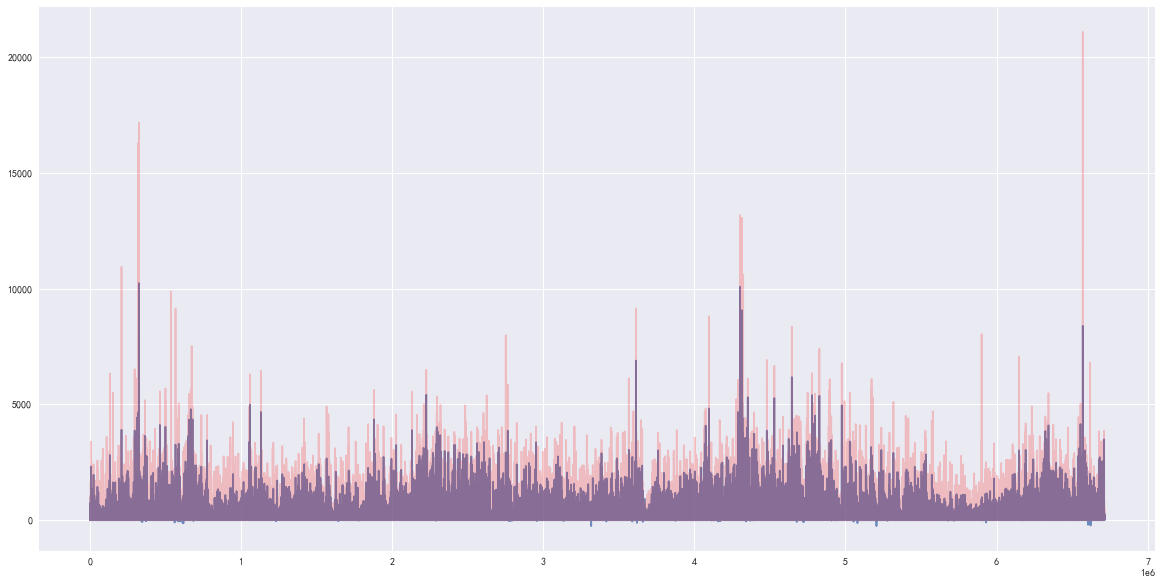

In [47]:
# y_hat = model.predict(X.values)
# fig, ax = plt.subplots(2, 1)
fig = plt.figure(figsize=(20,10))
plt.plot(test_data[0],alpha=0.8)
plt.plot(melt_data['target'].values,alpha=0.2,color='red')


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 计算均方误差
mse = mean_squared_error(melt_data['target'],test_data[0])

# 计算均方根误差
rmse = np.sqrt(mse)
rmse

53.08245657872871

销售区域编码        False
产品编码          False
产品大类编码        False
产品细类编码        False
price_0       False
              ...  
季节            False
该天有无促销节日      False
is_workday    False
is_holiday    False
target        False
Length: 61, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2618
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   销售区域编码        2619 non-null   int64  
 1   产品编码          2619 non-null   int64  
 2   产品大类编码        2619 non-null   int64  
 3   产品细类编码        2619 non-null   int64  
 4   price_0       2619 non-null   float16
 5   price_1       2619 non-null   float16
 6   price_2       2619 non-null   float16
 7   price_3       2619 non-null   float16
 8   price_4       2619 non-null   float16
 9   price_5       2619 non-null   float16
 10  price_6       2619 non-null   float16
 11  price_7       2619 non-null   float16
 12  price_8       2619 non-null   float16
 13 

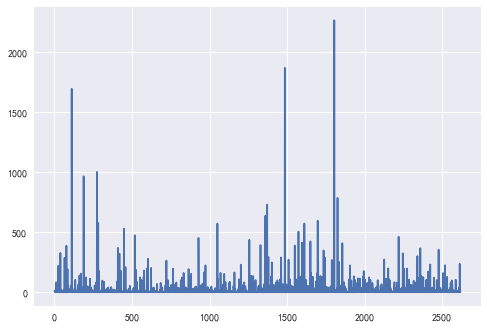

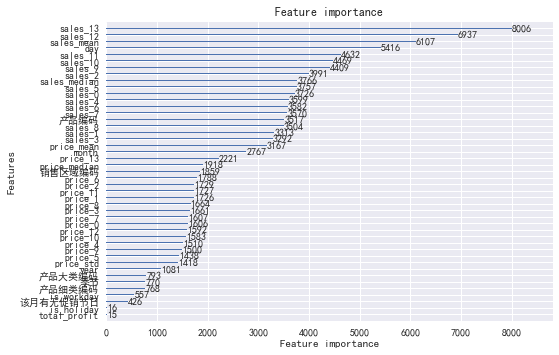

,销售区域编码,产品编码,产品大类编码,产品细类编码,订单需求量
0,101,20002,303,406,8.478075
1,101,20003,301,405,10.174445
2,101,20006,307,403,10.514625
3,101,20011,303,401,0.450862
4,101,20014,307,403,0.450862
...,...,...,...,...,...
2614,105,22066,307,403,236.790956
2615,105,22072,305,412,64.013105
2616,105,22075,307,403,0.450862
2617,105,22083,303,401,25.862475


In [49]:
melt_test_df['target'] = model.predict(melt_test_df.values,predict_disable_shape_check=True)
# melt_test_df.reset_index(inplace=True)
# melt_test_df['target'].plot()
result = pd.merge(
    final_test_df,
    melt_test_df,
    left_on=[
        '销售区域编码','产品编码','产品大类编码','产品细类编码'],
    right_on=[
        '销售区域编码','产品编码','产品大类编码','产品细类编码'],
    how='left')
print(result.isna().any())
print(result.info())
# result.fillna(0, inplace=True)
# result['ID'] = result.index
result.rename({'target': '订单需求量'}, inplace=True, axis=1)
result['订单需求量'].clip(0,inplace=True)
result['订单需求量'].plot()
# result[['ID', 'item_cnt_month']].to_csv('submission.csv', index=False)
lgb.plot_importance(model)
plt.show()
result[['销售区域编码','产品编码','产品大类编码','产品细类编码','订单需求量']]

In [50]:

end_result = pd.DataFrame([])
end_result = result.copy(deep=True)
end_result = end_result[['销售区域编码','产品编码','产品大类编码','产品细类编码']]
for i in range(1,4):
    if i == 1 or i==3:
        k=31
    else:
        k=28
    for j in range(1,k+1):
        id = sales_per_month.iloc[:, 0:feature_start_index]
        id.columns = ['销售区域编码','产品编码','产品大类编码','产品细类编码']  
        # cate_id = sales_per_month.iloc[:, -1]
        # cate_id.name = 'item_category_id'
        sales = sales_per_month.iloc[:, feature_start_index +
                                     one_catgory_feature_num -
                                     feature_loop_index:feature_start_index +
                                     one_catgory_feature_num]
        sales.columns = [f'sales_{i}' for i in range(feature_loop_index)]
        price = sales_per_month.iloc[:, feature_start_index +
                                     one_catgory_feature_num +
                                     one_catgory_feature_num -
                                     feature_loop_index:feature_start_index +
                                     one_catgory_feature_num +
                                     one_catgory_feature_num]
        
        salesnum=sales_per_month.iloc[:, feature_start_index +
                                     one_catgory_feature_num +
                                     one_catgory_feature_num +
                                     one_catgory_feature_num -
                                     feature_loop_index:feature_start_index +
                                     one_catgory_feature_num +
                                     one_catgory_feature_num +
                                     one_catgory_feature_num]
        # month_period=sales_per_month.iloc[:, feature_start_index +
        #                              one_catgory_feature_num +
        #                              one_catgory_feature_num +
        #                              one_catgory_feature_num +
        #                              one_catgory_feature_num -
        #                              feature_loop_index:feature_start_index +
        #                              one_catgory_feature_num +
        #                              one_catgory_feature_num +
        #                              one_catgory_feature_num +
        #                              one_catgory_feature_num]
        # print(salesnum)
        price.columns = [f'price_{i}' for i in range(feature_loop_index)]
        salesnum.columns = [f'salesnum_{i}' for i in range(feature_loop_index)]
        price['year'] = 2019
        price['month'] = i
        price['day'] = j
        
        # more features
        total_profit= porudct_sum(sales,price,name='total_profit')
        sales = create_statistic_feature(sales, prefix='sales')
        price = create_statistic_feature(price, prefix='price')
        
        melt_test_df = pd.concat([id, price, sales,total_profit,salesnum], axis=1)
        melt_test_df['季节'] = melt_test_df['month'].apply(lambda x: 
                                            1 if x in [3, 4, 5] 
                                            else (2 if x in [6, 7, 8] 
                                            else (3 if x in [9, 10, 11] 
                                            else 4)))
        melt_test_df['该天有无促销节日'] = melt_test_df['month'].apply(lambda x: 
                                            1 if x in [1,3,6,10,11,12] 
                                            else 0)
        # melt_test_df['线上线下占比'] = melt_test_df['销售区域编码'].apply(lambda x: 
        #                                     1 if x in [101,102,103] 
        #                                     else (2 if x in [104,105]
        #                                     else 0))
        
        #预测部分
        melt_test_df=pd.merge(melt_test_df,df_time,how='left')
        melt_test_df['target'] = model.predict(melt_test_df.values,predict_disable_shape_check=True)
        # melt_test_df.reset_index(inplace=True)
        # melt_test_df['target'].plot()
        result = pd.merge(
            final_test_df,
            melt_test_df,
            left_on=[
                '销售区域编码','产品编码','产品大类编码','产品细类编码'],
            right_on=[
                '销售区域编码','产品编码','产品大类编码','产品细类编码'],
            how='left')
#         print(result.isna().any())
#         print(result.info())
        # result.fillna(0, inplace=True)
        # result['ID'] = result.index
        result.rename({'target': '{}月订单需求量'.format(i)}, inplace=True, axis=1)
    #     result['订单需求量'].clip(0,inplace=True)
    #     result['订单需求量'].plot()
        # result[['ID', 'item_cnt_month']].to_csv('submission.csv', index=False)
    #     lgb.plot_importance(model)
    #     plt.show()
        end_result=pd.concat([end_result,result[['{}月订单需求量'.format(i)]]],axis=1)


In [51]:
end_result_end = end_result[['销售区域编码','产品编码','产品大类编码','产品细类编码']]

In [52]:
end_result_end['1月订单需求量']=round(end_result[['1月订单需求量']].sum(axis=1),0)
end_result_end['2月订单需求量']=round(end_result[['2月订单需求量']].sum(axis=1),0)
end_result_end['3月订单需求量']=round(end_result[['3月订单需求量']].sum(axis=1),0)

In [53]:
end_result_end.to_csv('./日粒度滑动预测结果.xlsx')